In [53]:
import numpy as np
import os 
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns

import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
#import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eitanb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eitanb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
path = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\DATA"
path_result = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\result"

In [55]:
df=pd.read_csv(path_result+"/"+"football_after_EDA.csv", index_col=0)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameID                 12680 non-null  int64  
 1   leagueID               12680 non-null  int64  
 2   season                 12680 non-null  int64  
 3   date                   12680 non-null  object 
 4   homeTeamID             12680 non-null  int64  
 5   awayTeamID             12680 non-null  int64  
 6   homeGoals              12680 non-null  int64  
 7   awayGoals              12680 non-null  int64  
 8   homeGoalsHalfTime      12680 non-null  int64  
 9   awayGoalsHalfTime      12680 non-null  int64  
 10  xGoals_h               12046 non-null  float64
 11  shots_h                12680 non-null  int64  
 12  shotsOnTarget_h        12680 non-null  int64  
 13  deep_h                 12046 non-null  float64
 14  ppda_h                 12680 non-null  float64
 15  fouls_h

In [57]:
def convert_categorical(df, threshold=10):
    """
    Convert columns with unique values less than threshold to 'category' dtype.
    """
    for col in df.columns:
        if df[col].nunique() < threshold:
            df[col] = df[col].astype('category')
    return df


In [58]:
# Get all numeric columns
df_num = df.select_dtypes(include=['number']).columns.dropna().unique()

# Drop specific ID columns (if they exist)
df_num = df_num.difference(['gameID', 'homeTeamID', 'awayTeamID'])

In [59]:
df.head()

gameID  leagueID  season            date  homeTeamID  awayTeamID  \
0      81         1    2015  8/8/2015 15:45          89          82   
1      82         1    2015  8/8/2015 18:00          73          71   
2      83         1    2015  8/8/2015 18:00          72          90   
3      84         1    2015  8/8/2015 18:00          75          77   
4      85         1    2015  8/8/2015 18:00          79          78   

   homeGoals  awayGoals  homeGoalsHalfTime  awayGoalsHalfTime  xGoals_h  \
0          1          0                  1                  0  0.627539   
1          0          1                  0                  0  0.876106   
2          2          2                  0                  1  0.604226   
3          4          2                  3                  0  2.568030   
4          1          3                  0                  1  1.130760   

   shots_h  shotsOnTarget_h  deep_h   ppda_h  fouls_h  corners_h  \
0        9                1     4.0  13.8261       12          1   
1       11                2    11.0   6.9000       13          6   
2       10                5     5.0   6.6500        7          8   
3       19                8     5.0  10.8800       13          6   
4       17                6     NaN   5.7368       14          1   

   yellowCards_h  redCards_h  teamgoals_h  ownGoals_h  total_assists_h  \
0            2.0           0            0           0                0   
1            3.0           0            0           0                0   
2            1.0           0            2           0                2   
3            2.0           0            4           0                2   
4            1.0           0            1           0                1   

   total_xAssists_h  total_key_passes_h  total_xGoalsChain_h  \
0          0.284979                   5             1.396328   
1          0.419975                   9             2.159510   
2          0.549139                   8             1.025550   
3          1.727543                  18             6.815649   
4          0.416638                  12             1.966623   

   total_xGoalsBuildup_h  total_blocked_shots_h  total_saved_shots_h  \
0               0.994160                    4.0                  1.0   
1               1.170894                    2.0                  2.0   
2               0.493522                    2.0                  3.0   
3               3.741916                    4.0                  4.0   
4               0.699249                    3.0                  4.0   

   xGoals_a  shots_a  shotsOnTarget_a  deep_a   ppda_a  fouls_a  corners_a  \
0  0.674600        9                4    10.0   8.2188       12          2   
1  0.782253        7                3     2.0  11.8462       13          3   
2       NaN       11                5     4.0  17.1579       13          2   
3  1.459460       11                5     6.0   9.5556       17          3   
4  2.109750       11                7    10.0  10.6250       20          4   

   yellowCards_a  redCards_a  teamgoals_a  ownGoals_a  total_assists_a  \
0              3           0            0           1                0   
1              4           0            1           0                1   
2              2           0            2           0                1   
3              4           0            2           0                2   
4              0           0            3           0                3   

   total_xAssists_a  total_key_passes_a  total_xGoalsChain_a  \
0          0.586365                   7             1.745371   
1          0.560695                   4             1.238205   
2          0.418385                   8             1.959323   
3          1.288886                   9             7.622863   
4          2.050685                  10            10.799517   

   total_xGoalsBuildup_a  total_blocked_shots_a  total_saved_shots_a result_h  \
0               0.811549                    3.0                  4.0     

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameID                 12680 non-null  int64  
 1   leagueID               12680 non-null  int64  
 2   season                 12680 non-null  int64  
 3   date                   12680 non-null  object 
 4   homeTeamID             12680 non-null  int64  
 5   awayTeamID             12680 non-null  int64  
 6   homeGoals              12680 non-null  int64  
 7   awayGoals              12680 non-null  int64  
 8   homeGoalsHalfTime      12680 non-null  int64  
 9   awayGoalsHalfTime      12680 non-null  int64  
 10  xGoals_h               12046 non-null  float64
 11  shots_h                12680 non-null  int64  
 12  shotsOnTarget_h        12680 non-null  int64  
 13  deep_h                 12046 non-null  float64
 14  ppda_h                 12680 non-null  float64
 15  fouls_h

In [61]:
df_numeric=df[df_num]

In [62]:
df_numeric.columns

Index(['awayGoals', 'awayGoalsHT_cat', 'awayGoalsHalfTime', 'awayGoals_cat',
       'corners_a', 'corners_h', 'deep_a', 'deep_h', 'fouls_a', 'fouls_h',
       'game_day', 'game_month', 'game_year', 'homeGoals', 'homeGoalsHT_cat',
       'homeGoalsHalfTime', 'homeGoals_cat', 'leagueID', 'ownGoals_a',
       'ownGoals_a_cat', 'ownGoals_h', 'ownGoals_h_cat', 'ppda_a', 'ppda_h',
       'redCards_a', 'redCards_a_cat', 'redCards_h', 'redCards_h_cat',
       'result', 'season', 'shotsOnTarget_a', 'shotsOnTarget_h', 'shots_a',
       'shots_h', 'teamgoals_a', 'teamgoals_h', 'total_assists_a',
       'total_assists_a_cat', 'total_assists_h', 'total_assists_h_cat',
       'total_blocked_shots_a', 'total_blocked_shots_h', 'total_key_passes_a',
       'total_key_passes_h', 'total_saved_shots_a', 'total_saved_shots_h',
       'total_xAssists_a', 'total_xAssists_h', 'total_xGoalsBuildup_a',
       'total_xGoalsBuildup_h', 'total_xGoalsChain_a', 'total_xGoalsChain_h',
       'xGoals_a', 'xGoals_h', '

In [63]:
# check outliers for normal distribution
# check outliers for non-normal
# check to drop outliers
# coulmns that arent been droped 

# outliers

### numeric outliers

#### The data is skewed and not normaly distributed, we'll use the IQR method to identify outliers to set up a boundary before Q1 and after Q3. Any values that fall outside of this boundary are considered outliers:

In [64]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        if col != 'result_h':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers=outliers_boxplot(df_numeric)
outliers

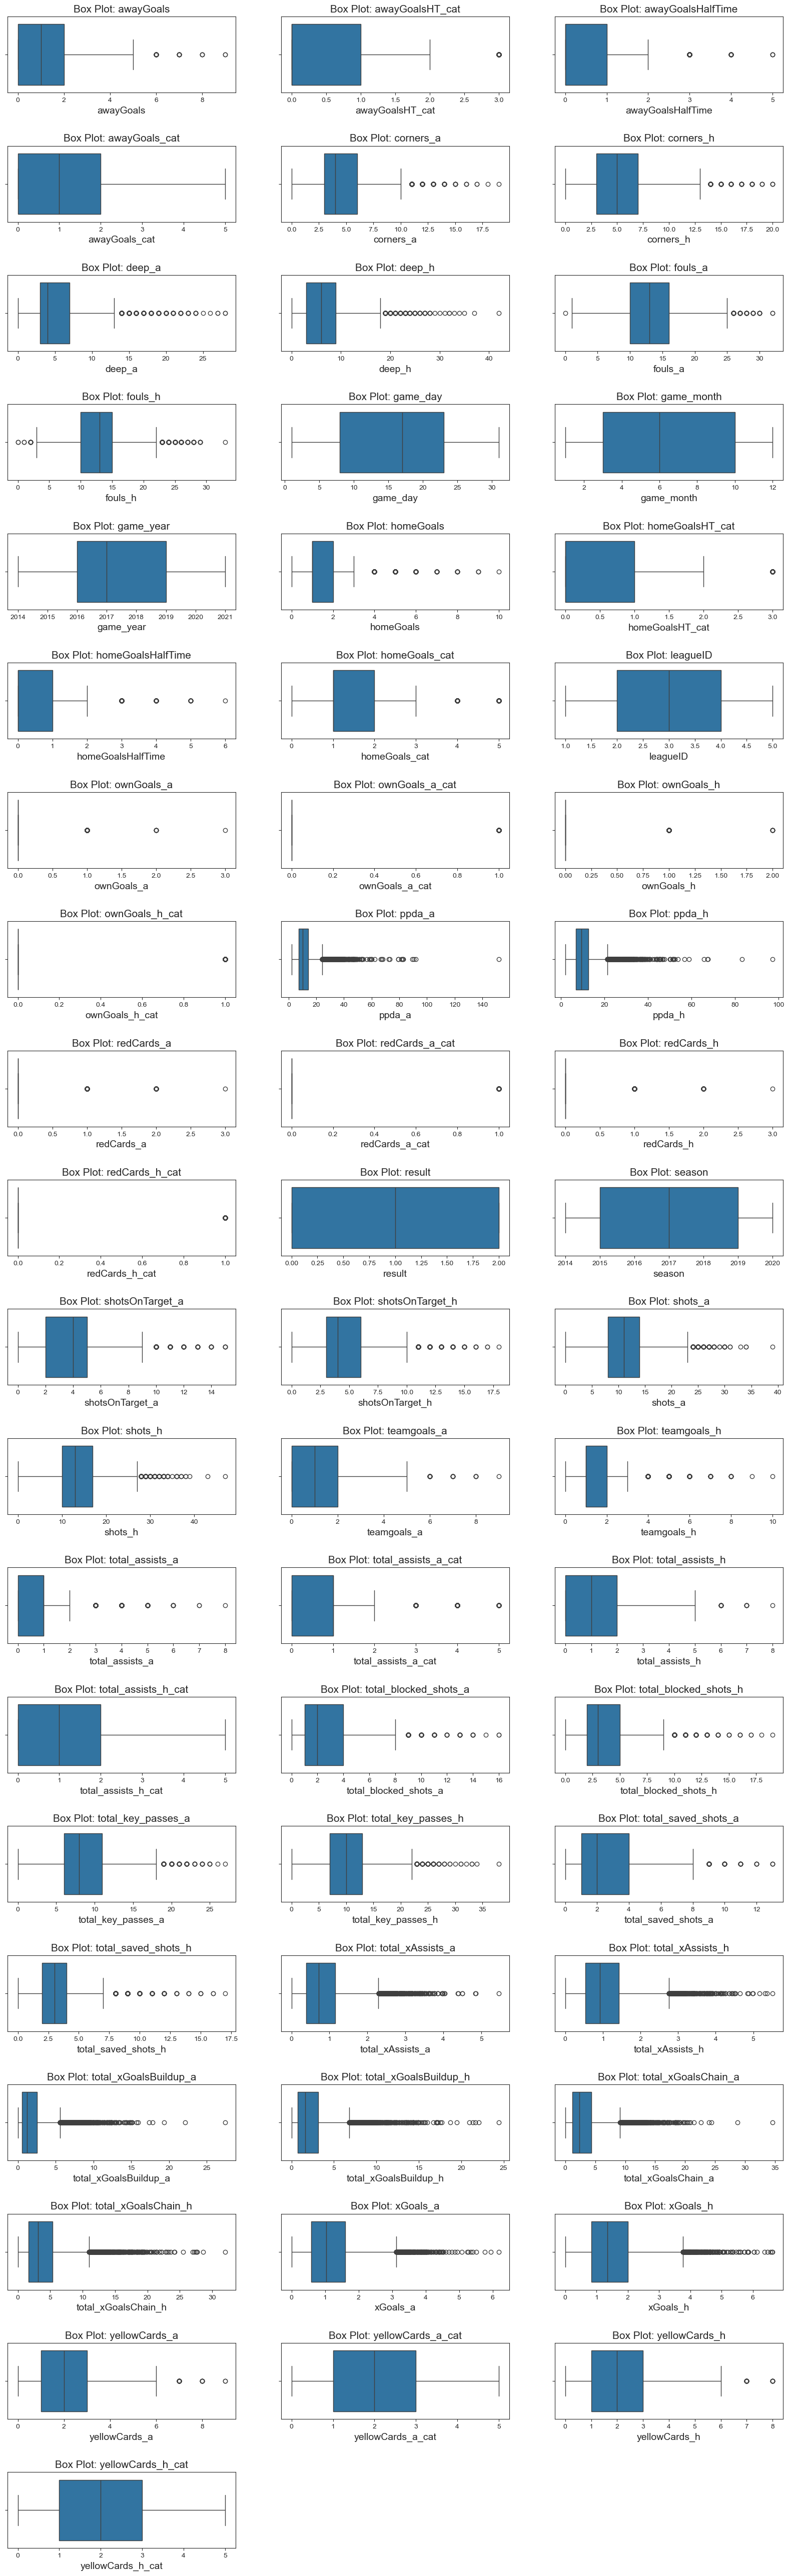

In [65]:
outliers
plt.show()

In [66]:
import pandas as pd
import numpy as np

def outliers_df(df):
    """
    Detects outliers in a numerical dataset using the IQR method.
    
    Returns:
    - A DataFrame with the count and percentage of outliers for each feature.
    """
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df:
        if col != 'result_h':  # Exclude categorical target column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR  # Corrected formula

            # Detect outliers
            outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
            num_outliers = len(outliers)

            # Store results
            total_outliers.loc[col] = [num_outliers, (num_outliers / len(df)) * 100]

    return total_outliers[total_outliers['Percent'] > 0].sort_values('Percent', ascending=False)



# Run the function
outliers_df = outliers_df(df_numeric)





In [67]:
outliers_df

Outlier count    Percent
redCards_a_cat                1396.0  11.009464
redCards_a                    1396.0  11.009464
redCards_h                    1078.0   8.501577
redCards_h_cat                1078.0   8.501577
homeGoals                      981.0   7.736593
homeGoals_cat                  981.0   7.736593
teamgoals_h                    917.0   7.231861
total_assists_a_cat            790.0   6.230284
total_assists_a                790.0   6.230284
total_xGoalsBuildup_a          718.0   5.662461
total_xGoalsBuildup_h          664.0   5.236593
ppda_a                         606.0   4.779180
ownGoals_a                     563.0   4.440063
ownGoals_a_cat                 563.0   4.440063
ppda_h                         540.0   4.258675
total_xGoalsChain_a            538.0   4.242902
total_saved_shots_h            532.0   4.195584
total_xGoalsChain_h            523.0   4.124606
ownGoals_h_cat                 435.0   3.430599
ownGoals_h                     435.0   3.430599
deep_a                         404.0   3.186120
homeGoalsHT_cat                403.0   3.178233
homeGoalsHalfTime              403.0   3.178233
total_xAssists_a               389.0   3.067823
shotsOnTarget_h                351.0   2.768139
total_xAssists_h               346.0   2.728707
xGoals_a                       287.0   2.263407
corners_a                      283.0   2.231861
xGoals_h                       261.0   2.058360
fouls_h                        241.0   1.900631
shotsOnTarget_a                233.0   1.837539
total_blocked_shots_h          230.0   1.813880
awayGoalsHT_cat                225.0   1.774448
awayGoalsHalfTime              225.0   1.774448
deep_h                         220.0   1.735016
total_blocked_shots_a          187.0   1.474763
total_key_passes_a             169.0   1.332808
shots_h                        167.0   1.317035
shots_a                        161.0   1.269716
corners_h                      143.0   1.127760
total_key_passes_h             123.0   0.970032
total_saved_shots_a             95.0   0.749211
fouls_a                         81.0   0.638801
awayGoals                       44.0   0.347003
yellowCards_a                   43.0   0.339117
teamgoals_a                     38.0   0.299685
yellowCards_h                   37.0   0.291798
total_assists_h                 20.0   0.157729

In [68]:
outliers_df.to_csv(path_result+'/'+'outliers_df.csv')

### new_outliers_df

#### Labeling every outlier with 'Outlier' in order to seperate the outliers from nulls (temporarily, and then to 0/1):

In [69]:
import numpy as np  # Import numpy for numerical operations

def outliers(df,outliers_df):  
    """
    Identifies outliers in a DataFrame and labels them as 'Outlier'.
    Outliers are determined using the interquartile range (IQR) method.
    """
    
    label_out_df = df.copy()  # Create a copy of the input DataFrame to avoid modifying the original data
    
    for col in label_out_df:  # Iterate over each column in the DataFrame
        if col in outliers_df.index:  # Check if the column is listed in 'outliers_df' (this variable needs to be defined elsewhere)
            
            Q1 = label_out_df[col].quantile(0.25)  # Calculate the first quartile (25th percentile)
            Q3 = label_out_df[col].quantile(0.75)  # Calculate the third quartile (75th percentile)
            
            # Compute the upper and lower limits for detecting outliers
            upper_limit = Q1 + 1.5 * (Q3 - Q1)  # Upper limit for detecting outliers
            lower_limit = Q3 - 1.5 * (Q3 - Q1)  # Lower limit for detecting outliers (should be Q1 - 1.5*(Q3-Q1), seems to be a mistake)
            
            # Replace values greater than the upper limit or less than the lower limit with the label 'Outlier'
            label_out_df[col] = np.where(label_out_df[col] > upper_limit, 'Outlier', 
                                         np.where(label_out_df[col] < lower_limit, 'Outlier', label_out_df[col]))
    
    return label_out_df  # Return the modified DataFrame with outliers labeled

# Apply the function to the DataFrame and display the first 10 rows
new_df_outliers = outliers(df,outliers_df)
new_df_outliers.head(10)

gameID  leagueID  season             date  homeTeamID  awayTeamID  \
0      81         1    2015   8/8/2015 15:45          89          82   
1      82         1    2015   8/8/2015 18:00          73          71   
2      83         1    2015   8/8/2015 18:00          72          90   
3      84         1    2015   8/8/2015 18:00          75          77   
4      85         1    2015   8/8/2015 18:00          79          78   
5      86         1    2015   8/8/2015 20:30          80          84   
6      87         1    2015   8/9/2015 16:30          86          74   
7      88         1    2015   8/9/2015 16:30          83          81   
8      89         1    2015   8/9/2015 19:00          85          87   
9      90         1    2015  8/10/2015 23:00          76          88   

  homeGoals awayGoals homeGoalsHalfTime awayGoalsHalfTime  xGoals_h  shots_h  \
0         1         0                 1                 0  0.627539        9   
1   Outlier         1                 0                 0  0.876106       11   
2         2         2                 0                 1  0.604226       10   
3   Outlier         2           Outlier                 0   2.56803       19   
4         1         3                 0                 1   1.13076       17   
5         2         2           Outlier                 1   0.64396       11   
6         2         2                 1                 1   1.54613        9   
7   Outlier         2                 0                 1   1.33166  Outlier   
8   Outlier         1                 0                 0       nan        7   
9   Outlier         3                 0           Outlier  0.435238        9   

  shotsOnTarget_h deep_h   ppda_h  fouls_h corners_h yellowCards_h redCards_h  \
0         Outlier    4.0  13.8261       12         1           2.0          0   
1               2   11.0      6.9       13         6           3.0          0   
2               5    5.0     6.65  Outlier         8           1.0          0   
3         Outlier    5.0    10.88       13         6           2.0          0   
4               6    nan   5.7368       14         1           1.0          0   
5               3   10.0  10.3636       15         4           1.0    Outlier   
6               4    3.0  12.7222        9         6           2.0          0   
7               6   11.0   8.1667       12         5           1.0          0   
8         Outlier    2.0   11.913        9         3           2.0          0   
9               2    4.0  Outlier       12         6           4.0          0   

  teamgoals_h ownGoals_h total_assists_h total_xAssists_h total_key_passes_h  \
0     Outlier          0               0      0.284978755                  5   
1     Outlier          0               0      0.419974941                  9   
2           2          0               2      0.549139082                  8   
3     Outlier          0               2      1.727543138            Outlier   
4           1          0               1      0.416637903                 12   
5           1          0               0       0.42361562                  8   
6           2          0               1      0.570525074                  8   
7     Outlier          0               0      1.112352483            Outlier   
8     Outlier          0               0      0.136028878                  4   
9     Outlier          0               0      0.334356616                  6   

  total_xGoalsChain_h total_xGoalsBuildup_h total_blocked_shots_h  \
0         1.396327948           0.994159963                   4.0   
1         2.159510154           1.170894107                   2.0   
2         1.025550174           0.493522111                   2.0   
3          6.81564863           3.741915636                   4.0   
4         1.966623448           0.699248928                   3.0   
5         1.719828486           0.961012319                   3.0   
6         1.078108296           0.439387508                   3.0   
7   

### df_outliers

#### Creating a dataframe with outliers as 1 and non-outliers as 0:

In [70]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

gameID  leagueID  season  date  homeTeamID  awayTeamID  homeGoals  \
0           0         0       0     0           0           0          0   
1           0         0       0     0           0           0          1   
2           0         0       0     0           0           0          0   
3           0         0       0     0           0           0          1   
4           0         0       0     0           0           0          0   
...       ...       ...     ...   ...         ...         ...        ...   
12675       0         0       0     0           0           0          0   
12676       0         0       0     0           0           0          0   
12677       0         0       0     0           0           0          0   
12678       0         0       0     0           0           0          1   
12679       0         0       0     0           0           0          0   

       awayGoals  homeGoalsHalfTime  awayGoalsHalfTime  xGoals_h  shots_h  \
0              0                  0                  0         0        0   
1              0                  0                  0         0        0   
2              0                  0                  0         0        0   
3              0                  1                  0         0        0   
4              0                  0                  0         0        0   
...          ...                ...                ...       ...      ...   
12675          0                  0                  0         0        0   
12676          0                  0                  0         0        0   
12677          0                  0                  0         0        0   
12678          0                  0                  0         0        0   
12679          0                  0                  0         0        1   

       shotsOnTarget_h  deep_h  ppda_h  fouls_h  corners_h  yellowCards_h  \
0                    1       0       0        0          0              0   
1                    0       0       0        0          0              0   
2                    0       0       0        1          0              0   
3                    1       0       0        0          0              0   
4                    0       0       0        0          0              0   
...                ...     ...     ...      ...        ...            ...   
12675                0       1       0        0          0              0   
12676                0       0       1        0          0              0   
12677                0       0       0        0          0              0   
12678                0       0       0        0          0              0   
12679                0       0       0        0          0              0   

       redCards_h  teamgoals_h  ownGoals_h  total_assists_h  total_xAssists_h  \
0               0            1           0                0                 0   
1               0            1           0                0                 0   
2               0            0           0                0                 0   
3               0            1           0                0                 0   
4               0            0           0                0                 0   
...           ...          ...         ...              ...               ...   
12675           0            0           0                0                 0   
12676           0            0           0                0                 0   
12677           0            0           0                0                 0   
12678           0            1           0                0                 0   
12679           0            0           0                0                 1   

       total_key_passes_h  total_xGoalsChain_h  total_xGoalsBuildup_h  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0      

### Now that we have a dataframe saving all the outliers we'll convert all the outliers to nulls, just so I can see differences in distribution with and without outliers and then decide which of the outliers to remove or not:

In [71]:
def capping(df,outliers_df):
    temp = df.copy()
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(df,outliers_df)
temp

gameID  leagueID  season             date  homeTeamID  awayTeamID  \
0          81         1    2015   8/8/2015 15:45          89          82   
1          82         1    2015   8/8/2015 18:00          73          71   
2          83         1    2015   8/8/2015 18:00          72          90   
3          84         1    2015   8/8/2015 18:00          75          77   
4          85         1    2015   8/8/2015 18:00          79          78   
...       ...       ...     ...              ...         ...         ...   
12675   16131         5    2020  5/23/2021 19:00         168         166   
12676   16132         5    2020  5/23/2021 19:00         177         176   
12677   16133         5    2020  5/23/2021 19:00         163         235   
12678   16134         5    2020  5/23/2021 19:00         175         181   
12679   16135         5    2020  5/23/2021 19:00         225         179   

       homeGoals  awayGoals  homeGoalsHalfTime  awayGoalsHalfTime  xGoals_h  \
0            1.0        0.0                1.0                0.0  0.627539   
1            NaN        1.0                0.0                0.0  0.876106   
2            2.0        2.0                0.0                1.0  0.604226   
3            NaN        2.0                NaN                0.0  2.568030   
4            1.0        3.0                0.0                1.0  1.130760   
...          ...        ...                ...                ...       ...   
12675        1.0        2.0                1.0                1.0  1.411190   
12676        1.0        2.0                1.0                1.0  1.198190   
12677        2.0        0.0                1.0                0.0  1.332690   
12678        NaN        1.0                0.0                1.0  1.460500   
12679        1.0        1.0                1.0                0.0  0.323960   

       shots_h  shotsOnTarget_h  deep_h   ppda_h  fouls_h  corners_h  \
0          9.0              NaN     4.0  13.8261     12.0        1.0   
1         11.0              2.0    11.0   6.9000     13.0        6.0   
2         10.0              5.0     5.0   6.6500      NaN        8.0   
3         19.0              NaN     5.0  10.8800     13.0        6.0   
4         17.0              6.0     NaN   5.7368     14.0        1.0   
...        ...              ...     ...      ...      ...        ...   
12675     15.0              5.0     NaN  12.3684      8.0        9.0   
12676     10.0              3.0     3.0      NaN     11.0        5.0   
12677     12.0              6.0    10.0   8.2857     11.0        4.0   
12678     19.0              5.0     NaN   7.5600     13.0        9.0   
12679      NaN              2.0     1.0  15.1000     17.0        2.0   

       yellowCards_h  redCards_h  teamgoals_h  ownGoals_h  total_assists_h  \
0                2.0         0.0          NaN         0.0              0.0   
1                3.0         0.0          NaN         0.0              0.0   
2                1.0         0.0          2.0         0.0              2.0   
3                2.0         0.0          NaN         0.0              2.0   
4                1.0         0.0          1.0         0.0              1.0   
...              ...         ...          ...         ...              ...   
12675            2.0         0.0          1.0         0.0              1.0   
12676            1.0         0.0          1.0         0.0              1.0   
12677            1.0         0.0          2.0         0.0              1.0   
12678            1.0         0.0          NaN         0.0              0.0   
12679            1.0         0.0          1.0         0.0              0.0   

       total_xAssists_h  total_key_passes_h  total_xGoalsChain_h  \
0              0.284979                 5.0             1.396328   
1              0.419975                 9.0             2.159510   
2              0.549139                 8.0             1.025550   
3              1.727543                 NaN             6.815649   
4  

#### Saving the inter quartal outliers dataframe for future reference.

In [72]:
temp.to_csv(path_result+'/'+'outliers_q_df.csv')


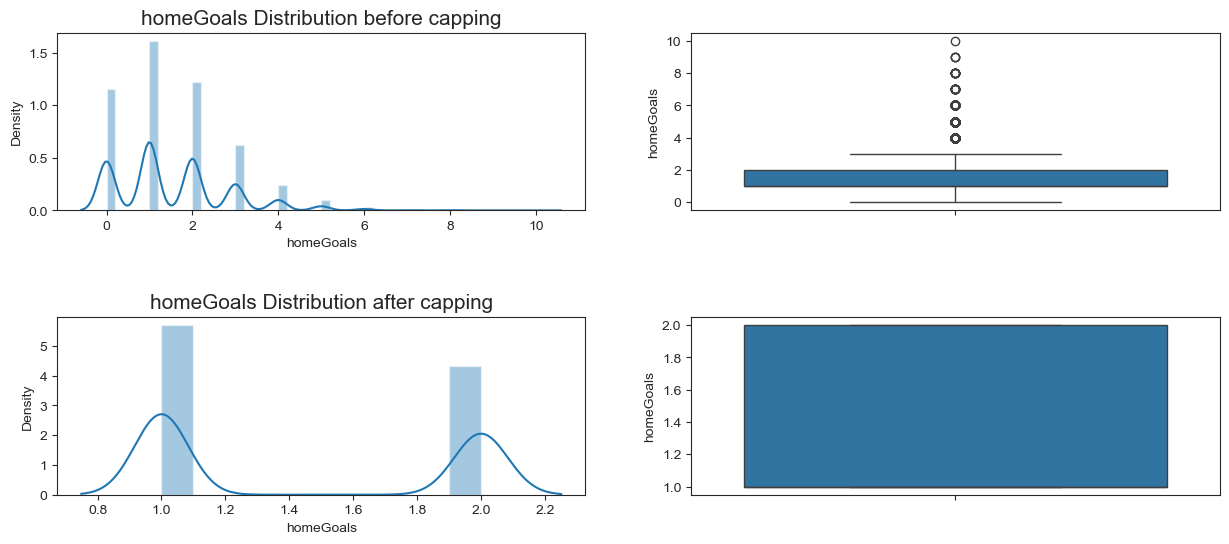

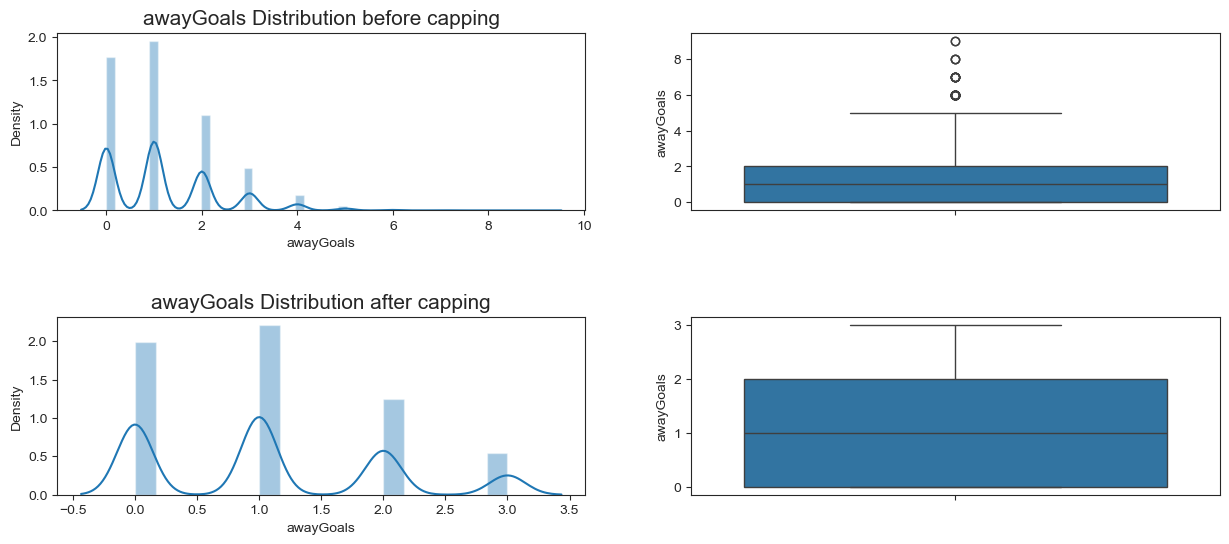

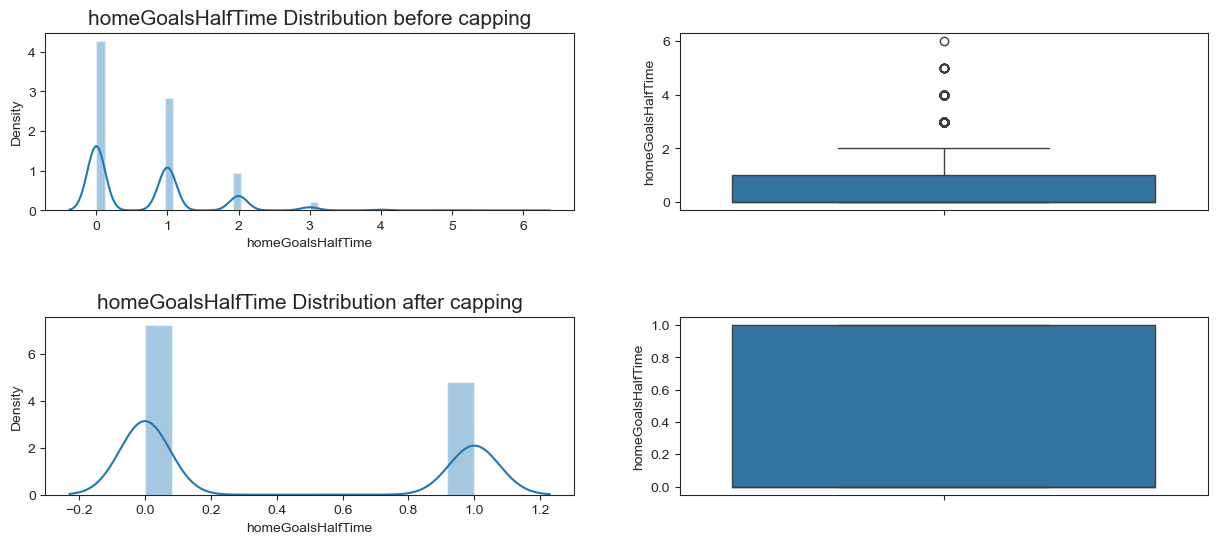

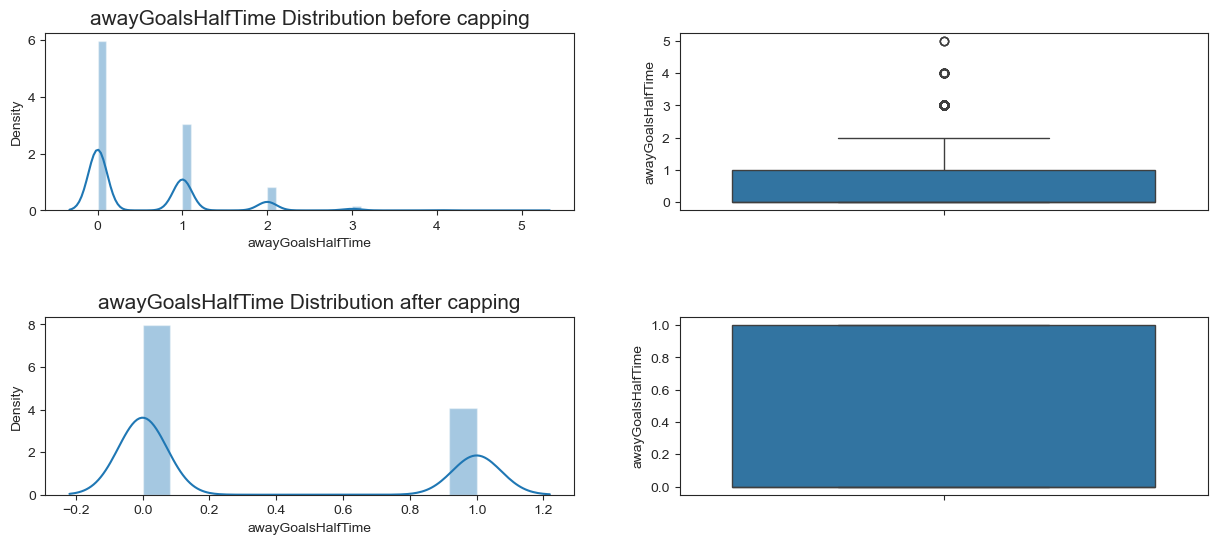

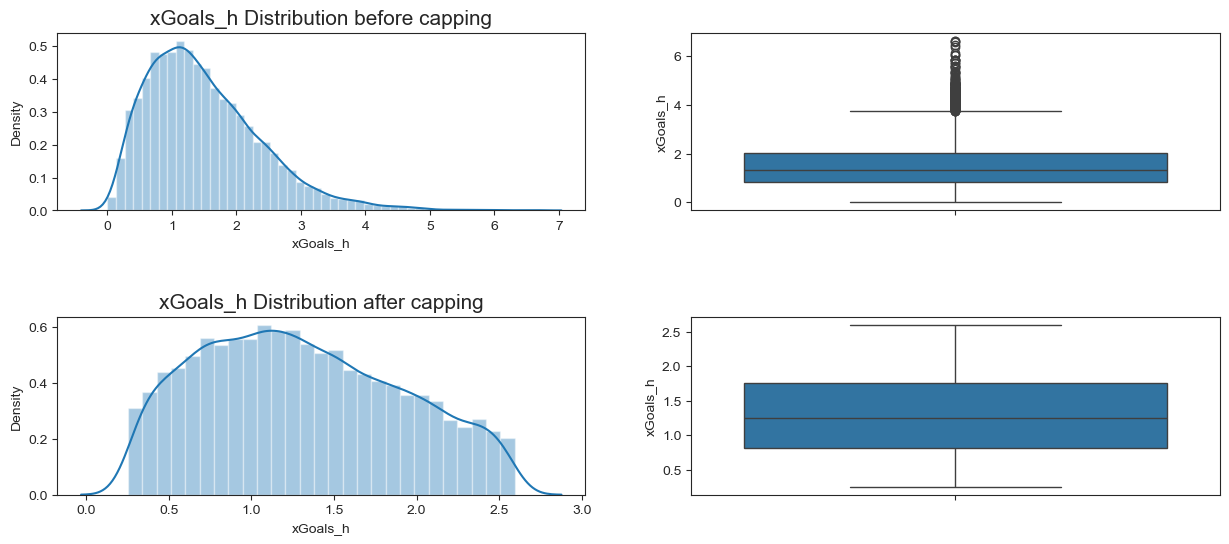

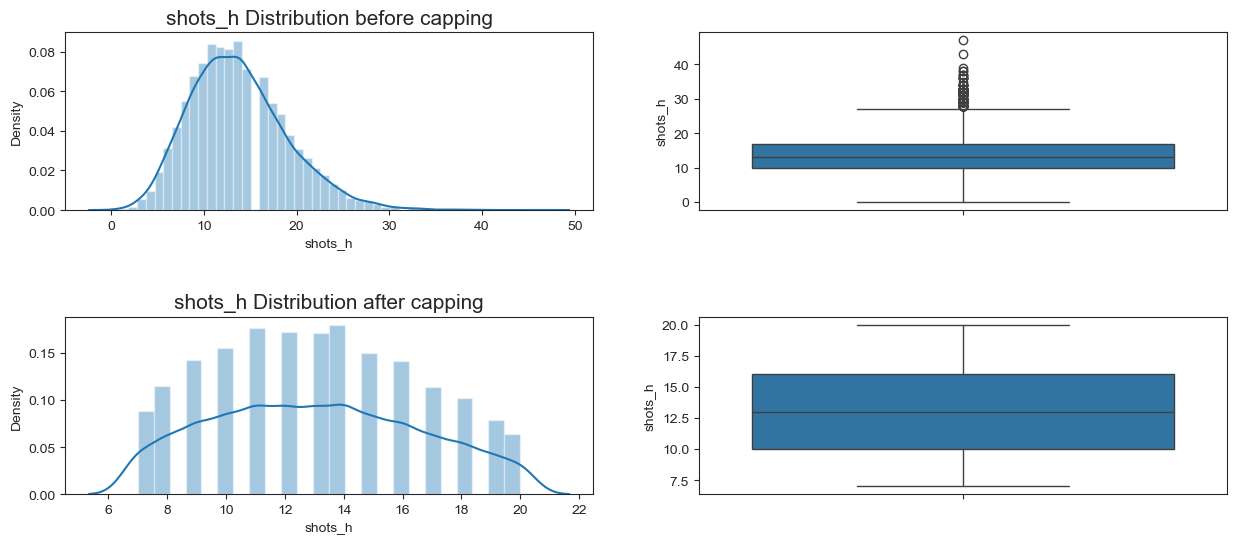

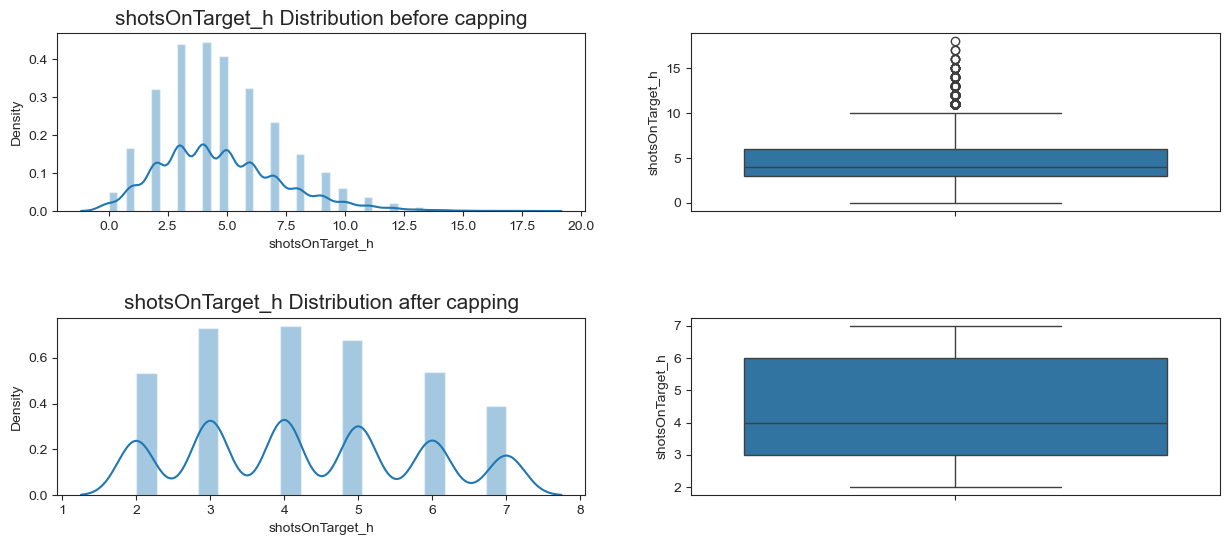

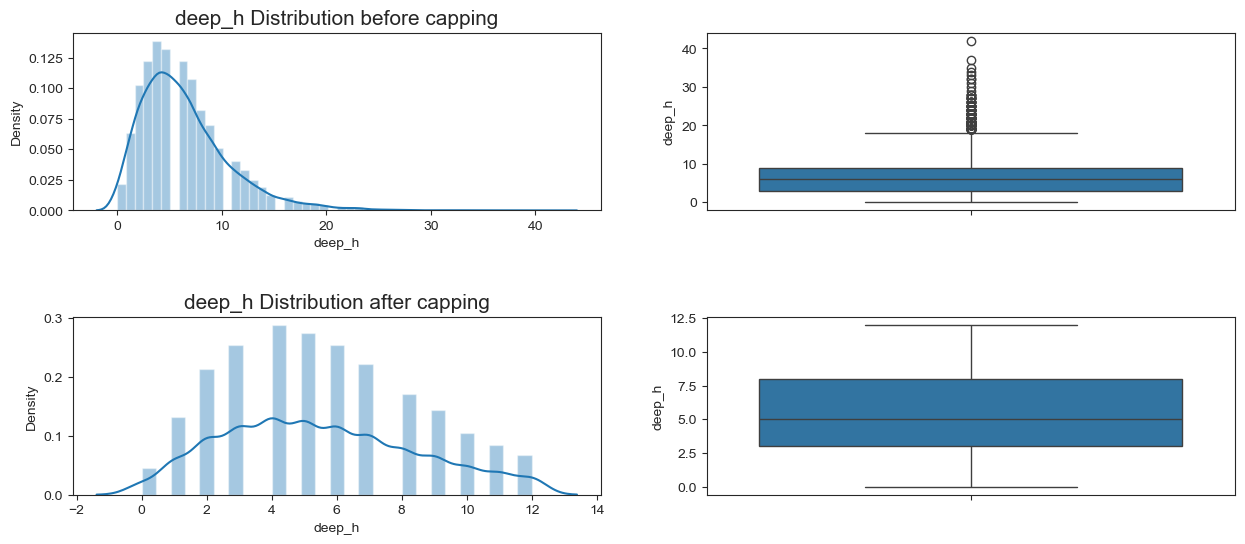

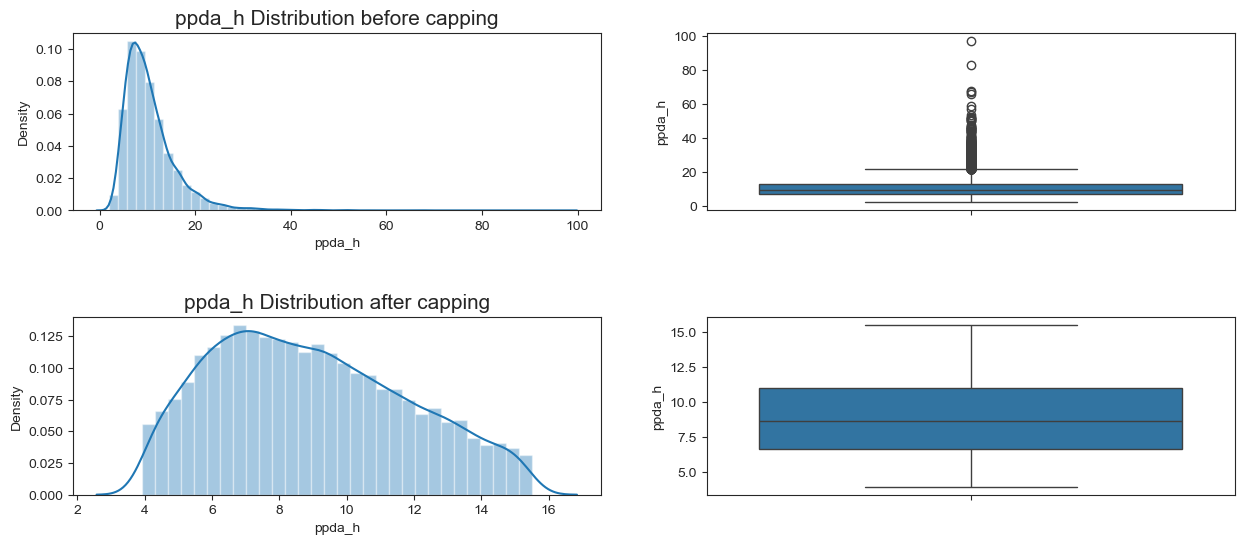

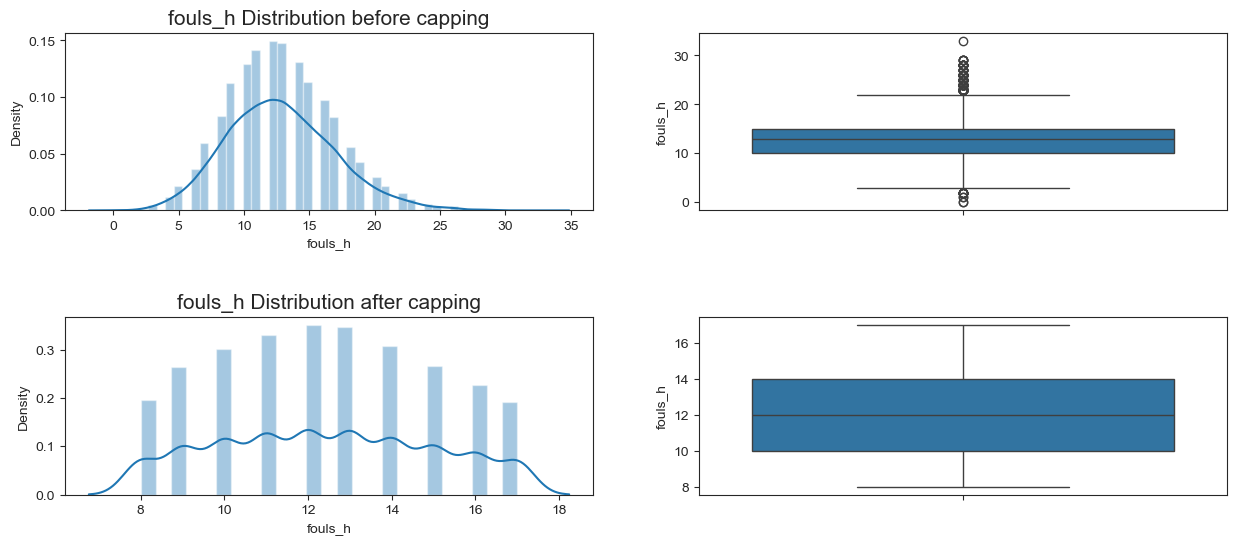

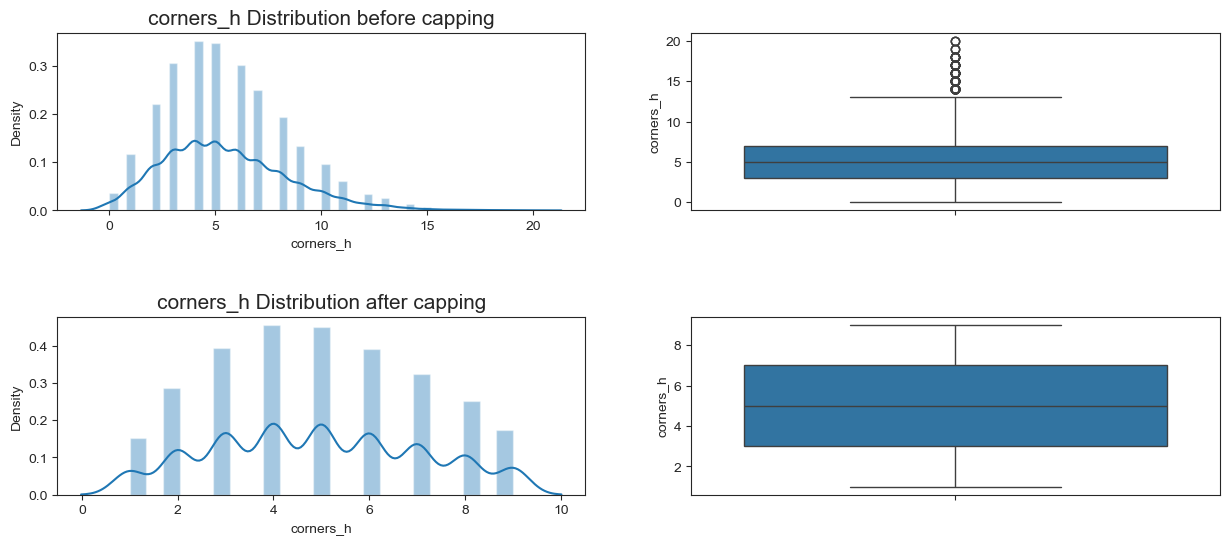

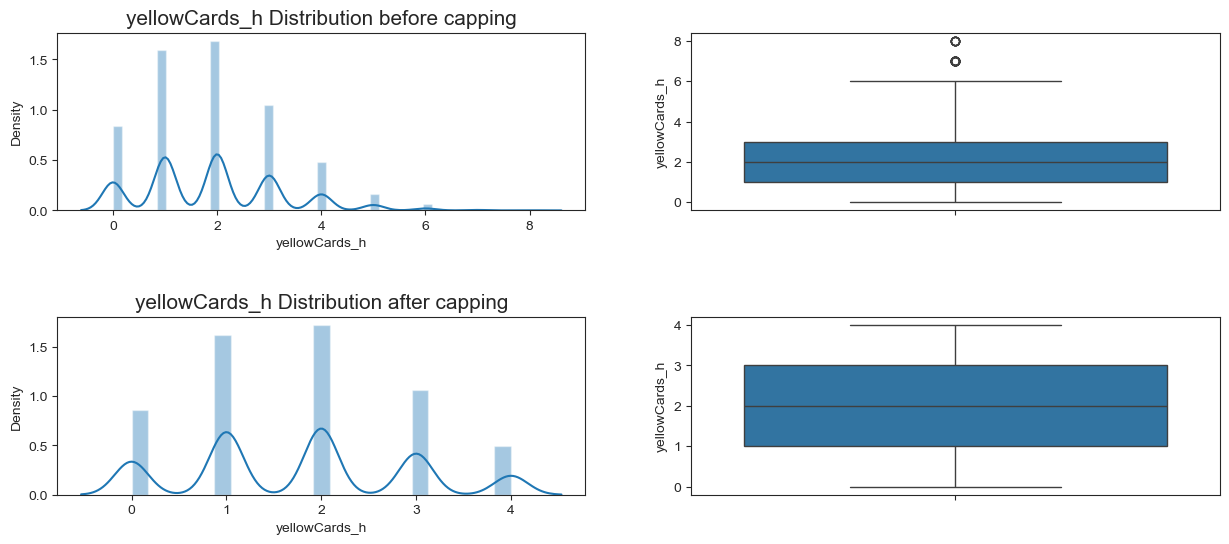

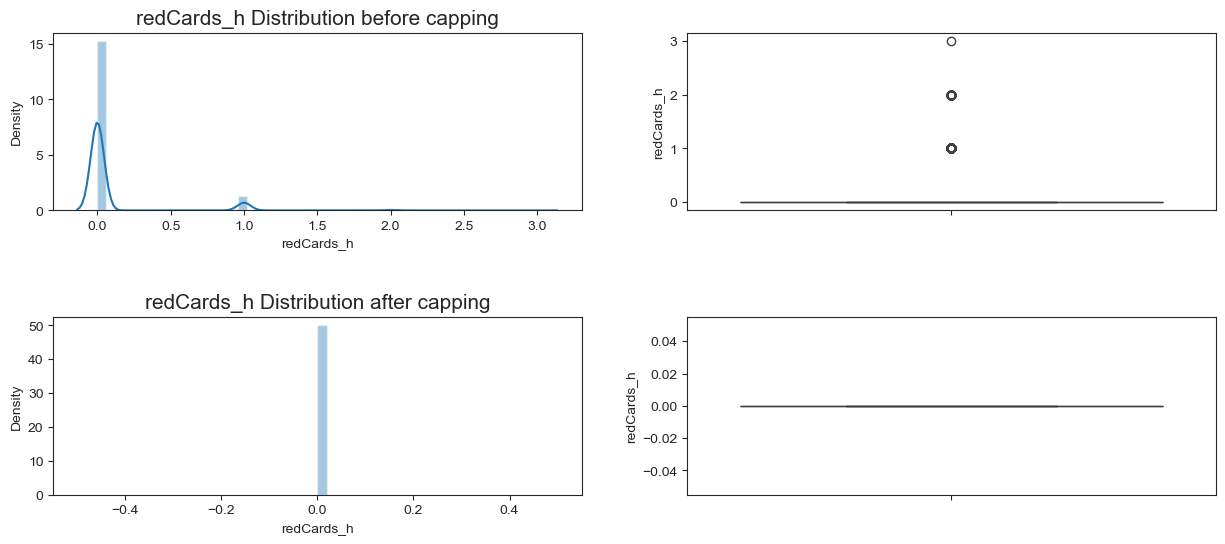

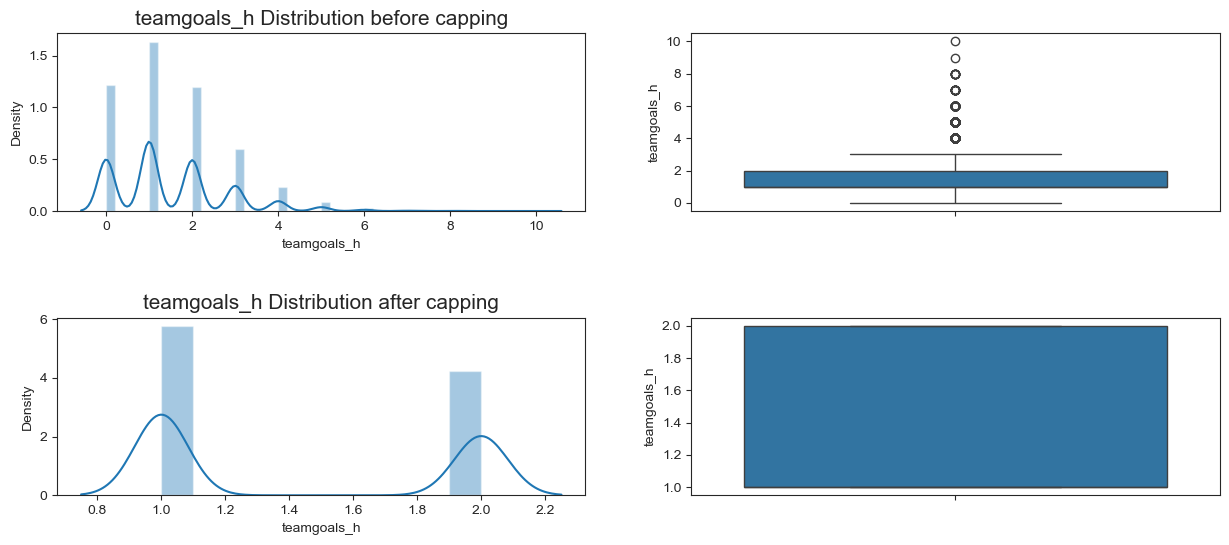

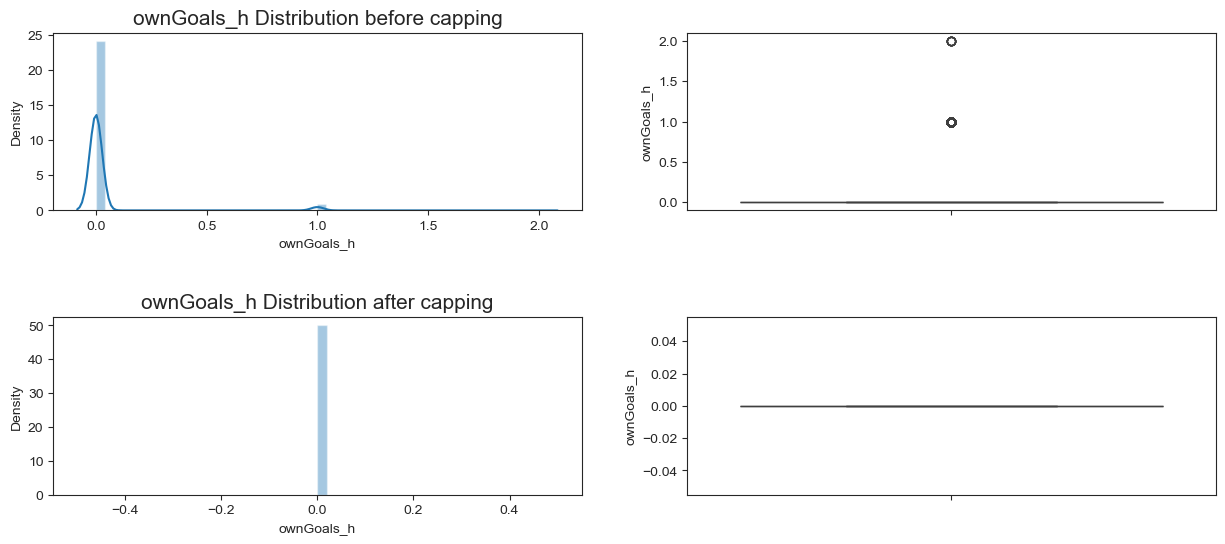

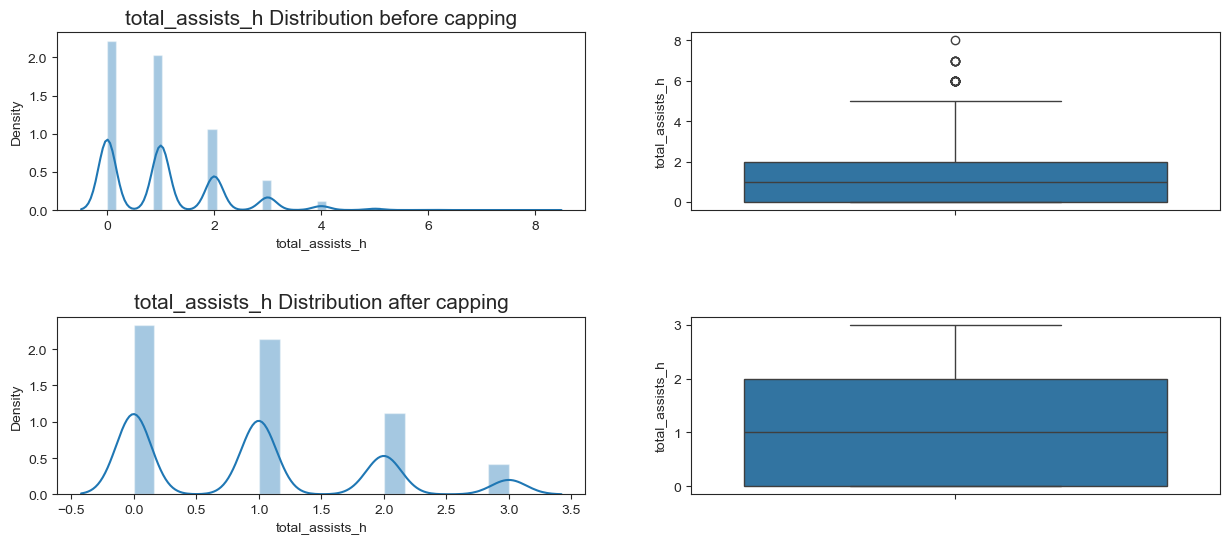

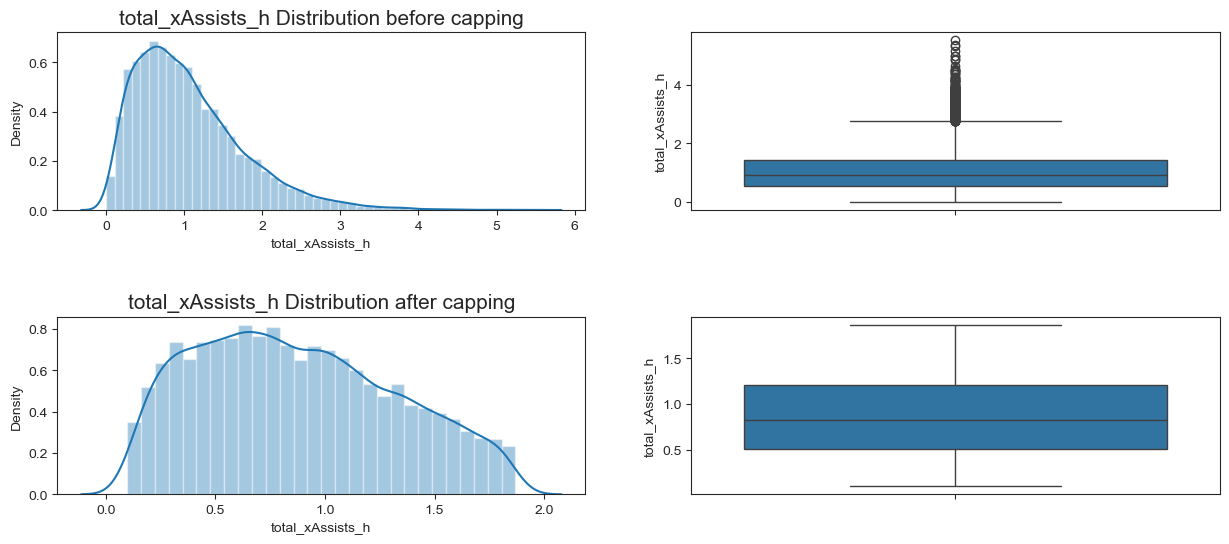

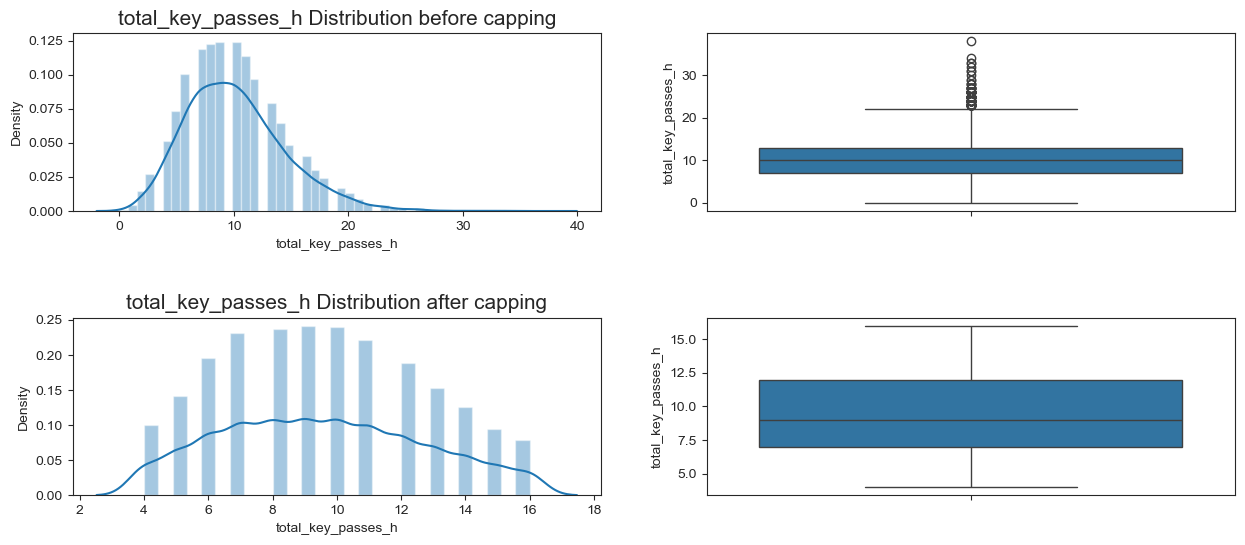

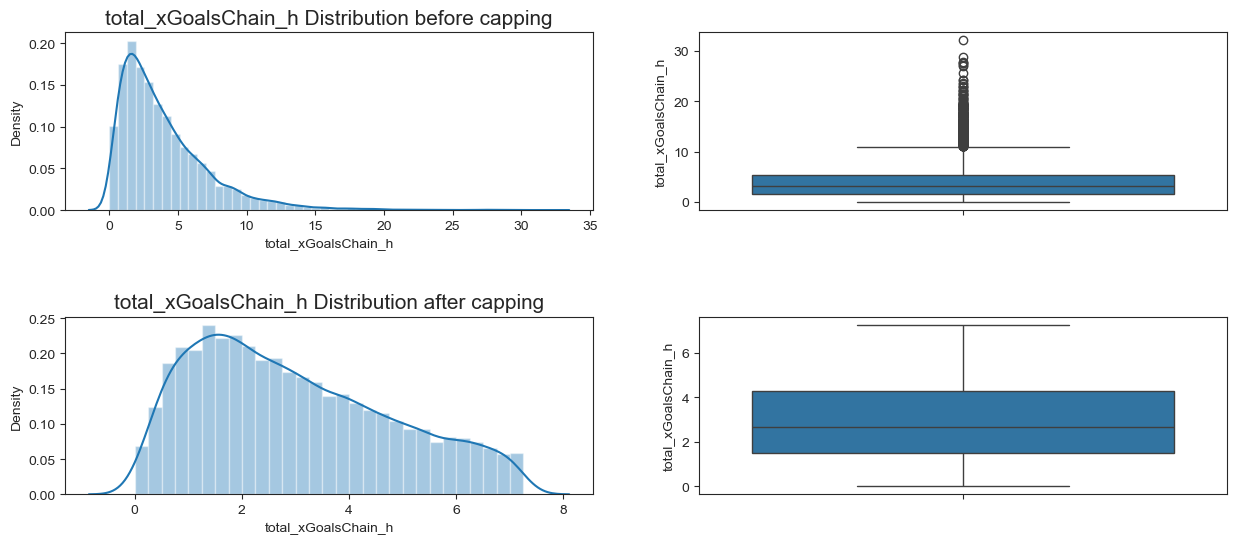

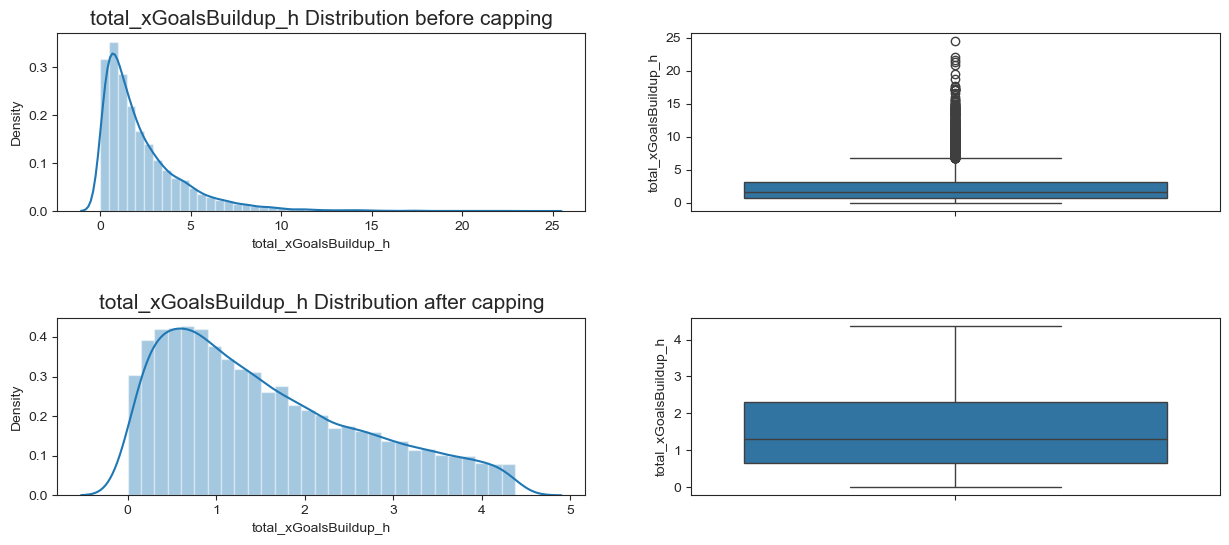

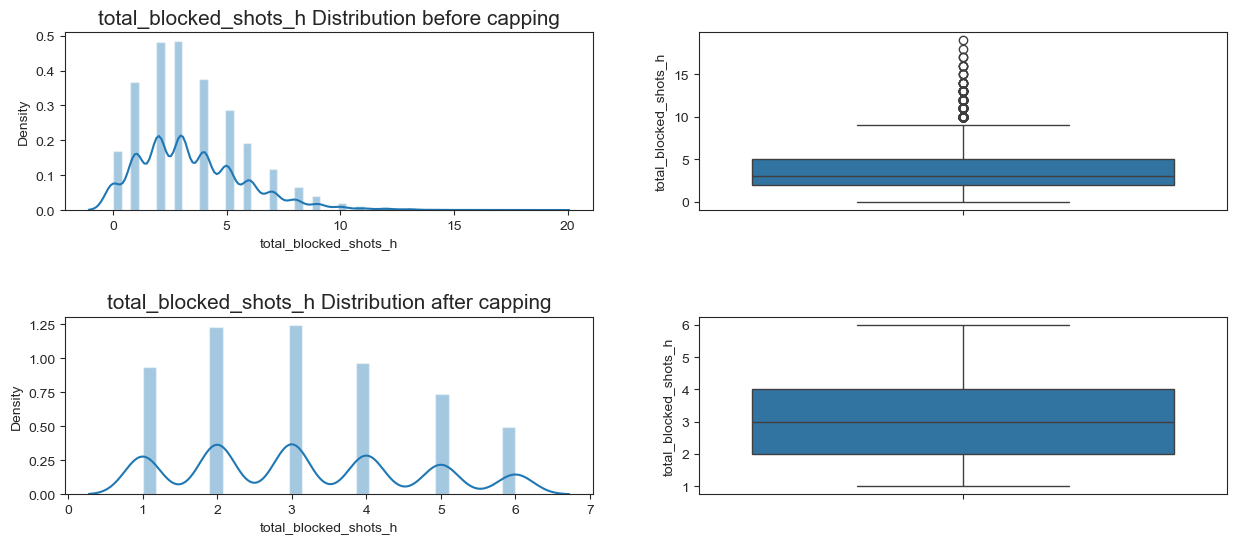

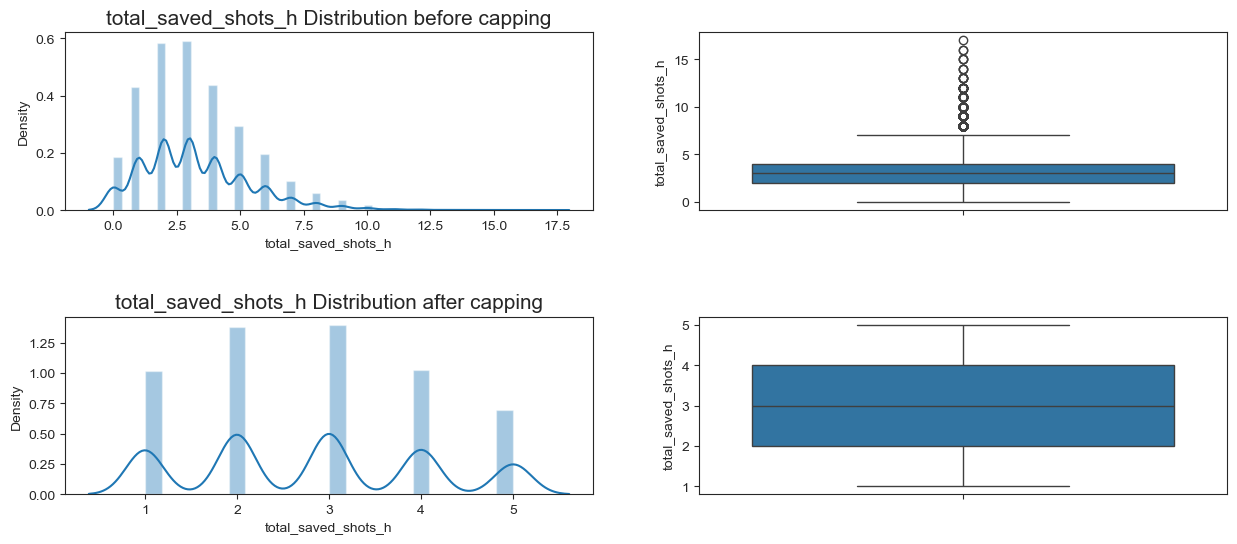

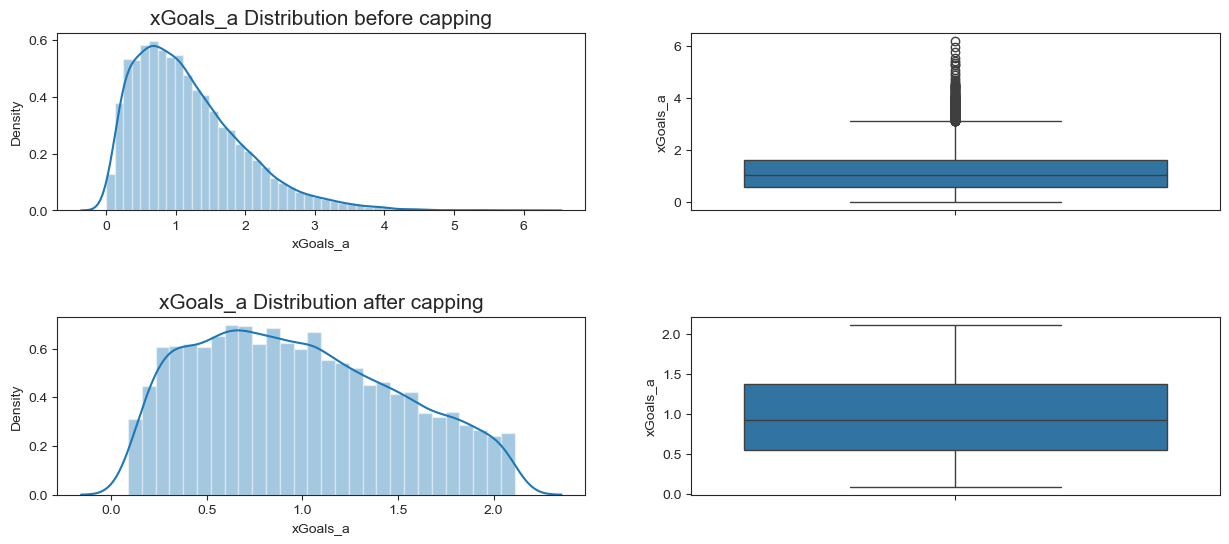

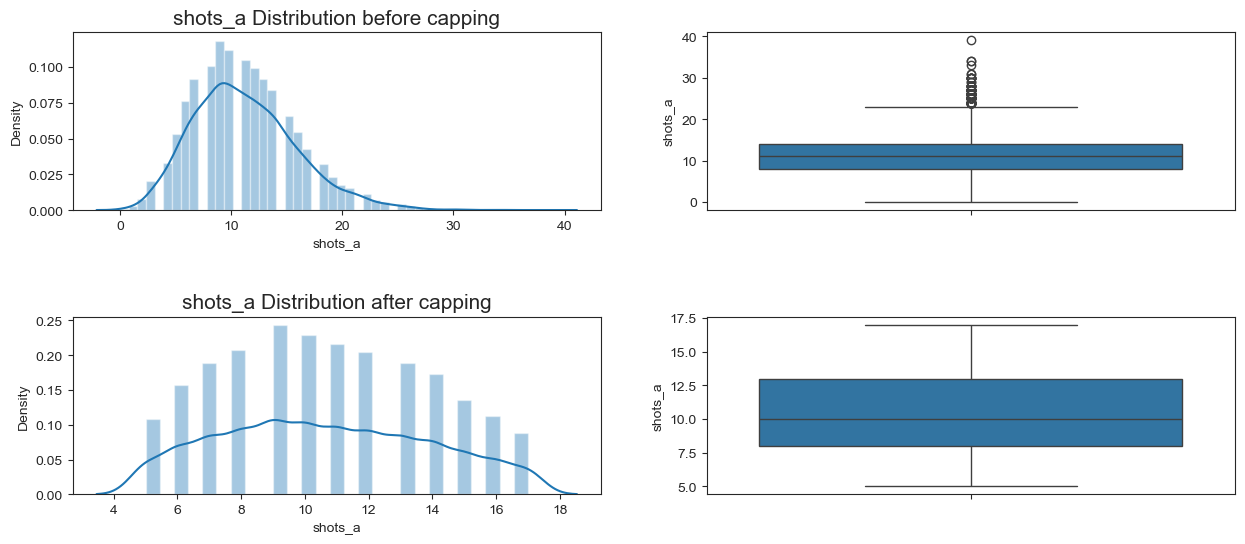

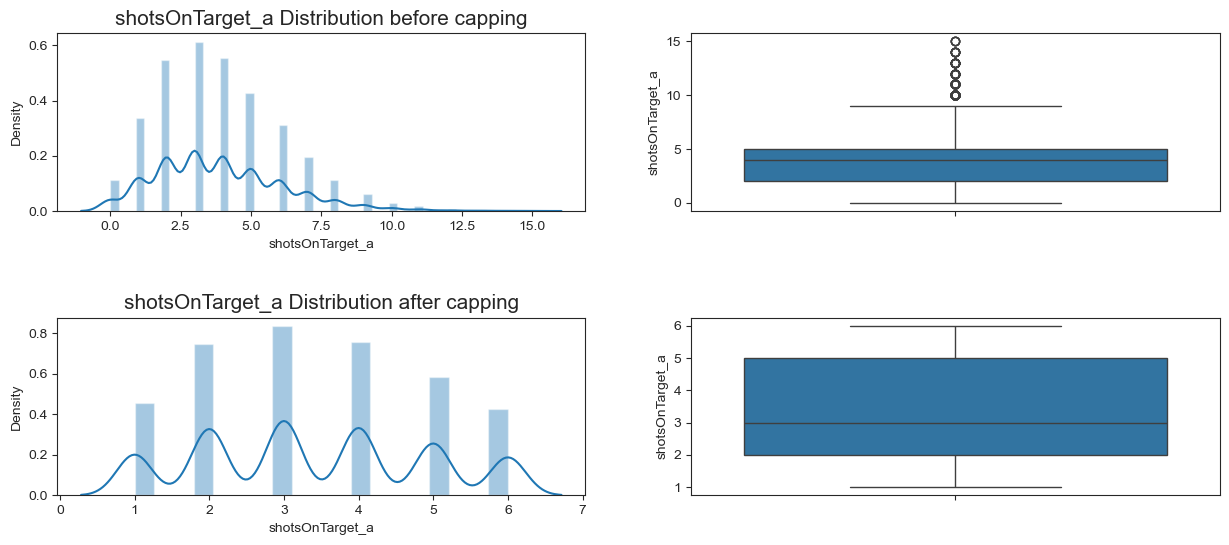

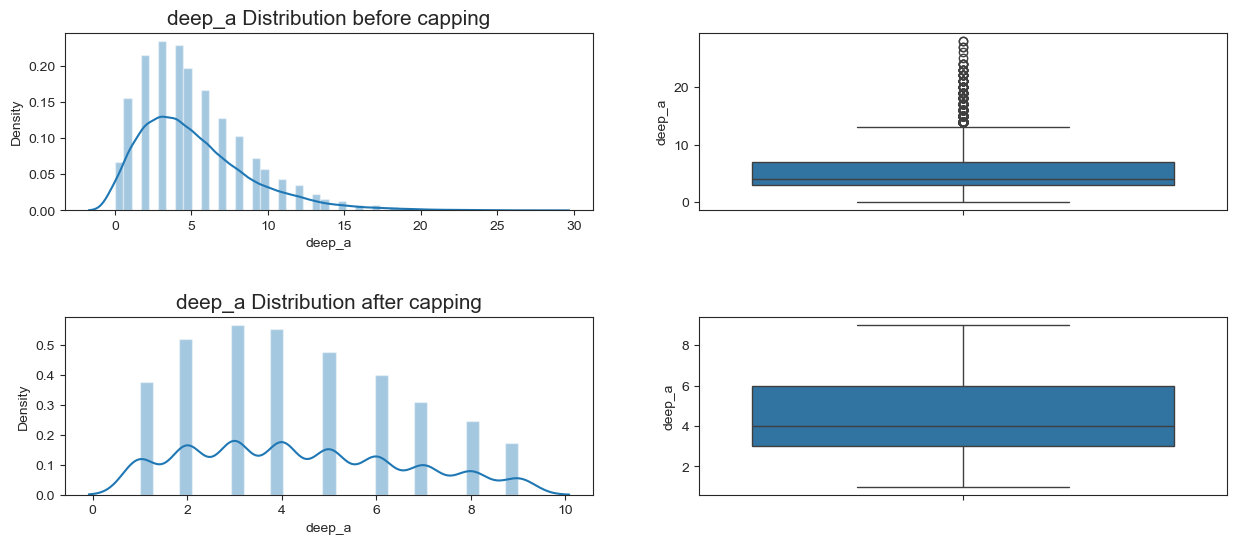

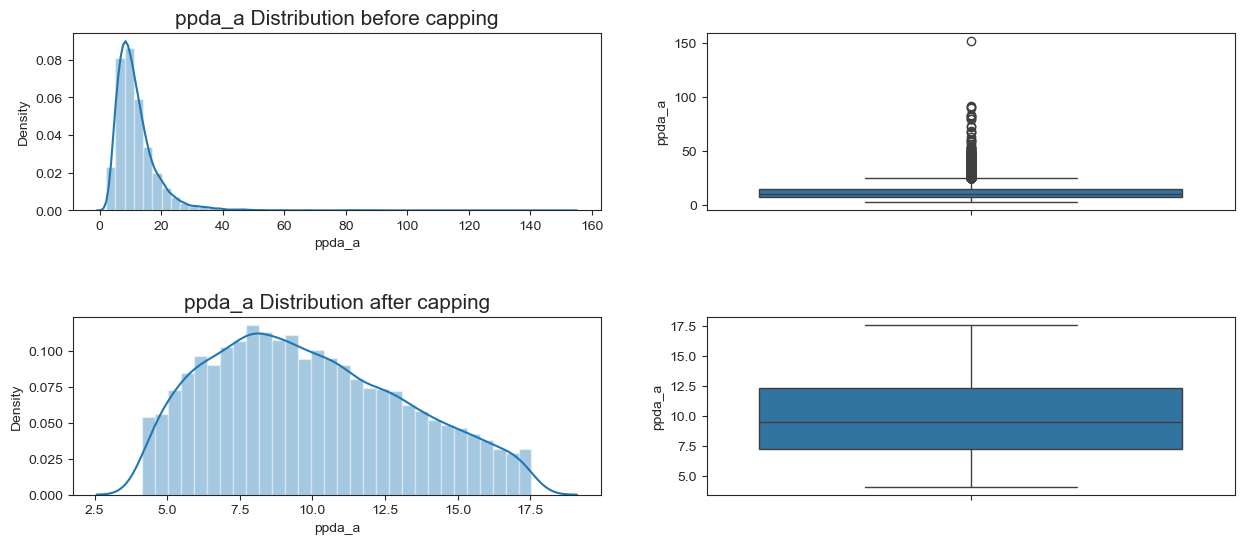

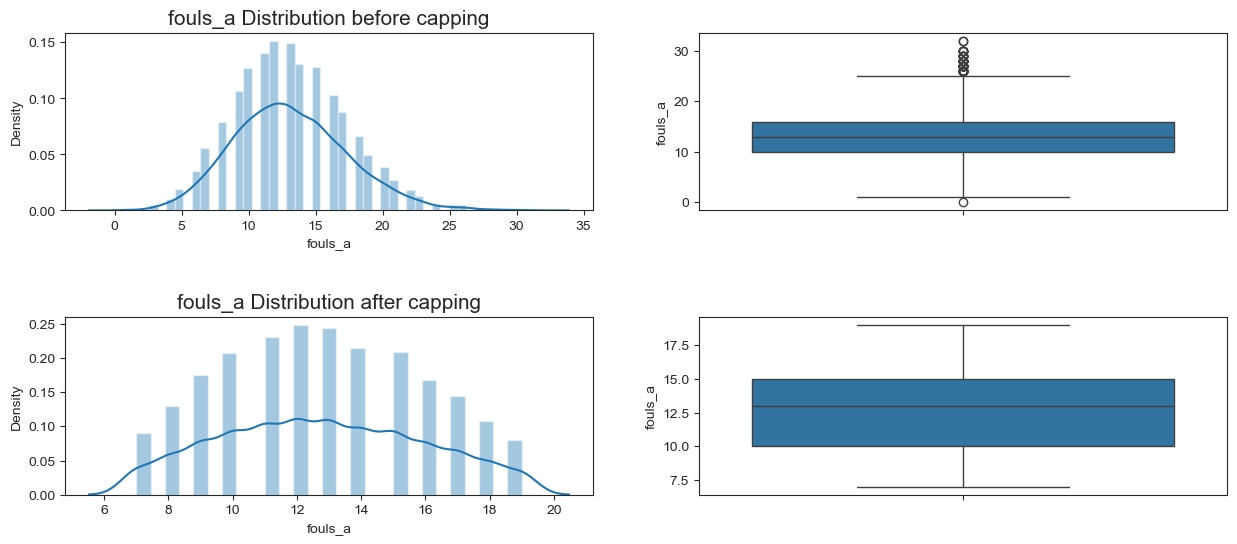

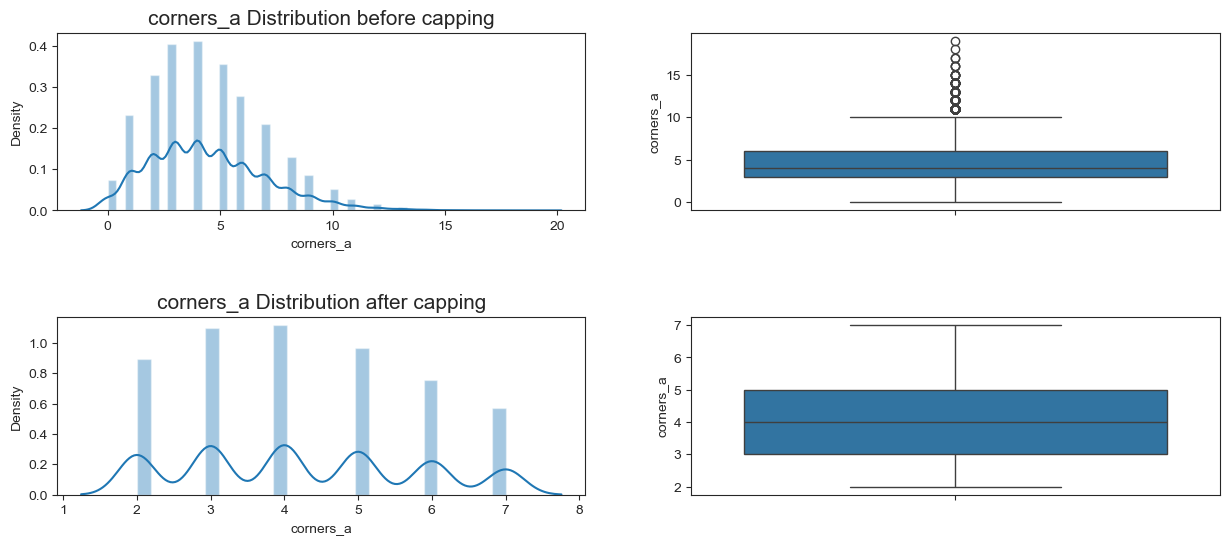

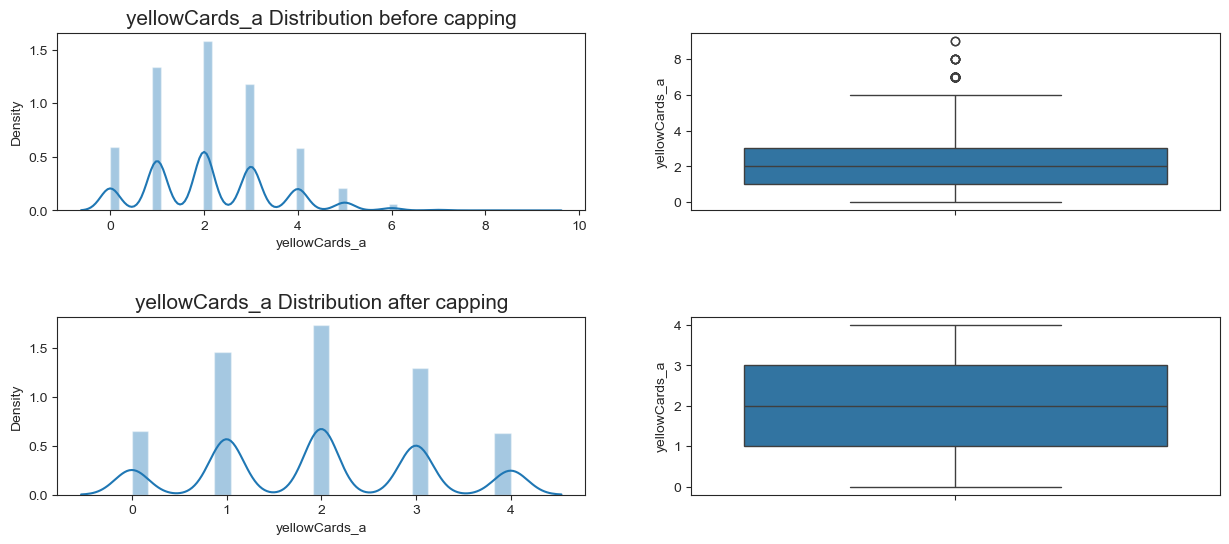

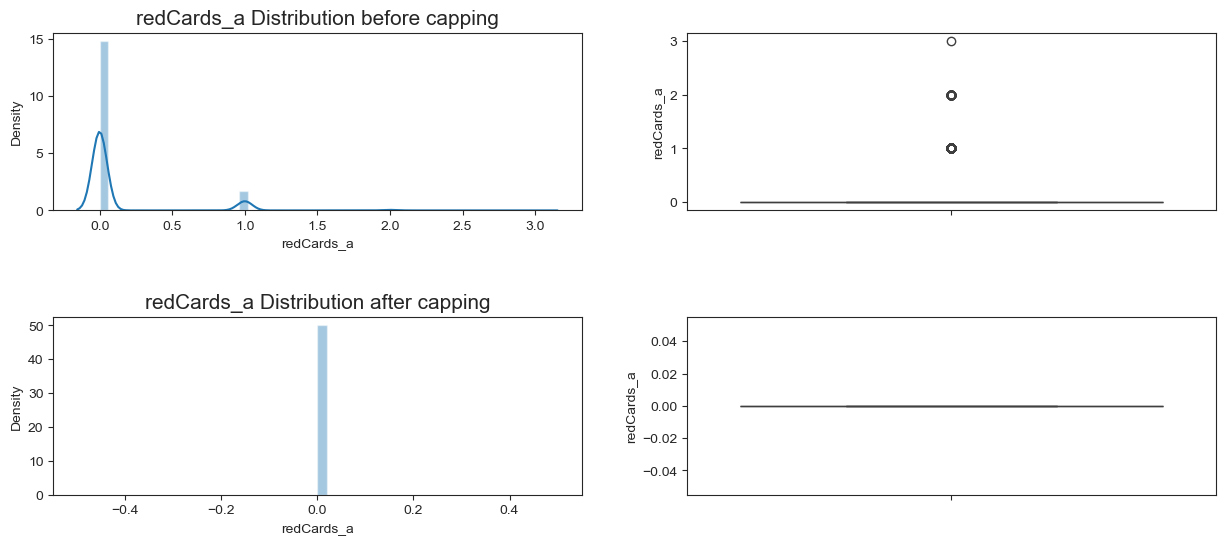

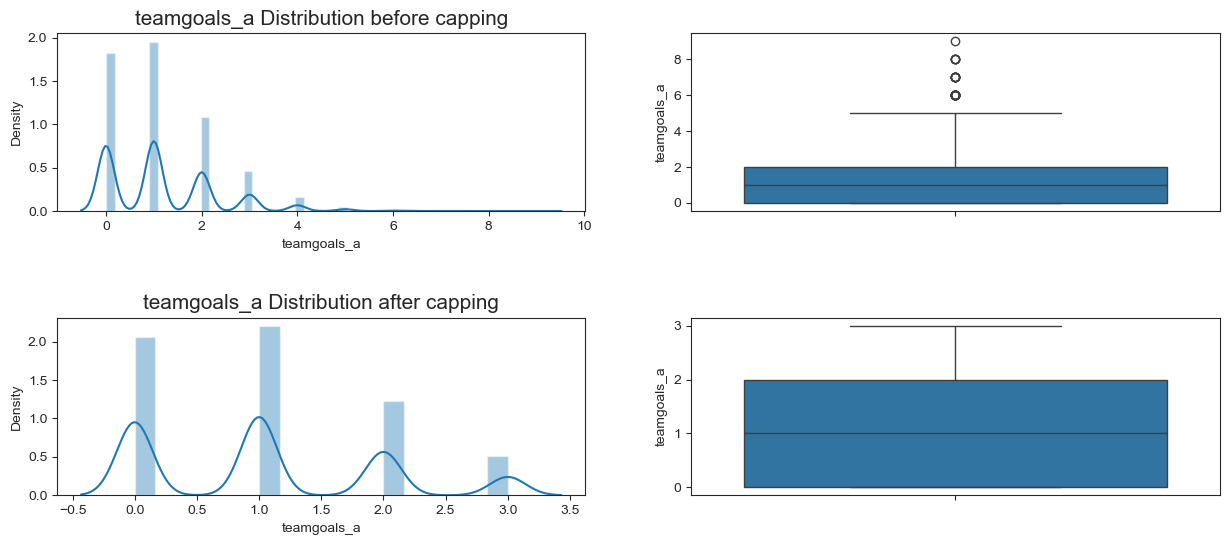

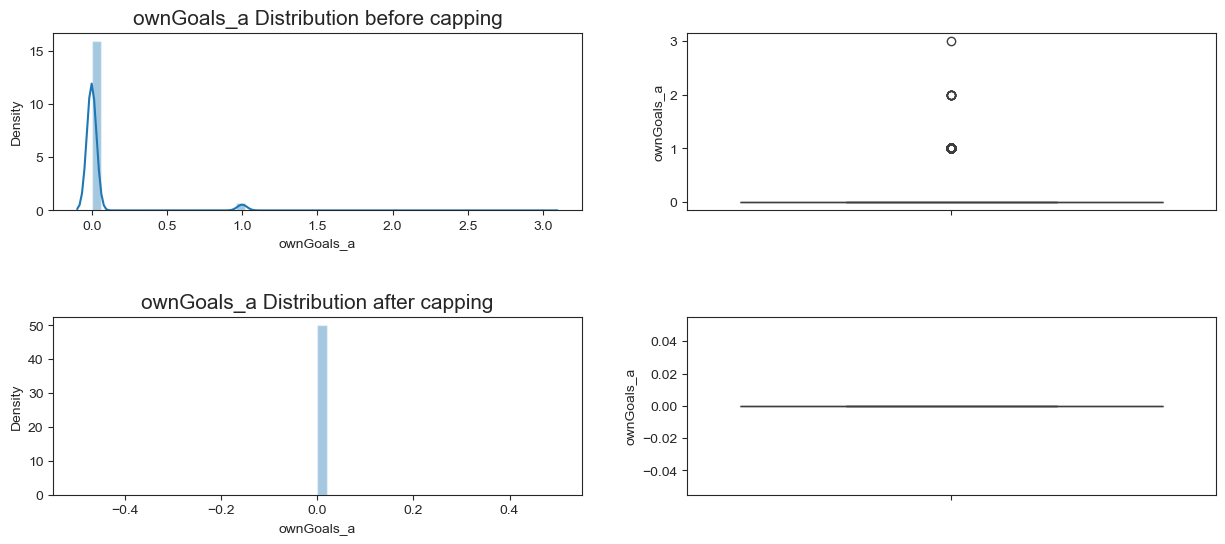

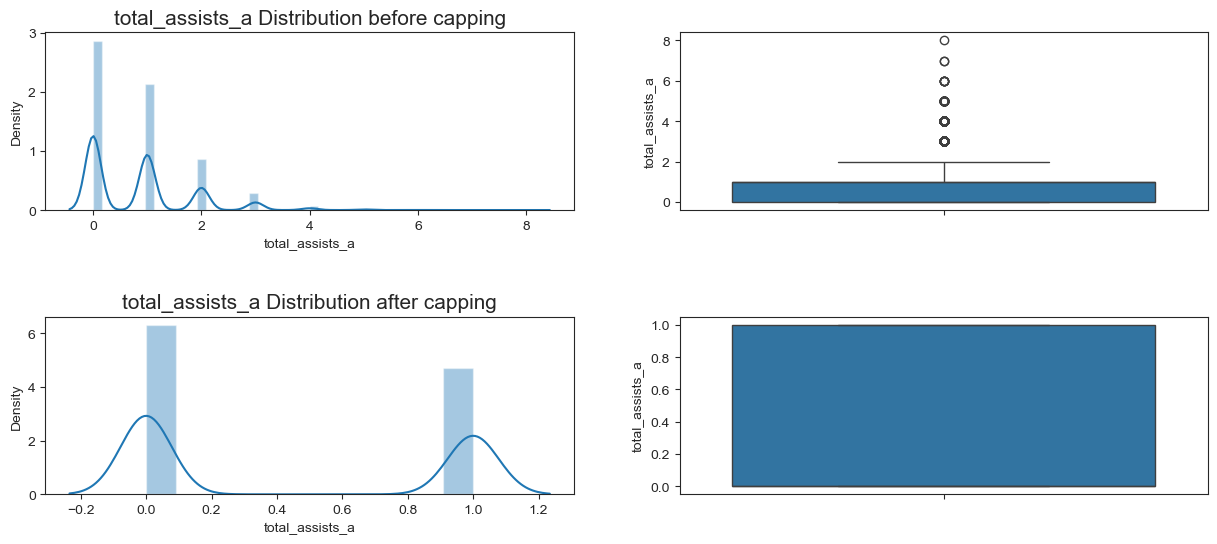

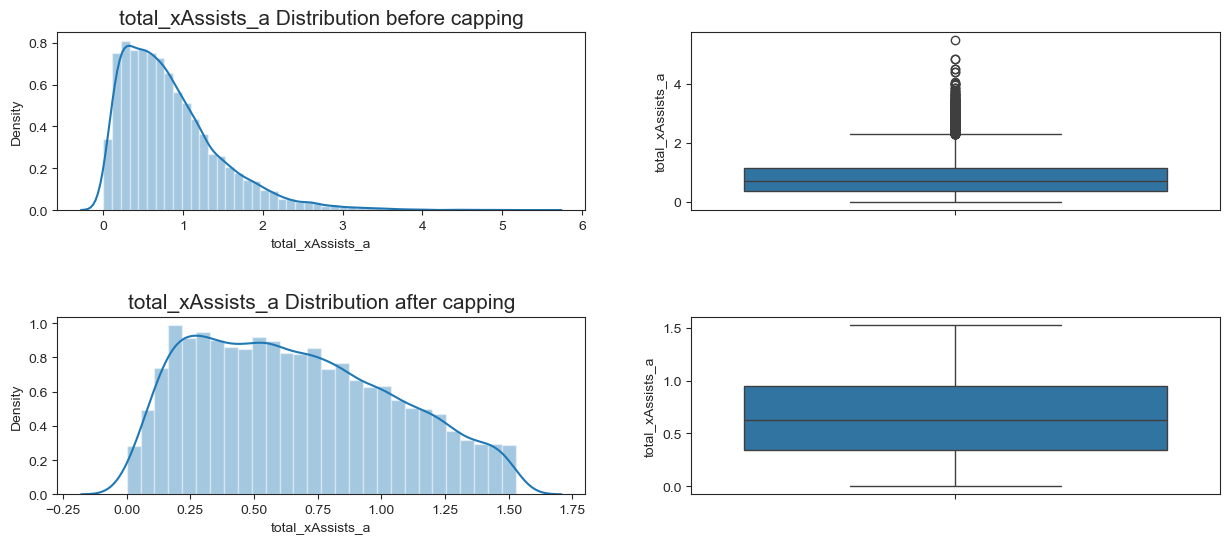

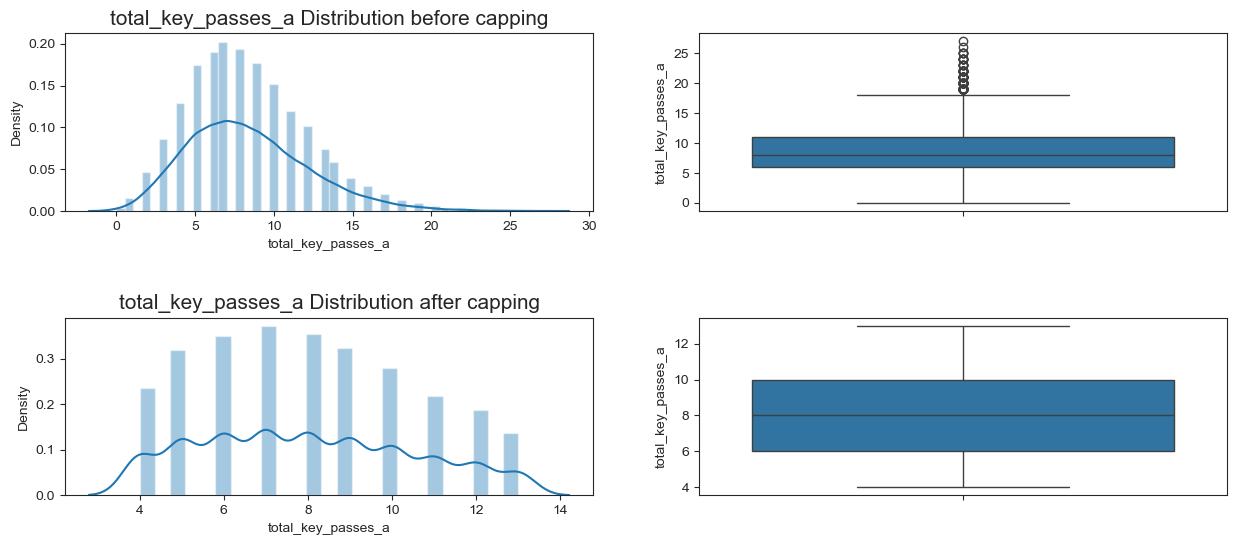

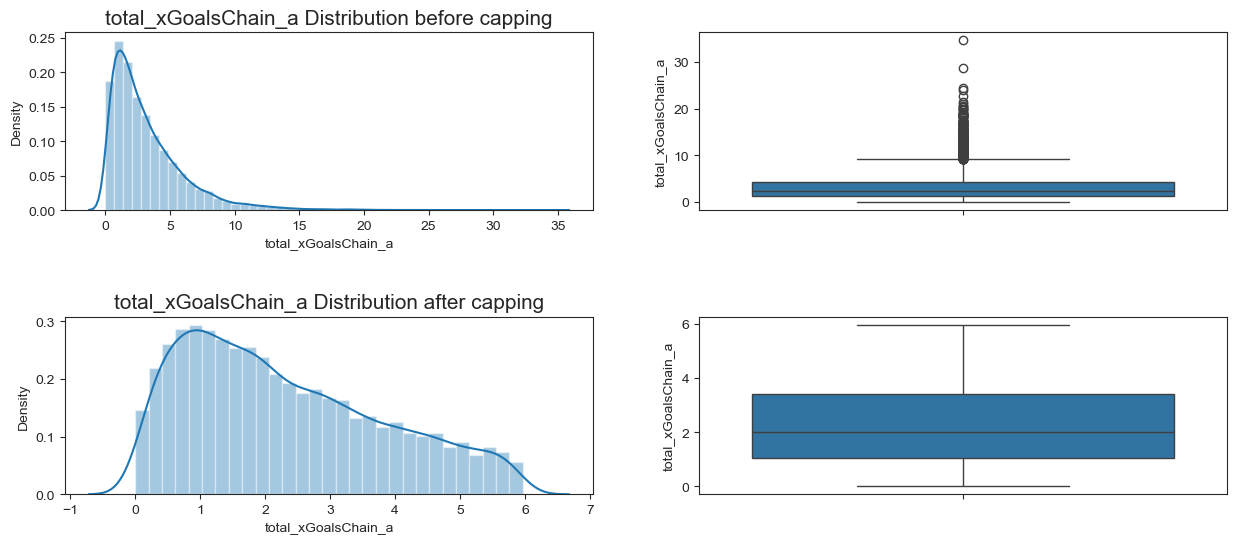

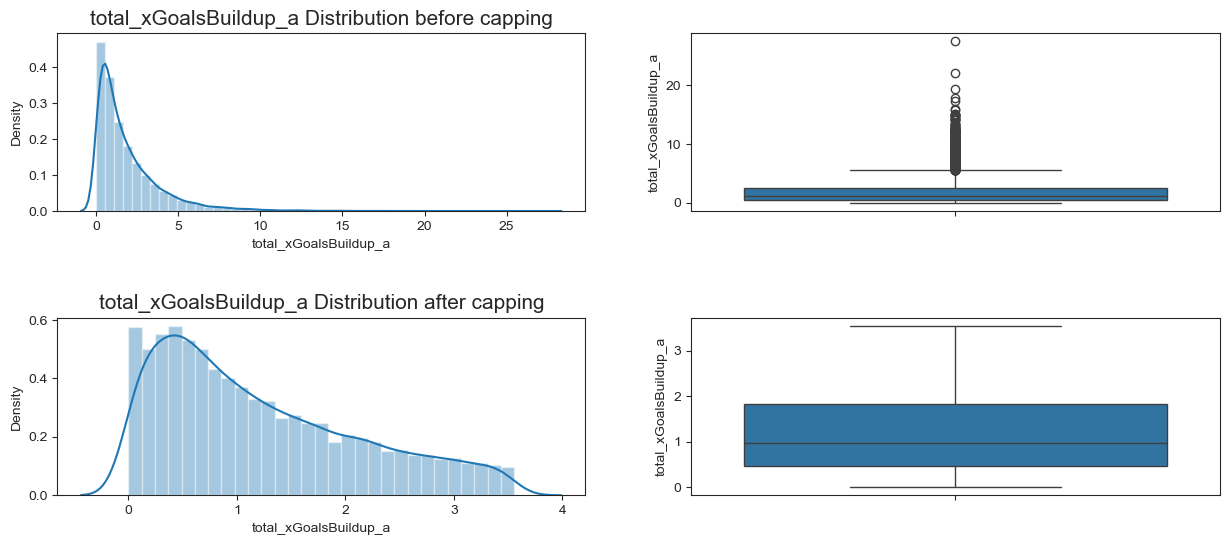

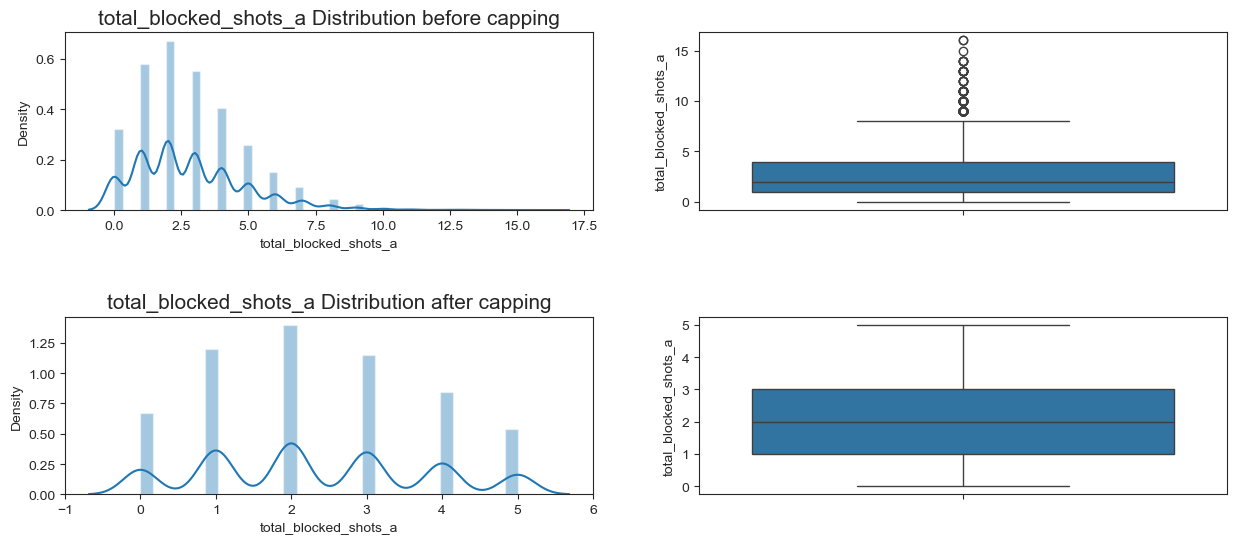

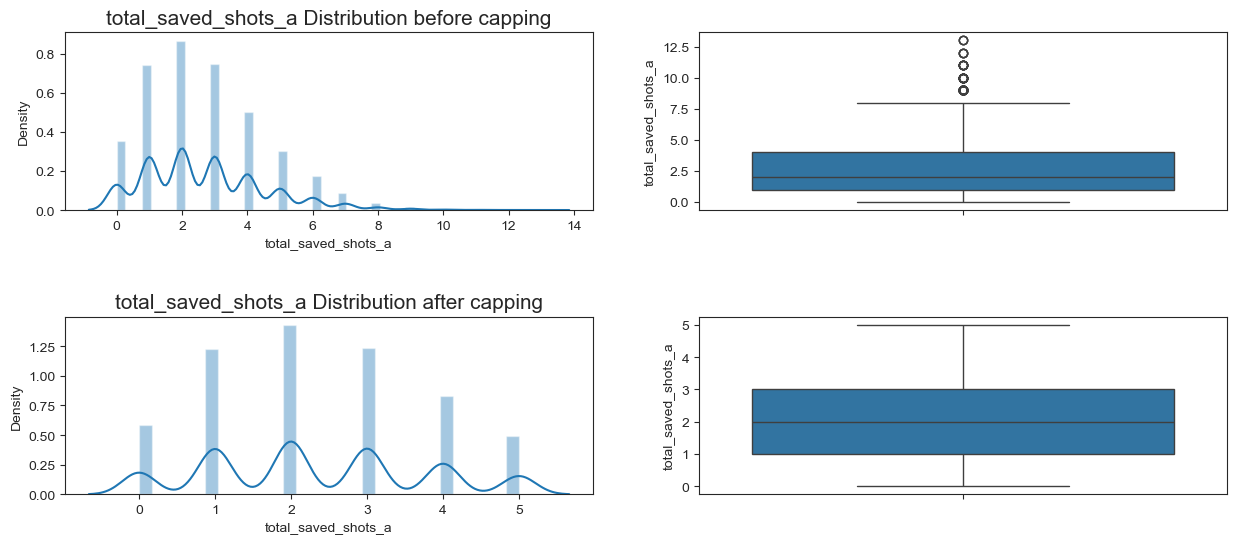

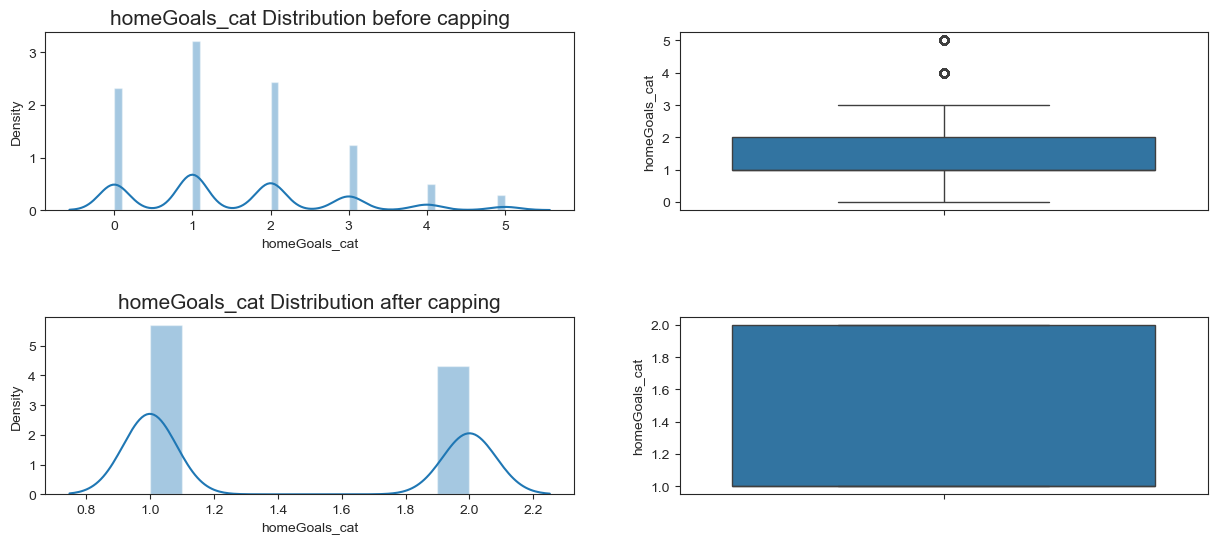

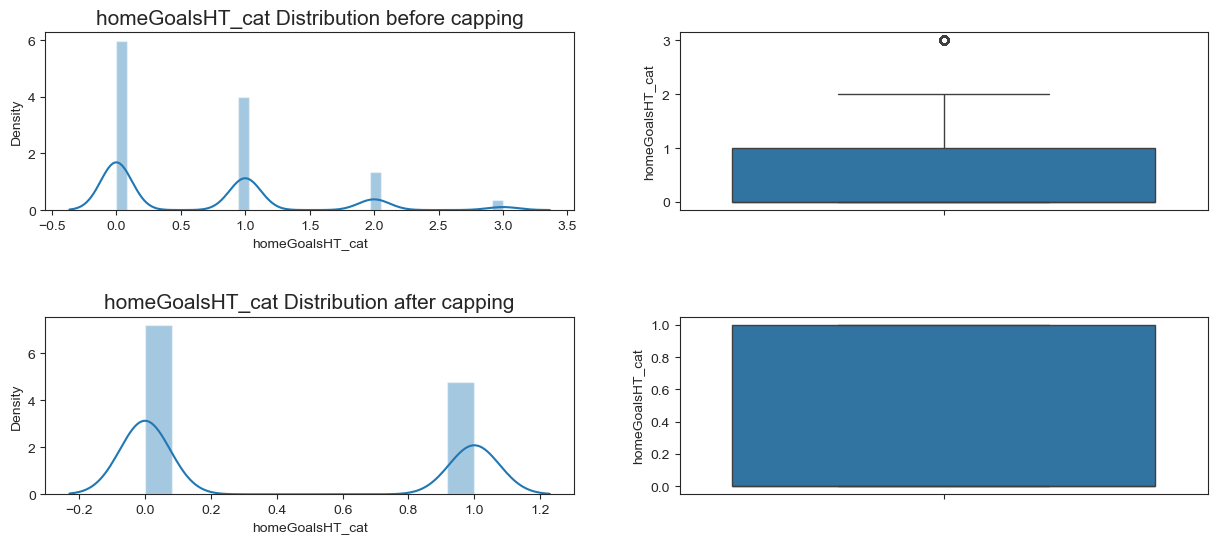

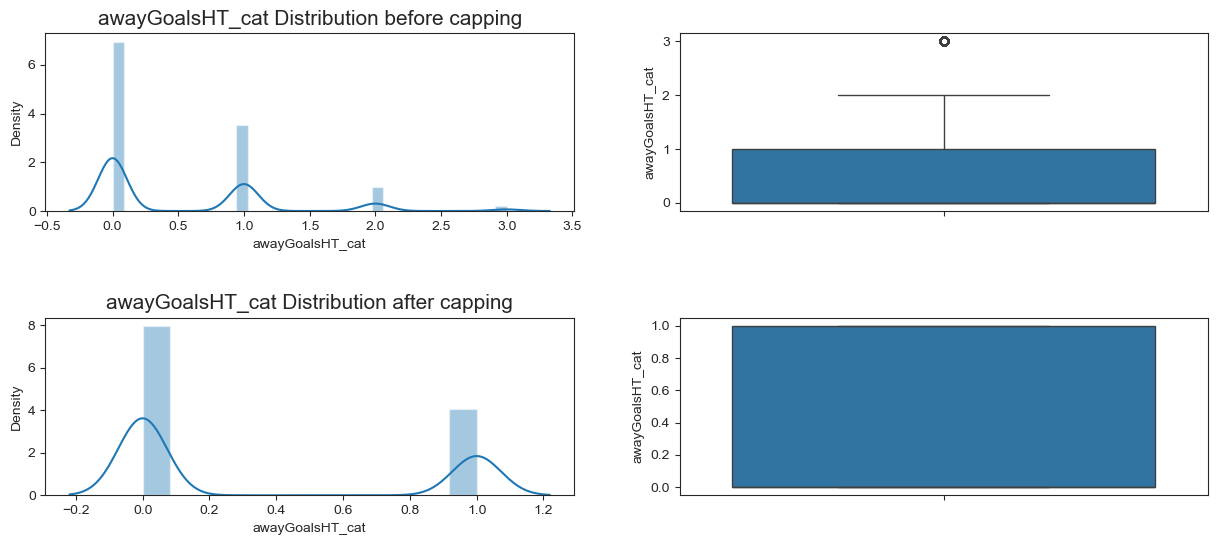

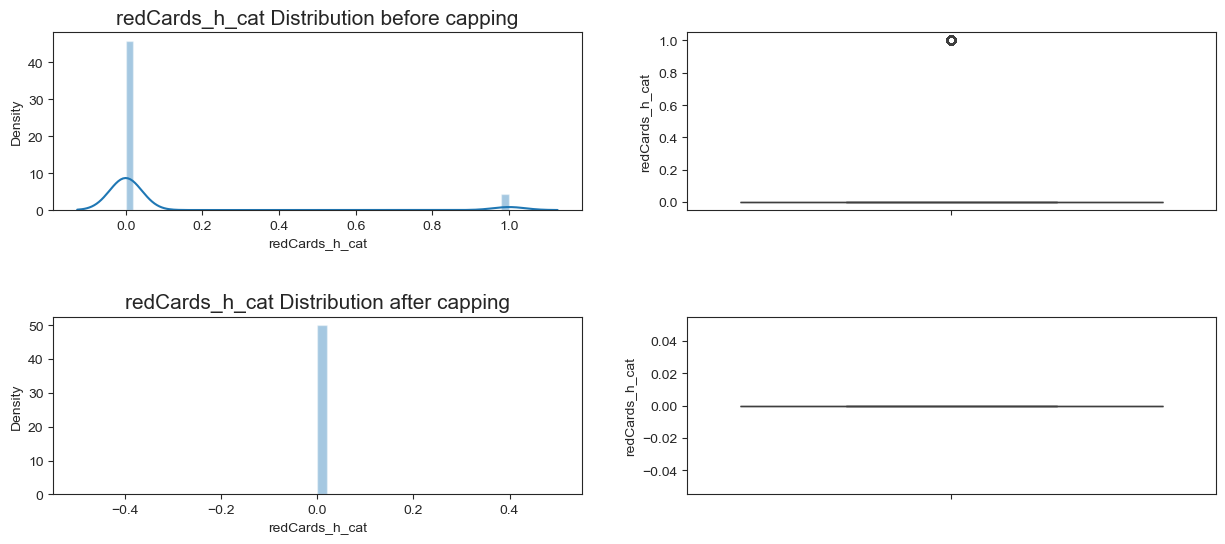

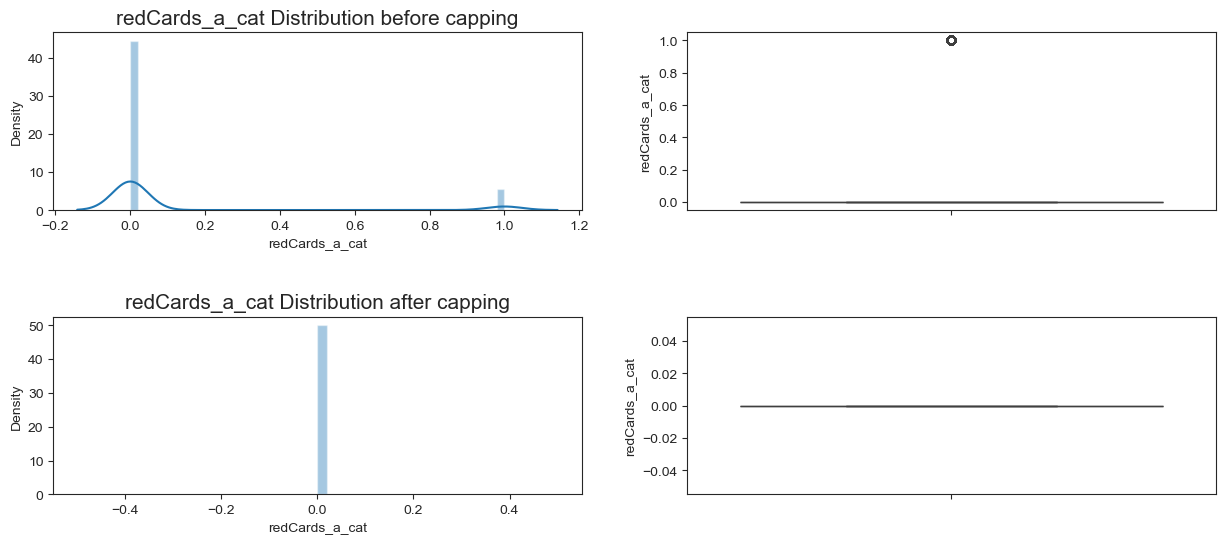

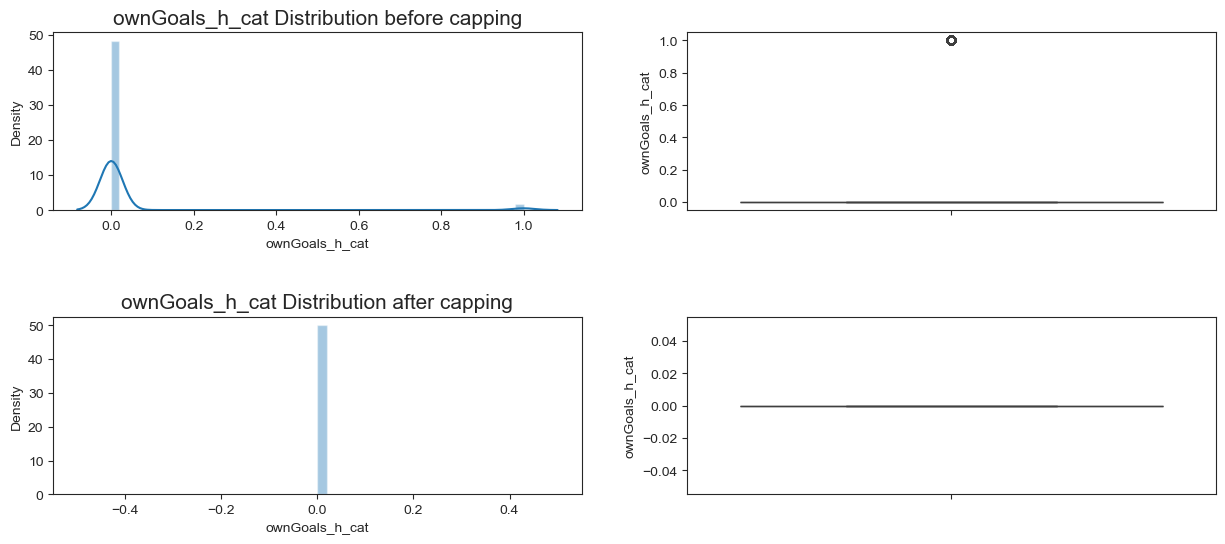

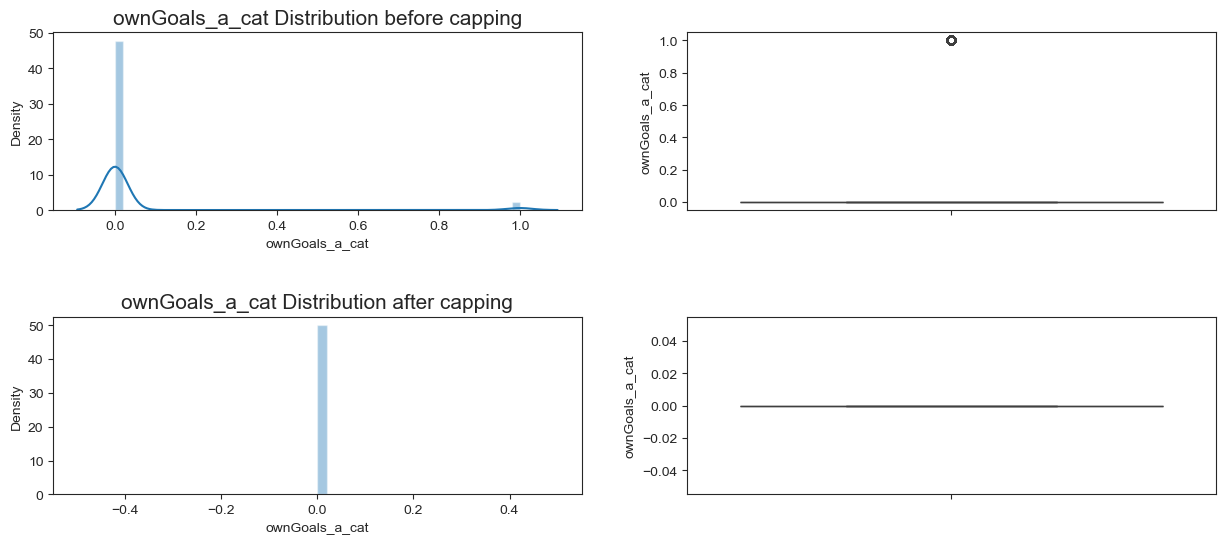

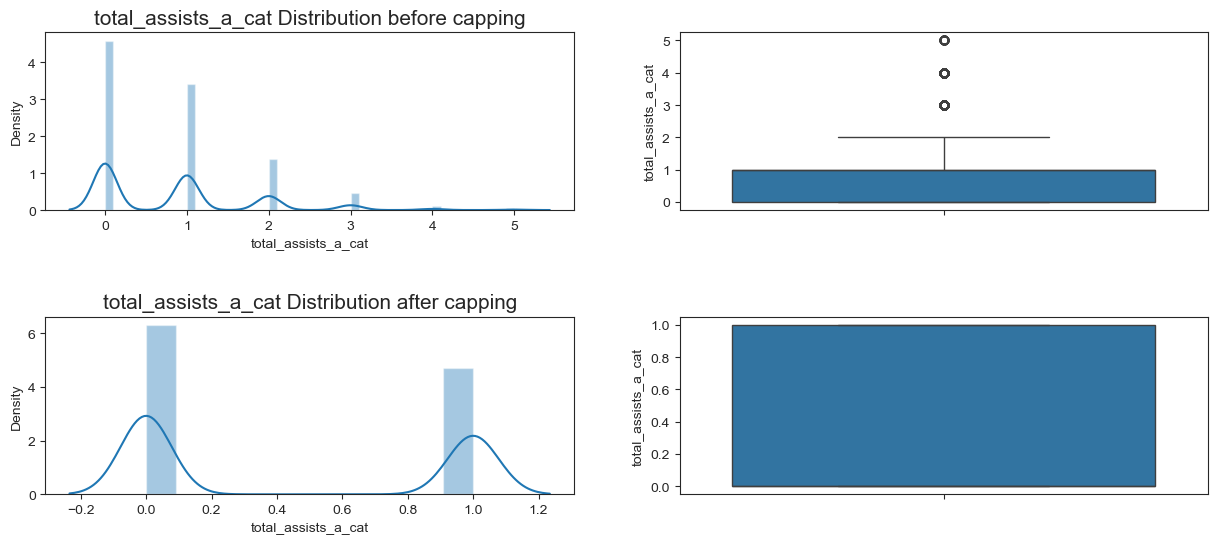

In [73]:
def dist_outliers(original_df, new, cols):
    for col in original_df:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_outliers(df, temp, outliers_df.index)

##### We clearly need to filter some features that either the feature distribution has changed significantly, or cases where removing outliers results with only one value.

Checking if distribution (Kolmogorov–Smirnov) and/or correlation has changed significantly:

In [74]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [75]:
df.columns

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeGoalsHalfTime', 'awayGoalsHalfTime',
       'xGoals_h', 'shots_h', 'shotsOnTarget_h', 'deep_h', 'ppda_h', 'fouls_h',
       'corners_h', 'yellowCards_h', 'redCards_h', 'teamgoals_h', 'ownGoals_h',
       'total_assists_h', 'total_xAssists_h', 'total_key_passes_h',
       'total_xGoalsChain_h', 'total_xGoalsBuildup_h', 'total_blocked_shots_h',
       'total_saved_shots_h', 'xGoals_a', 'shots_a', 'shotsOnTarget_a',
       'deep_a', 'ppda_a', 'fouls_a', 'corners_a', 'yellowCards_a',
       'redCards_a', 'teamgoals_a', 'ownGoals_a', 'total_assists_a',
       'total_xAssists_a', 'total_key_passes_a', 'total_xGoalsChain_a',
       'total_xGoalsBuildup_a', 'total_blocked_shots_a', 'total_saved_shots_a',
       'result_h', 'game_year', 'game_month', 'game_day', 'homeGoals_cat',
       'awayGoals_cat', 'homeGoalsHT_cat', 'awayGoalsHT_cat', 'redCards_h_cat',
       'redCards_a_cat', '

In [77]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

def analyze_outlier_impact(df, df_numeric, df_outliers, target_col, cocor_func):
    """
    Analyze how removing outliers affects feature distribution and correlation with a target variable.

    Parameters:
    - df: Full DataFrame including the target column
    - df_numeric: Numeric columns from df
    - df_outliers: Same shape as df_numeric, 1 = outlier, 0 = not
    - target_col: Name of the target column in df
    - cocor_func: Function that returns (correlation_diff, p_value) when comparing two correlations

    Returns:
    - out_df: DataFrame summarizing outlier impact for each feature
    """
    out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

    np.seterr(divide='ignore', invalid='ignore')  # suppress warnings

    for col in df_numeric.columns:
        if col == target_col or col not in df_outliers.columns:
            continue

        # Full feature and label
        out = df_numeric[col]
        result_out = df[target_col]

        # Feature and label with outliers removed
        non = df_numeric[col].loc[df_outliers[col] == 0]
        result_non = df[target_col].loc[df_outliers[col] == 0]

        # Correlation change
        _, p_corr = cocor_func(out, result_out, non, result_non)
        cor_change = '+' if p_corr < 0.05 else '-'

        # Distribution change
        p_ks = ks_2samp(out, non)[1]
        dist_change = '+' if p_ks < 0.05 else '-'

        # Count of outliers
        mv = df_outliers[col].sum()

        # Append to summary
        out_df = pd.concat([out_df, pd.DataFrame([{
            'feature': col,
            'outliers_cnt': mv,
            'distribution_changed': dist_change,
            'correlation_changed': cor_change
        }])], ignore_index=True)

    return out_df


In [78]:
out_df = analyze_outlier_impact(
    df=df,
    df_numeric=df_numeric,
    df_outliers=df_outliers,
    target_col='result',
    cocor_func=cocor
)

In [79]:
out_df

feature outliers_cnt distribution_changed  \
0               awayGoals          561                    +   
1         awayGoalsHT_cat         1283                    +   
2       awayGoalsHalfTime         1283                    +   
3           awayGoals_cat            0                    -   
4               corners_a         3062                    +   
5               corners_h         1428                    +   
6                  deep_a         1925                    -   
7                  deep_h         1055                    -   
8                 fouls_a         1533                    +   
9                 fouls_h         2749                    +   
10               game_day            0                    -   
11             game_month            0                    -   
12              game_year            0                    -   
13              homeGoals         5495                    +   
14        homeGoalsHT_cat         1856                    +   
15      homeGoalsHalfTime         1856                    +   
16          homeGoals_cat         5495                    +   
17               leagueID            0                    -   
18             ownGoals_a          563                    +   
19         ownGoals_a_cat          563                    +   
20             ownGoals_h          435                    +   
21         ownGoals_h_cat          435                    +   
22                 ppda_a         2070                    +   
23                 ppda_h         2063                    +   
24             redCards_a         1396                    +   
25         redCards_a_cat         1396                    +   
26             redCards_h         1078                    +   
27         redCards_h_cat         1078                    +   
28                 season            0                    -   
29        shotsOnTarget_a         2057                    +   
30        shotsOnTarget_h         2759                    +   
31                shots_a         1851                    +   
32                shots_h         2173                    +   
33            teamgoals_a          520                    +   
34            teamgoals_h         5501                    +   
35        total_assists_a         2533                    +   
36    total_assists_a_cat         2533                    +   
37        total_assists_h          367                    +   
38    total_assists_h_cat            0                    -   
39  total_blocked_shots_a         1359                    -   
40  total_blocked_shots_h         2136                    -   
41     total_key_passes_a         2323                    +   
42     total_key_passes_h         1518                    +   
43    total_saved_shots_a         1078                    -   
44    total_saved_shots_h         2614                    -   
45       total_xAssists_a         1641                    +   
46       total_xAssists_h         1765                    +   
47  total_xGoalsBuildup_a         1882                    +   
48  total_xGoalsBuildup_h         1916                    +   
49    total_xGoalsChain_a         1743                    +   
50    total_xGoalsChain_h         1715                    +   
51               xGoals_a         1553                    -   
52               xGoals_h         1672                    -   
53          yellowCards_a          664                    +   
54      yellowCards_a_cat            0                    -   
55          yellowCards_h          513                    -   
56      yellowCards_h_cat            0                    -   

   correlation_changed  
0                    +  
1                    +  
2                    +  
3                    -  
4                    -  
5                    -  
6                    +  
7                    +  
8                    -  
9                    -  
10                   -  
11                   -  
12                   -  
13           

we will drop the columns that bowth the correlation and distribution didnt 

In [80]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change the distribution
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

feature outliers_cnt distribution_changed  \
0               awayGoals          561                    +   
1         awayGoalsHT_cat         1283                    +   
2       awayGoalsHalfTime         1283                    +   
3           awayGoals_cat            0                    -   
4               corners_a         3062                    +   
5               corners_h         1428                    +   
6                  deep_a         1925                    -   
7                  deep_h         1055                    -   
8                 fouls_a         1533                    +   
9                 fouls_h         2749                    +   
10               game_day            0                    -   
11             game_month            0                    -   
12              game_year            0                    -   
13              homeGoals         5495                    +   
14        homeGoalsHT_cat         1856                    +   
15      homeGoalsHalfTime         1856                    +   
16          homeGoals_cat         5495                    +   
17               leagueID            0                    -   
18             ownGoals_a          563                    +   
19         ownGoals_a_cat          563                    +   
20             ownGoals_h          435                    +   
21         ownGoals_h_cat          435                    +   
22                 ppda_a         2070                    +   
23                 ppda_h         2063                    +   
24             redCards_a         1396                    +   
25         redCards_a_cat         1396                    +   
26             redCards_h         1078                    +   
27         redCards_h_cat         1078                    +   
28                 season            0                    -   
29        shotsOnTarget_a         2057                    +   
30        shotsOnTarget_h         2759                    +   
31                shots_a         1851                    +   
32                shots_h         2173                    +   
33            teamgoals_a          520                    +   
34            teamgoals_h         5501                    +   
35        total_assists_a         2533                    +   
36    total_assists_a_cat         2533                    +   
37        total_assists_h          367                    +   
38    total_assists_h_cat            0                    -   
39  total_blocked_shots_a         1359                    -   
40  total_blocked_shots_h         2136                    -   
41     total_key_passes_a         2323                    +   
42     total_key_passes_h         1518                    +   
43    total_saved_shots_a         1078                    -   
44    total_saved_shots_h         2614                    -   
45       total_xAssists_a         1641                    +   
46       total_xAssists_h         1765                    +   
47  total_xGoalsBuildup_a         1882                    +   
48  total_xGoalsBuildup_h         1916                    +   
49    total_xGoalsChain_a         1743                    +   
50    total_xGoalsChain_h         1715                    +   
51               xGoals_a         1553                    -   
52               xGoals_h         1672                    -   
53          yellowCards_a          664                    +   
54      yellowCards_a_cat            0                    -   
55          yellowCards_h          513                    -   
56      yellowCards_h_cat            0                    -   

   correlation_changed drop  
0                    +   no  
1                    +   no  
2                    +   no  
3                    -  yes  
4                    -  yes  
5                    -  yes  
6                    +  yes  
7                    +  yes  
8                    -  yes  
9                    -  yes  
10                   -  yes  
11 

In [81]:
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

feature outliers_cnt distribution_changed  \
3           awayGoals_cat            0                    -   
4               corners_a         3062                    +   
5               corners_h         1428                    +   
6                  deep_a         1925                    -   
7                  deep_h         1055                    -   
8                 fouls_a         1533                    +   
9                 fouls_h         2749                    +   
10               game_day            0                    -   
11             game_month            0                    -   
12              game_year            0                    -   
17               leagueID            0                    -   
18             ownGoals_a          563                    +   
19         ownGoals_a_cat          563                    +   
20             ownGoals_h          435                    +   
21         ownGoals_h_cat          435                    +   
24             redCards_a         1396                    +   
25         redCards_a_cat         1396                    +   
26             redCards_h         1078                    +   
27         redCards_h_cat         1078                    +   
28                 season            0                    -   
38    total_assists_h_cat            0                    -   
39  total_blocked_shots_a         1359                    -   
40  total_blocked_shots_h         2136                    -   
43    total_saved_shots_a         1078                    -   
44    total_saved_shots_h         2614                    -   
51               xGoals_a         1553                    -   
52               xGoals_h         1672                    -   
53          yellowCards_a          664                    +   
54      yellowCards_a_cat            0                    -   
55          yellowCards_h          513                    -   
56      yellowCards_h_cat            0                    -   

   correlation_changed drop  
3                    -  yes  
4                    -  yes  
5                    -  yes  
6                    +  yes  
7                    +  yes  
8                    -  yes  
9                    -  yes  
10                   -  yes  
11                   -  yes  
12                   -  yes  
17                   -  yes  
18                   -  yes  
19                   -  yes  
20                   -  yes  
21                   -  yes  
24                   -  yes  
25                   -  yes  
26                   -  yes  
27                   -  yes  
28                   -  yes  
38                   -  yes  
39                   -  yes  
40                   -  yes  
43                   -  yes  
44                   +  yes  
51                   +  yes  
52                   +  yes  
53                   -  yes  
54                   -  yes  
55                   -  yes  
56                   -  yes

In [82]:
out_df.groupby('drop').size()

drop
no     26
yes    31
dtype: int64

#### there are 8 fetuers that we need to drop

In [83]:
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

3             awayGoals_cat
4                 corners_a
5                 corners_h
6                    deep_a
7                    deep_h
8                   fouls_a
9                   fouls_h
10                 game_day
11               game_month
12                game_year
17                 leagueID
18               ownGoals_a
19           ownGoals_a_cat
20               ownGoals_h
21           ownGoals_h_cat
24               redCards_a
25           redCards_a_cat
26               redCards_h
27           redCards_h_cat
28                   season
38      total_assists_h_cat
39    total_blocked_shots_a
40    total_blocked_shots_h
43      total_saved_shots_a
44      total_saved_shots_h
51                 xGoals_a
52                 xGoals_h
53            yellowCards_a
54        yellowCards_a_cat
55            yellowCards_h
56        yellowCards_h_cat
Name: feature, dtype: object

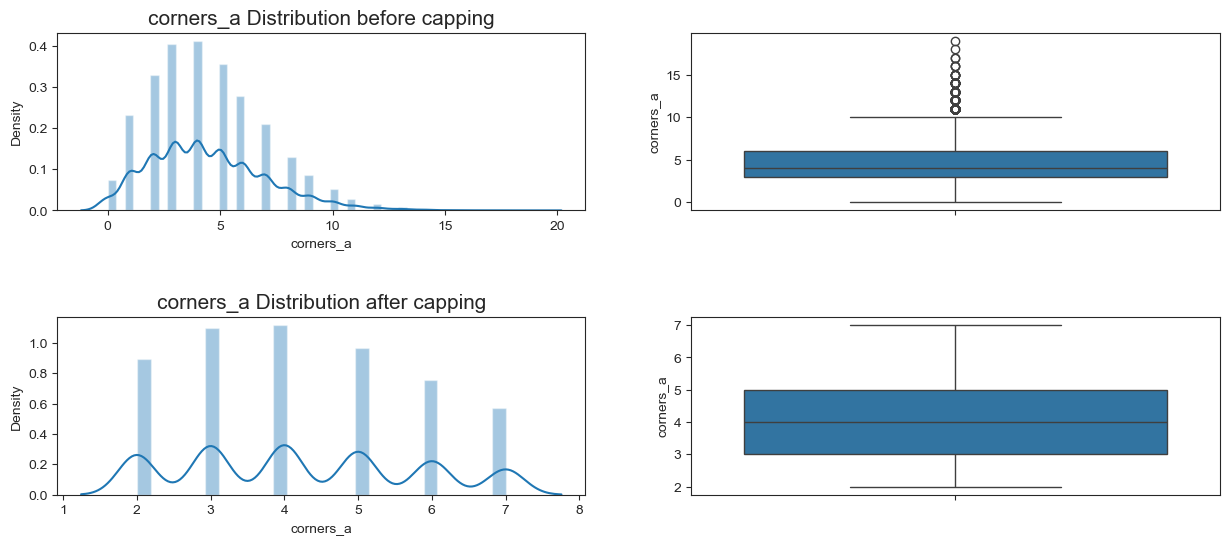

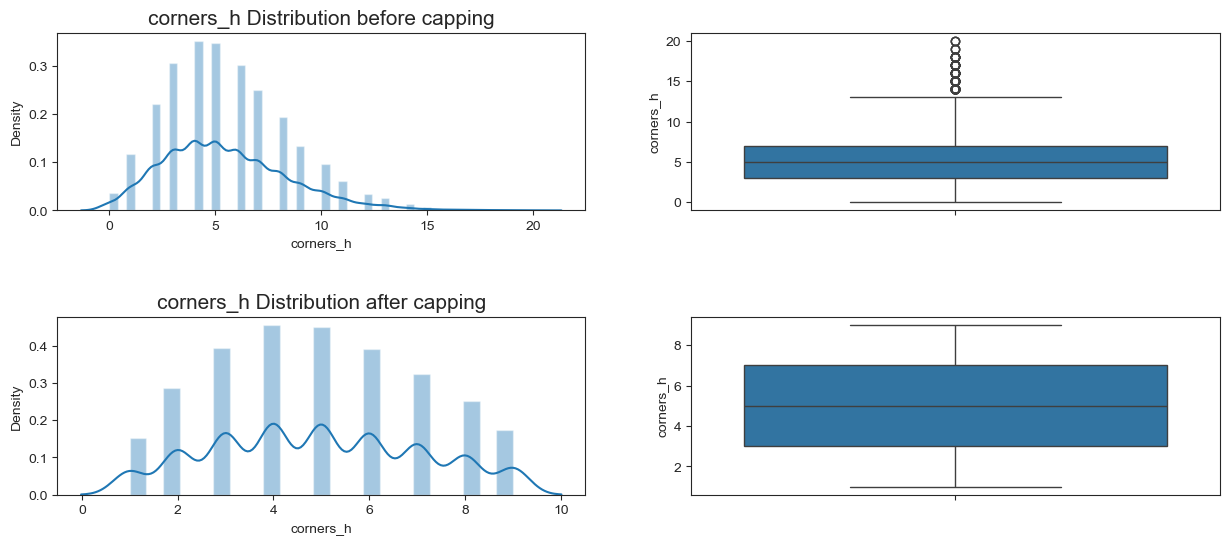

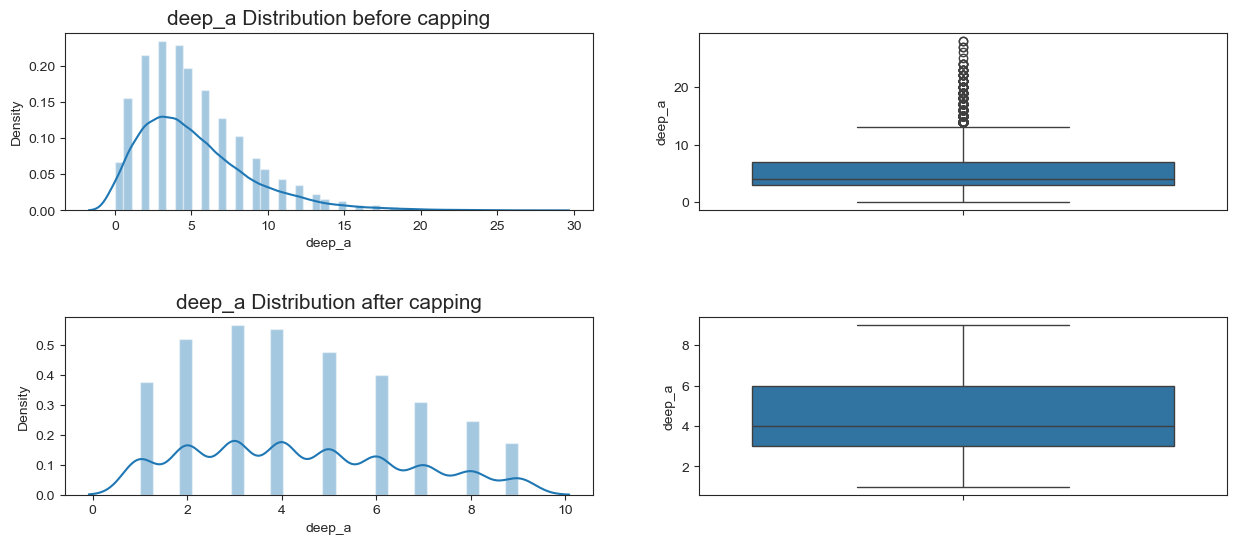

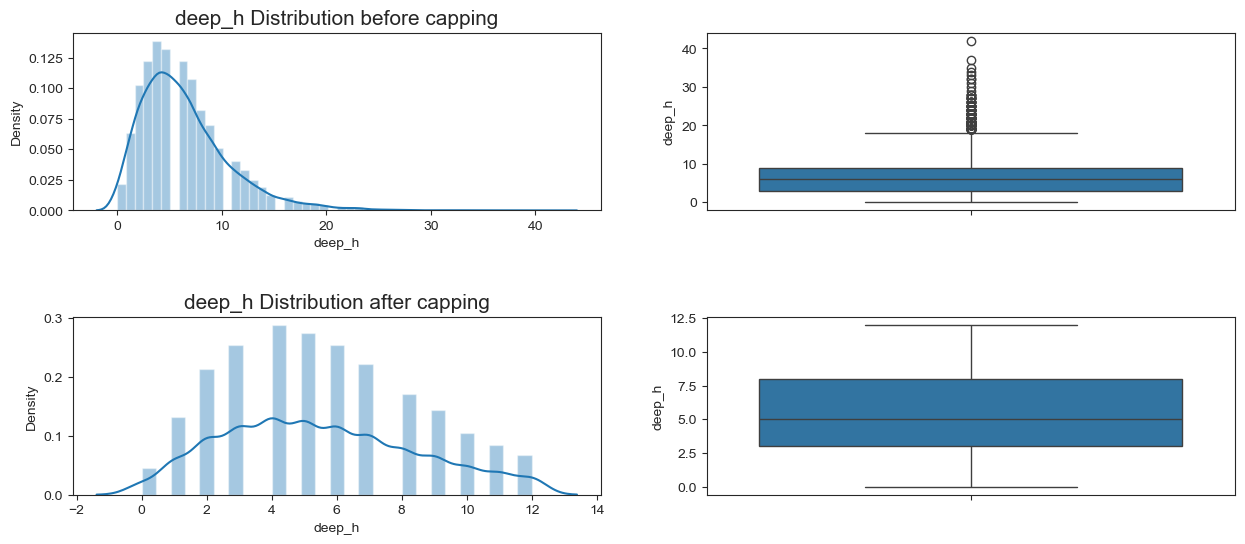

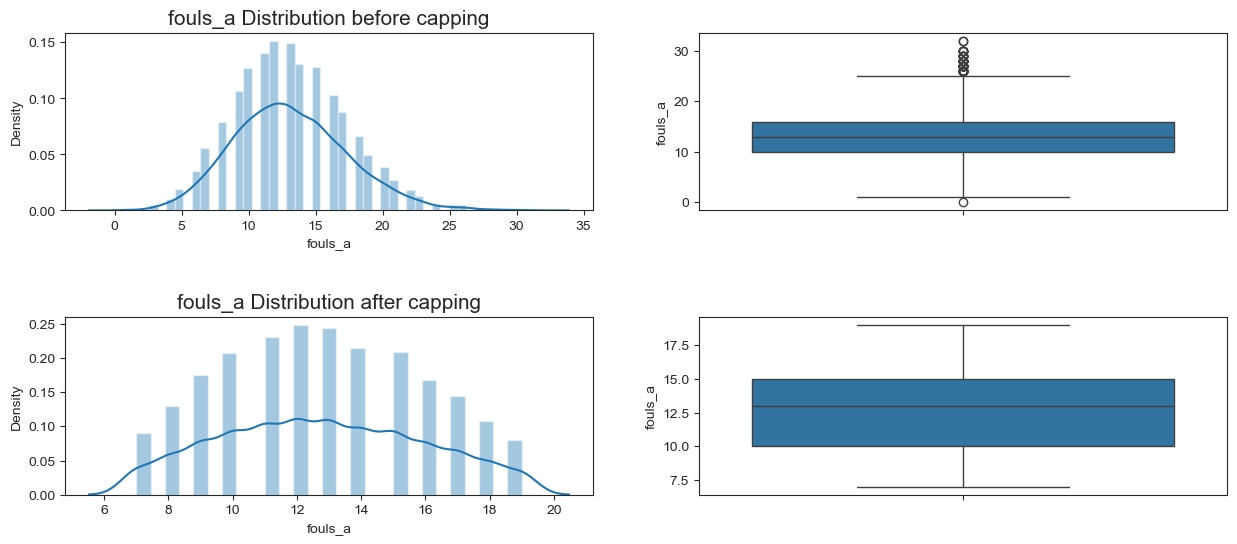

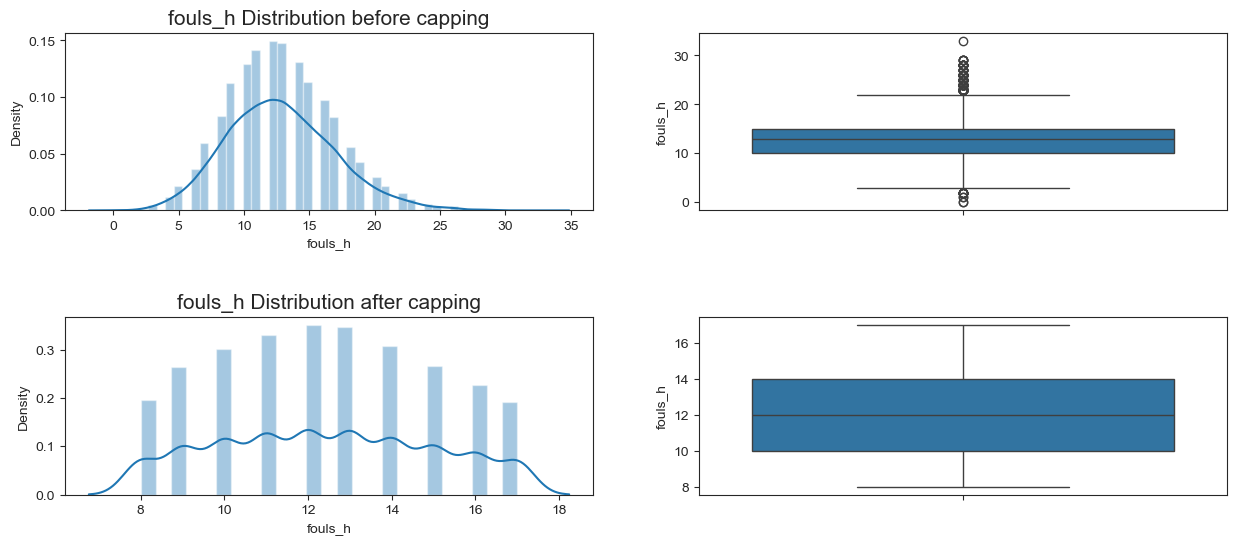

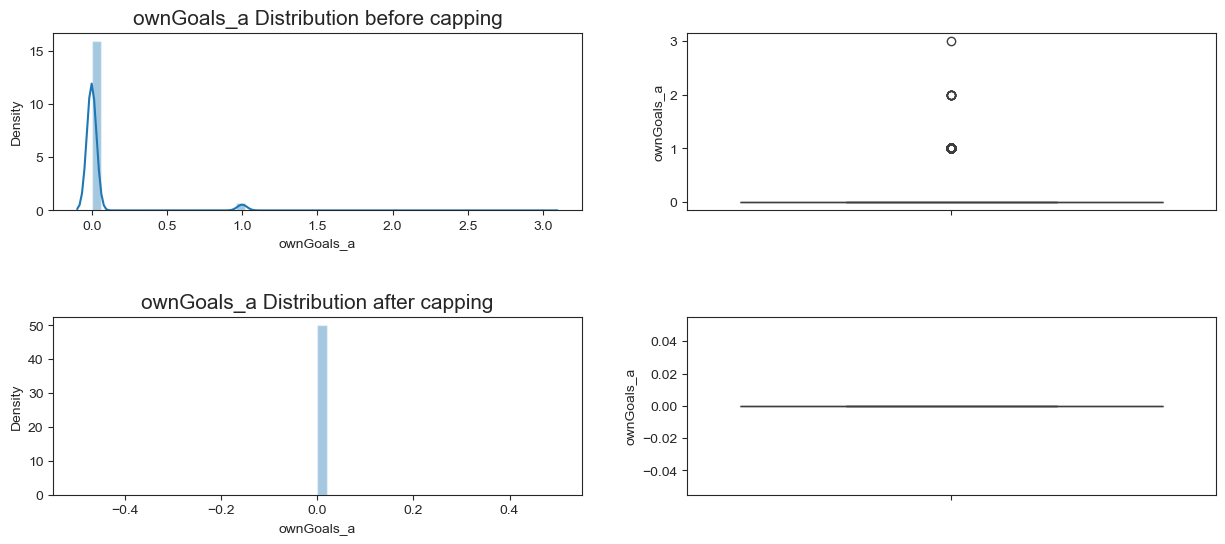

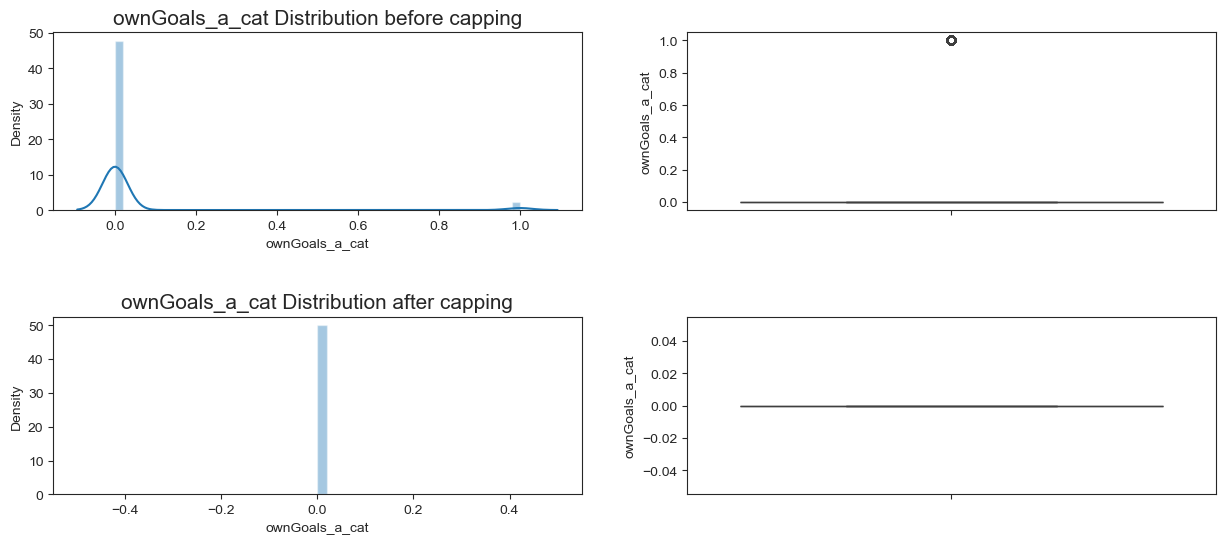

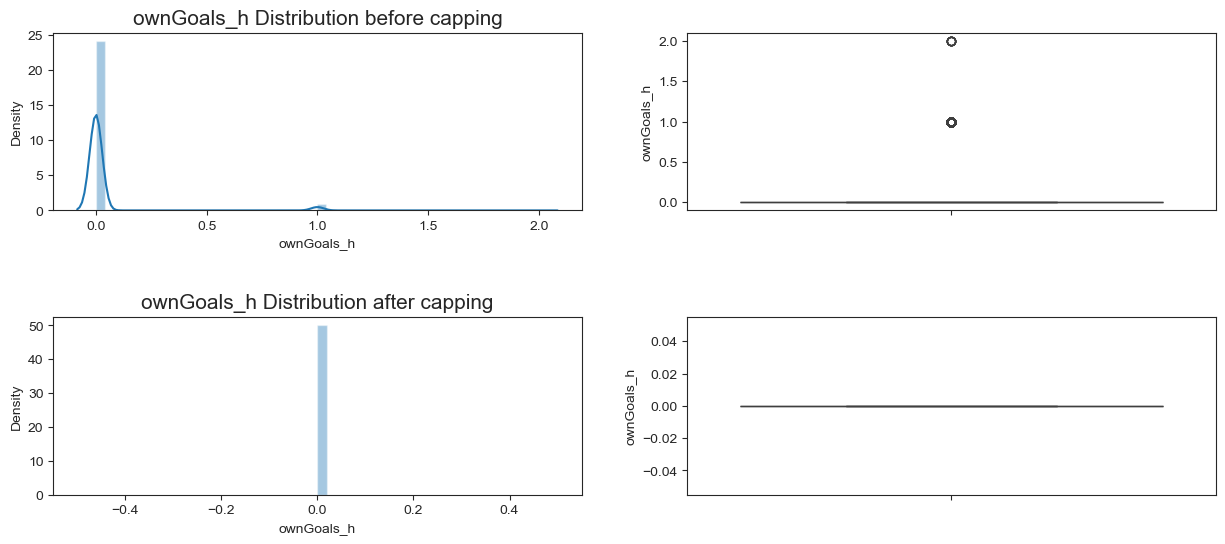

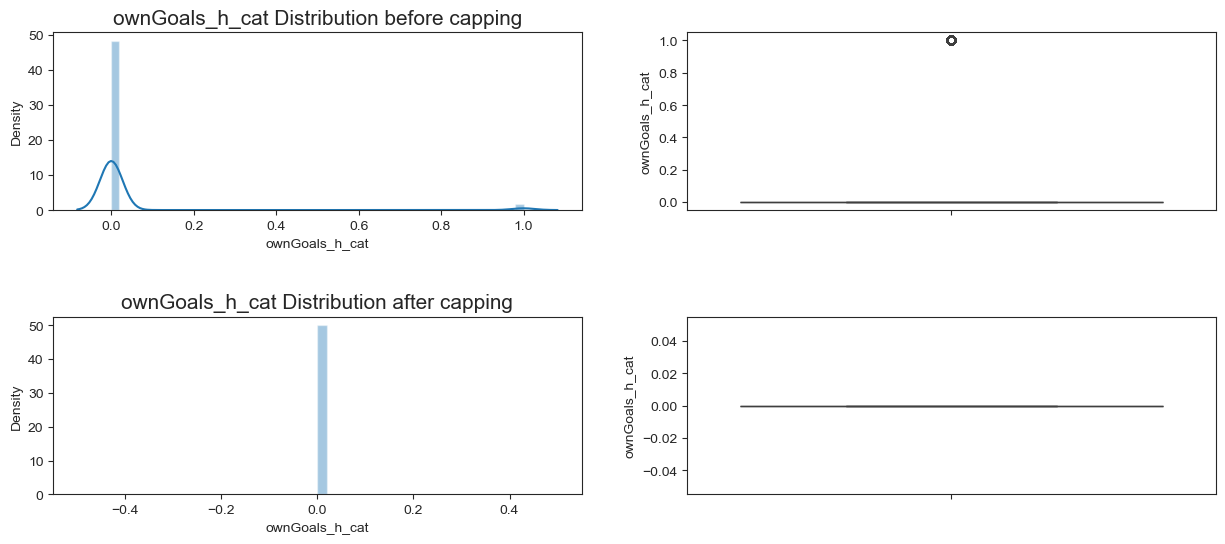

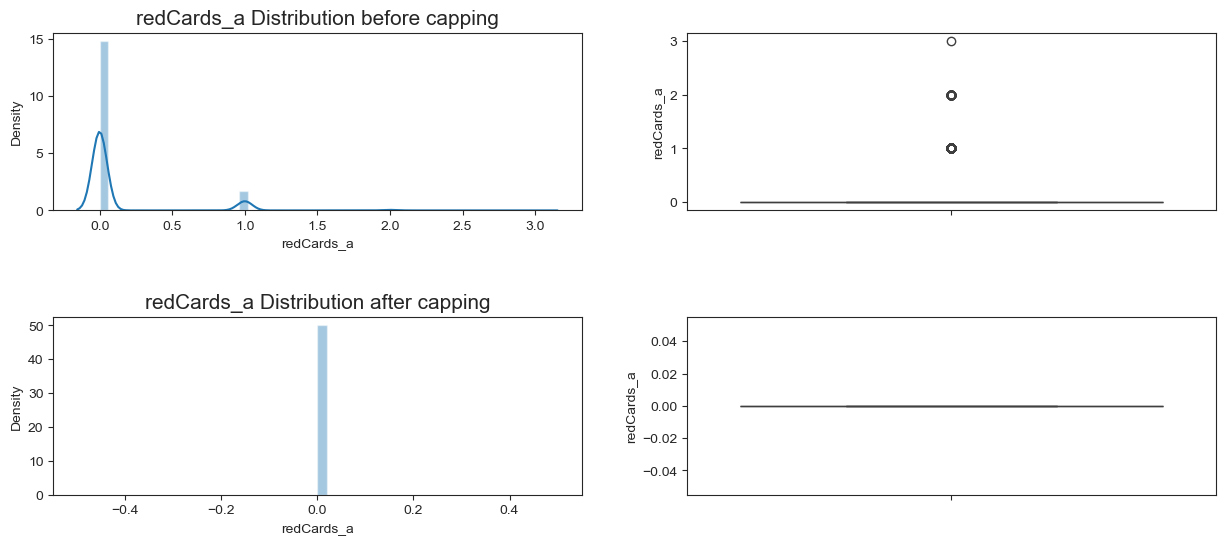

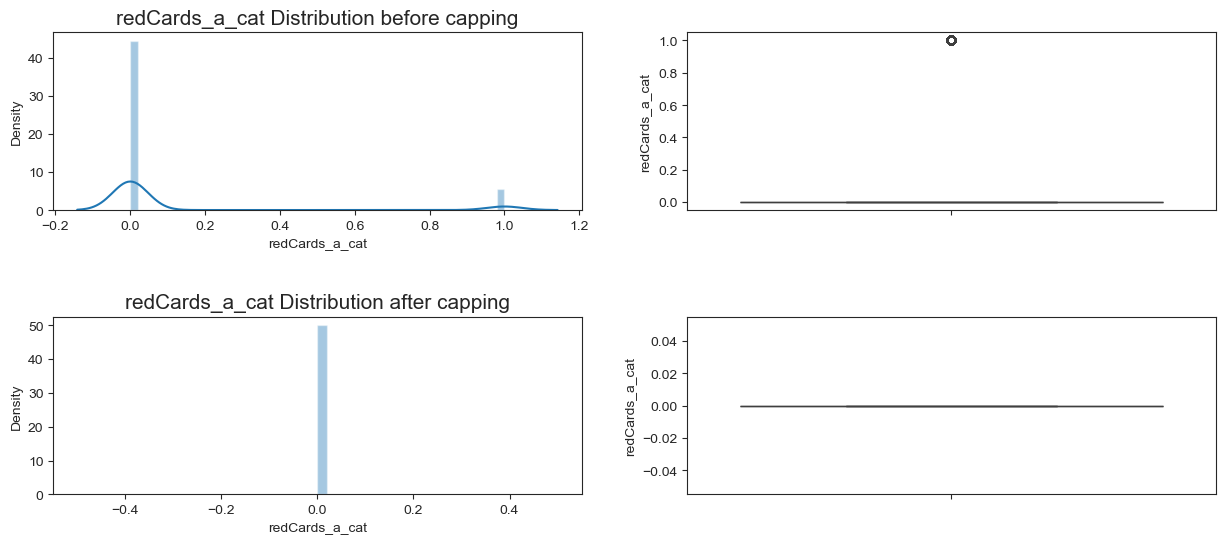

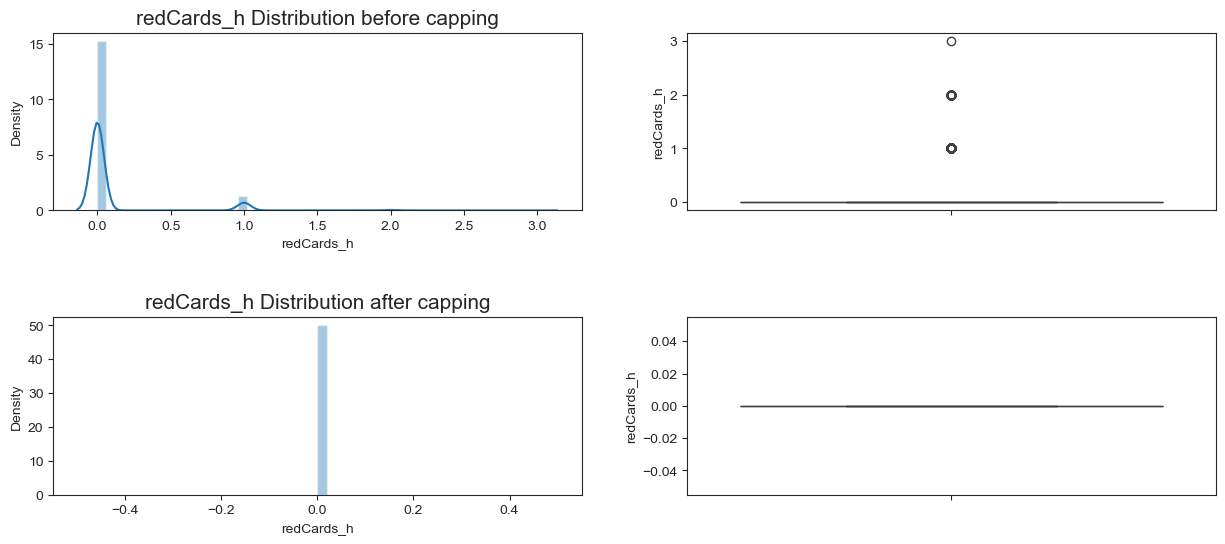

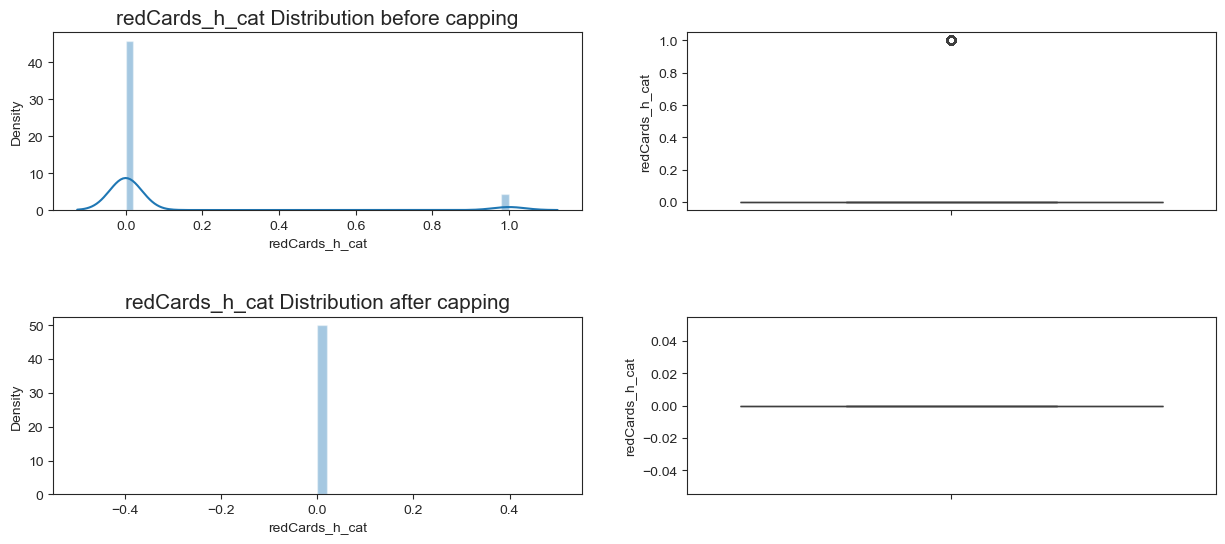

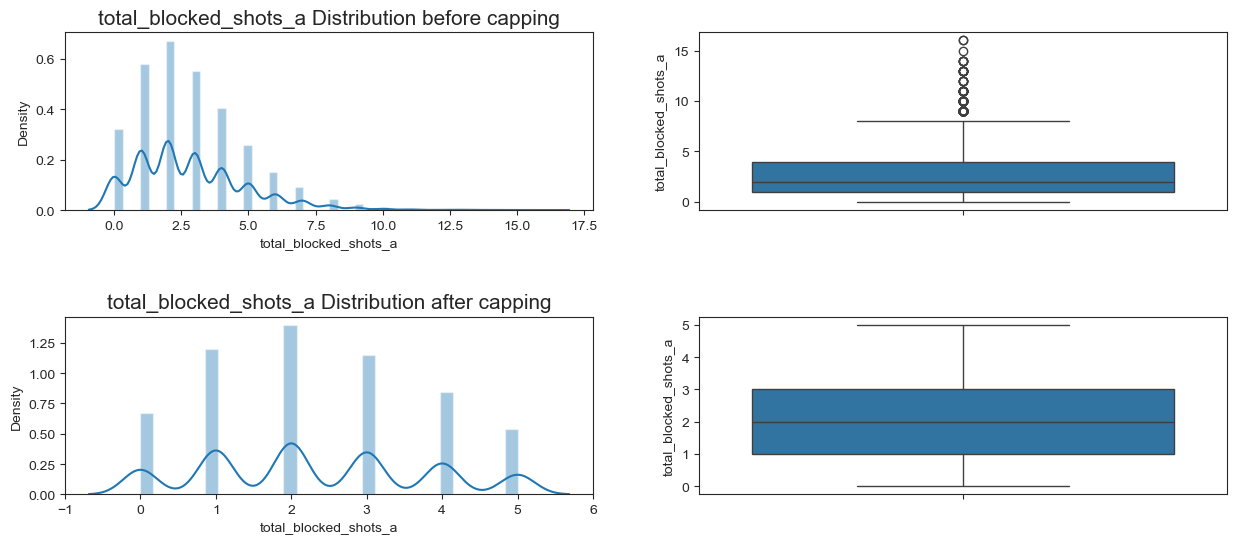

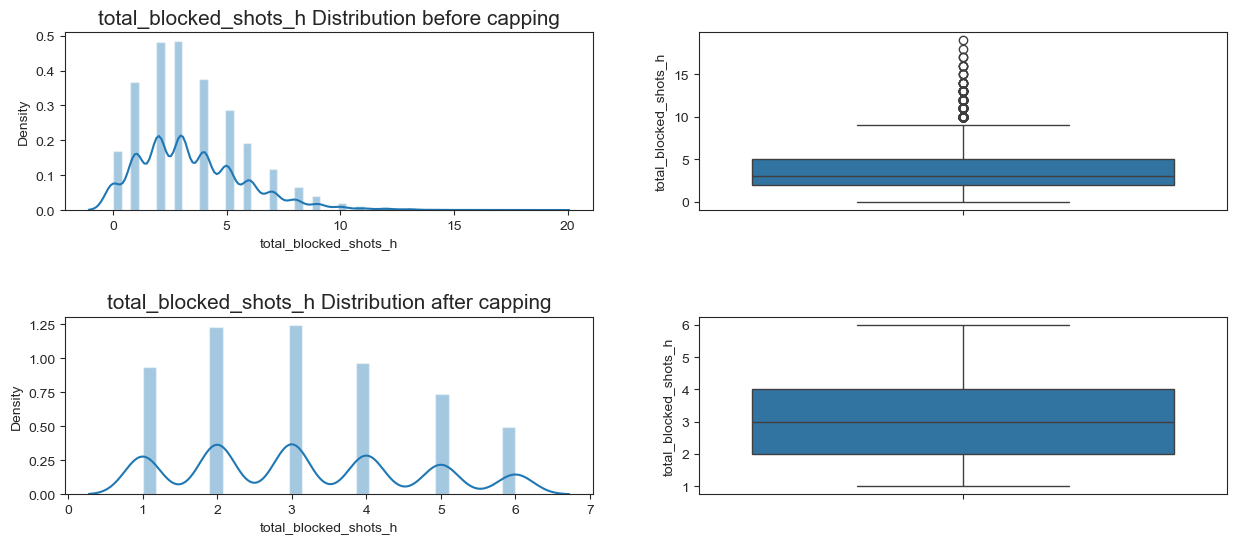

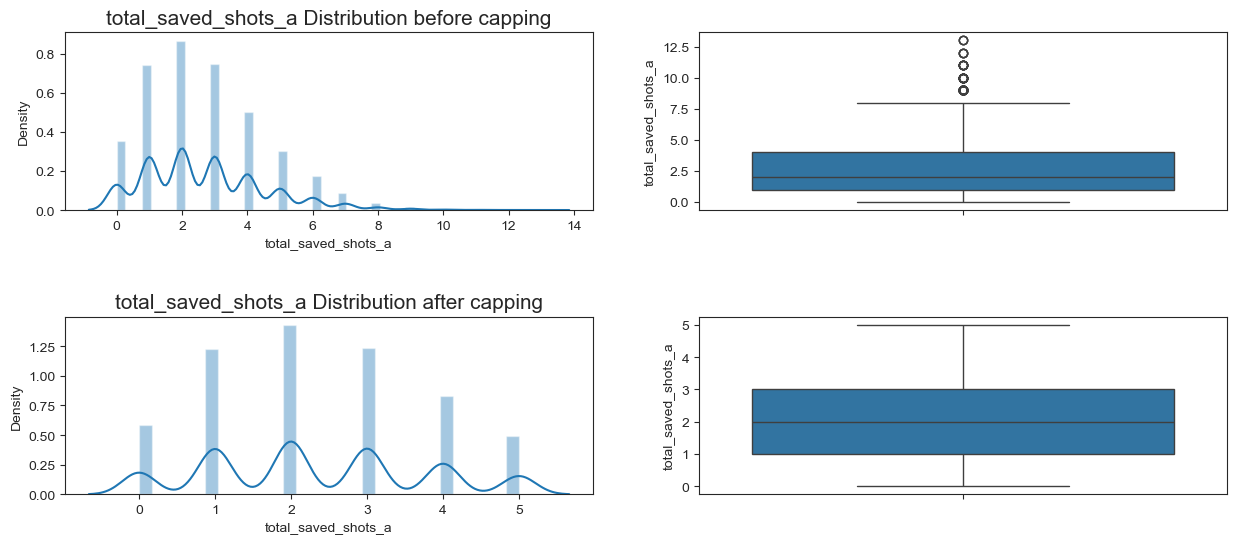

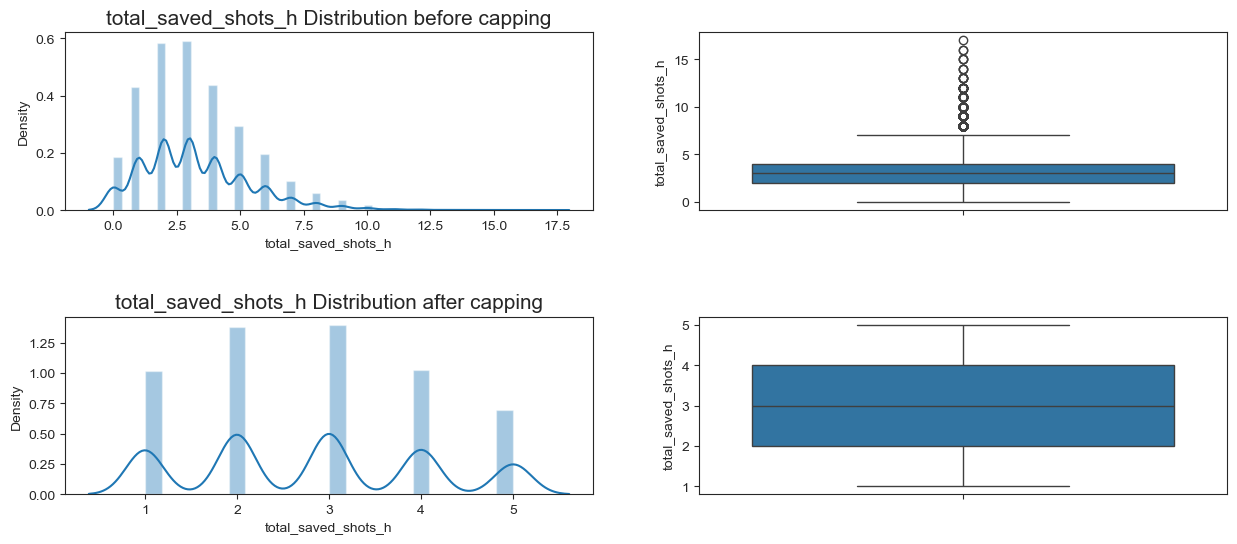

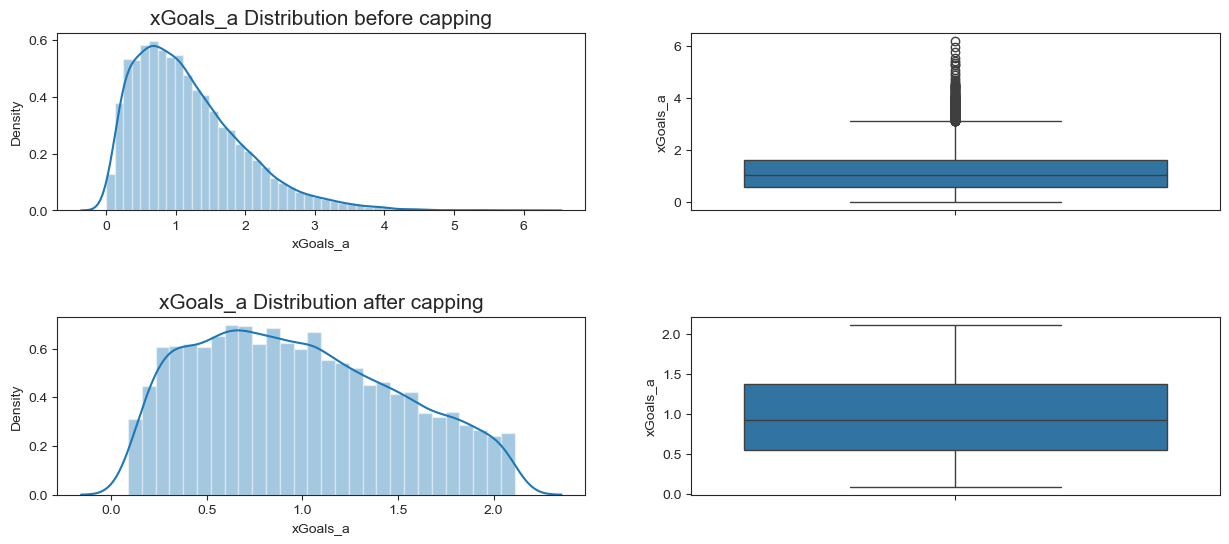

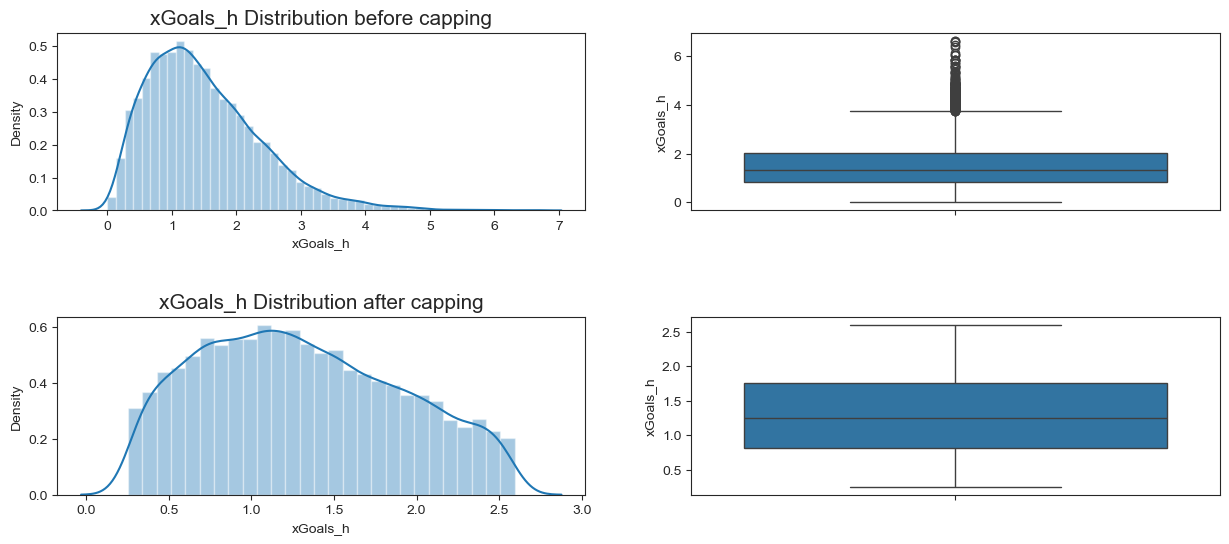

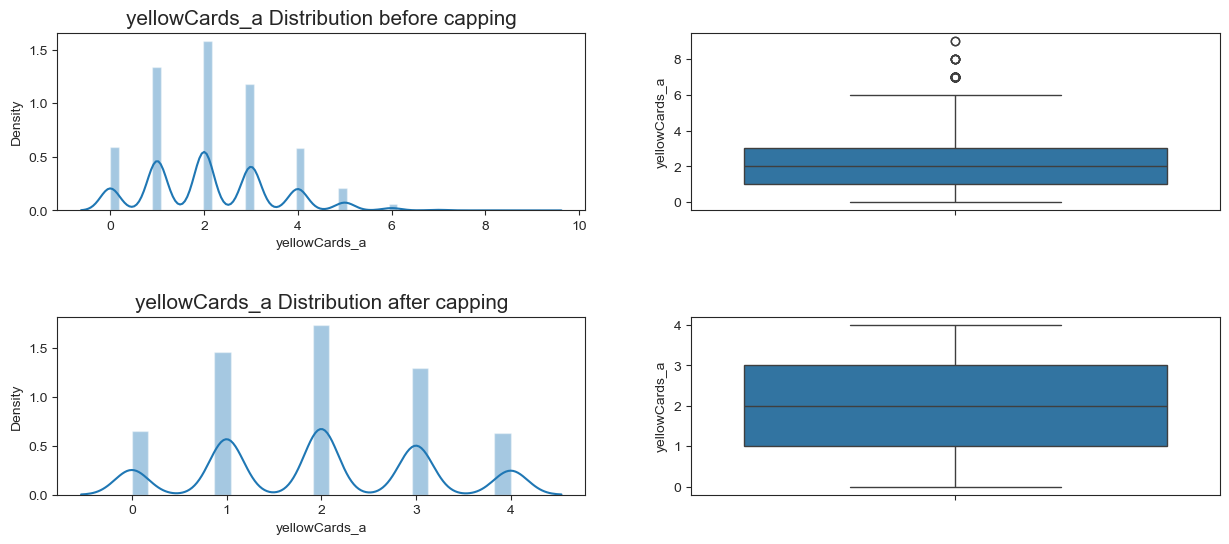

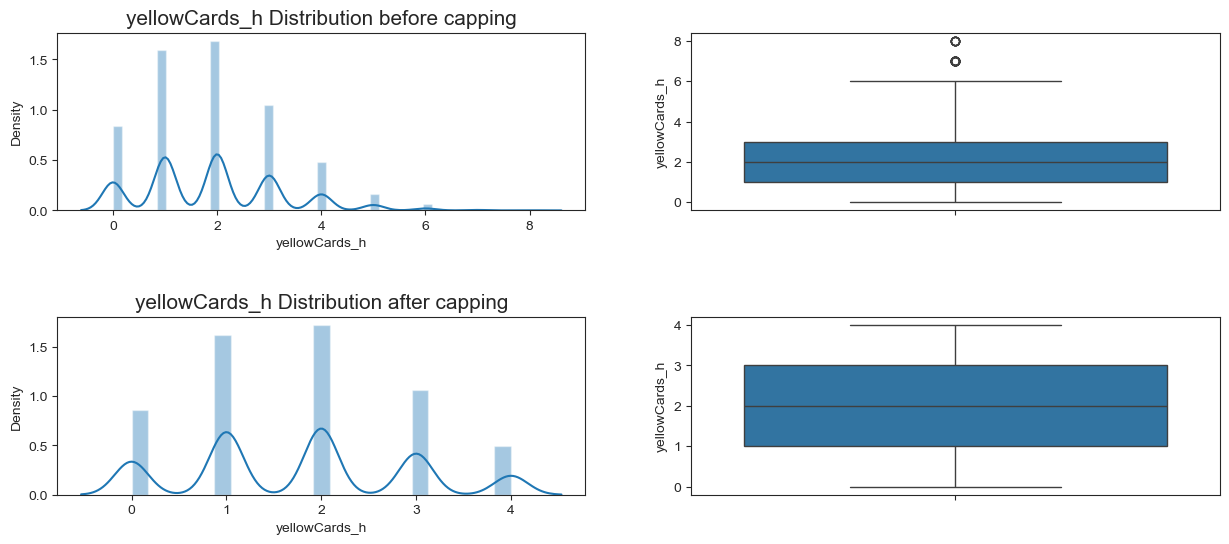

In [84]:
def dist_compare_after_capping(original_df, new, cols):
    for col in relevant_columns_features:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_compare_after_capping(df, temp, outliers_df.index)

#### After cchecking the result we will drop 8 fetuers 

In [85]:
#relevant_columns=out_df.loc[out_df['drop']=='yes']['feature']
remove_outliers=relevant_columns_features
manipulated_data= df.copy()
for j in range(len(df)):
    for col in remove_outliers:
        if df_outliers.loc[j,col] == 1:
            manipulated_data.loc[j,col] = 0

In [86]:
manipulated_data.to_csv(path_result+'/'+'manipulated_data_no_outleirs.csv')

# Nulls matrix

In [87]:
manipulated_data.head()

gameID  leagueID  season            date  homeTeamID  awayTeamID  \
0      81         1    2015  8/8/2015 15:45          89          82   
1      82         1    2015  8/8/2015 18:00          73          71   
2      83         1    2015  8/8/2015 18:00          72          90   
3      84         1    2015  8/8/2015 18:00          75          77   
4      85         1    2015  8/8/2015 18:00          79          78   

   homeGoals  awayGoals  homeGoalsHalfTime  awayGoalsHalfTime  xGoals_h  \
0          1          0                  1                  0  0.627539   
1          0          1                  0                  0  0.876106   
2          2          2                  0                  1  0.604226   
3          4          2                  3                  0  2.568030   
4          1          3                  0                  1  1.130760   

   shots_h  shotsOnTarget_h  deep_h   ppda_h  fouls_h  corners_h  \
0        9                1     4.0  13.8261       12          1   
1       11                2    11.0   6.9000       13          6   
2       10                5     5.0   6.6500        0          8   
3       19                8     5.0  10.8800       13          6   
4       17                6     NaN   5.7368       14          1   

   yellowCards_h  redCards_h  teamgoals_h  ownGoals_h  total_assists_h  \
0            2.0           0            0           0                0   
1            3.0           0            0           0                0   
2            1.0           0            2           0                2   
3            2.0           0            4           0                2   
4            1.0           0            1           0                1   

   total_xAssists_h  total_key_passes_h  total_xGoalsChain_h  \
0          0.284979                   5             1.396328   
1          0.419975                   9             2.159510   
2          0.549139                   8             1.025550   
3          1.727543                  18             6.815649   
4          0.416638                  12             1.966623   

   total_xGoalsBuildup_h  total_blocked_shots_h  total_saved_shots_h  \
0               0.994160                    4.0                  1.0   
1               1.170894                    2.0                  2.0   
2               0.493522                    2.0                  3.0   
3               3.741916                    4.0                  4.0   
4               0.699249                    3.0                  4.0   

   xGoals_a  shots_a  shotsOnTarget_a  deep_a   ppda_a  fouls_a  corners_a  \
0  0.674600        9                4     0.0   8.2188       12          2   
1  0.782253        7                3     2.0  11.8462       13          3   
2       NaN       11                5     4.0  17.1579       13          2   
3  1.459460       11                5     6.0   9.5556       17          3   
4  2.109750       11                7     0.0  10.6250        0          4   

   yellowCards_a  redCards_a  teamgoals_a  ownGoals_a  total_assists_a  \
0              3           0            0           0                0   
1              4           0            1           0                1   
2              2           0            2           0                1   
3              4           0            2           0                2   
4              0           0            3           0                3   

   total_xAssists_a  total_key_passes_a  total_xGoalsChain_a  \
0          0.586365                   7             1.745371   
1          0.560695                   4             1.238205   
2          0.418385                   8             1.959323   
3          1.288886                   9             7.622863   
4          2.050685                  10            10.799517   

   total_xGoalsBuildup_a  total_blocked_shots_a  total_saved_shots_a result_h  \
0               0.811549                    3.0                  4.0     

In [88]:
#Getting a new/updated missing dataset from 'manipulated data' - this time we will call it df_nulls
df_nulls = manipulated_data.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]

df_nulls

xGoals_h  deep_h  yellowCards_h  total_blocked_shots_h  \
0      0.627539     4.0            2.0                    4.0   
1      0.876106    11.0            3.0                    2.0   
2      0.604226     5.0            1.0                    2.0   
3      2.568030     5.0            2.0                    4.0   
4      1.130760     NaN            1.0                    3.0   
...         ...     ...            ...                    ...   
12675  1.411190     0.0            2.0                    6.0   
12676  1.198190     3.0            1.0                    3.0   
12677  1.332690    10.0            1.0                    2.0   
12678  1.460500     NaN            1.0                    5.0   
12679  0.323960     1.0            1.0                    0.0   

       total_saved_shots_h  xGoals_a  deep_a  total_blocked_shots_a  \
0                      1.0  0.674600     0.0                    3.0   
1                      2.0  0.782253     2.0                    2.0   
2                      3.0       NaN     4.0                    3.0   
3                      4.0  1.459460     6.0                    2.0   
4                      4.0  2.109750     0.0                    2.0   
...                    ...       ...     ...                    ...   
12675                  4.0  1.707510     3.0                    1.0   
12676                  2.0  1.238050     4.0                    4.0   
12677                  4.0  0.357583     0.0                    0.0   
12678                  5.0  1.380290     3.0                    1.0   
12679                  1.0  0.521913     0.0                    2.0   

       total_saved_shots_a  yellowCards_h_cat  
0                      4.0                2.0  
1                      2.0                3.0  
2                      3.0                1.0  
3                      3.0                2.0  
4                      4.0                1.0  
...                    ...                ...  
12675                  3.0                2.0  
12676                  3.0                1.0  
12677                  2.0                1.0  
12678                  1.0                1.0  
12679                  0.0                1.0  

[12680 rows x 10 columns]

Note: you may need to restart the kernel to use updated packages.


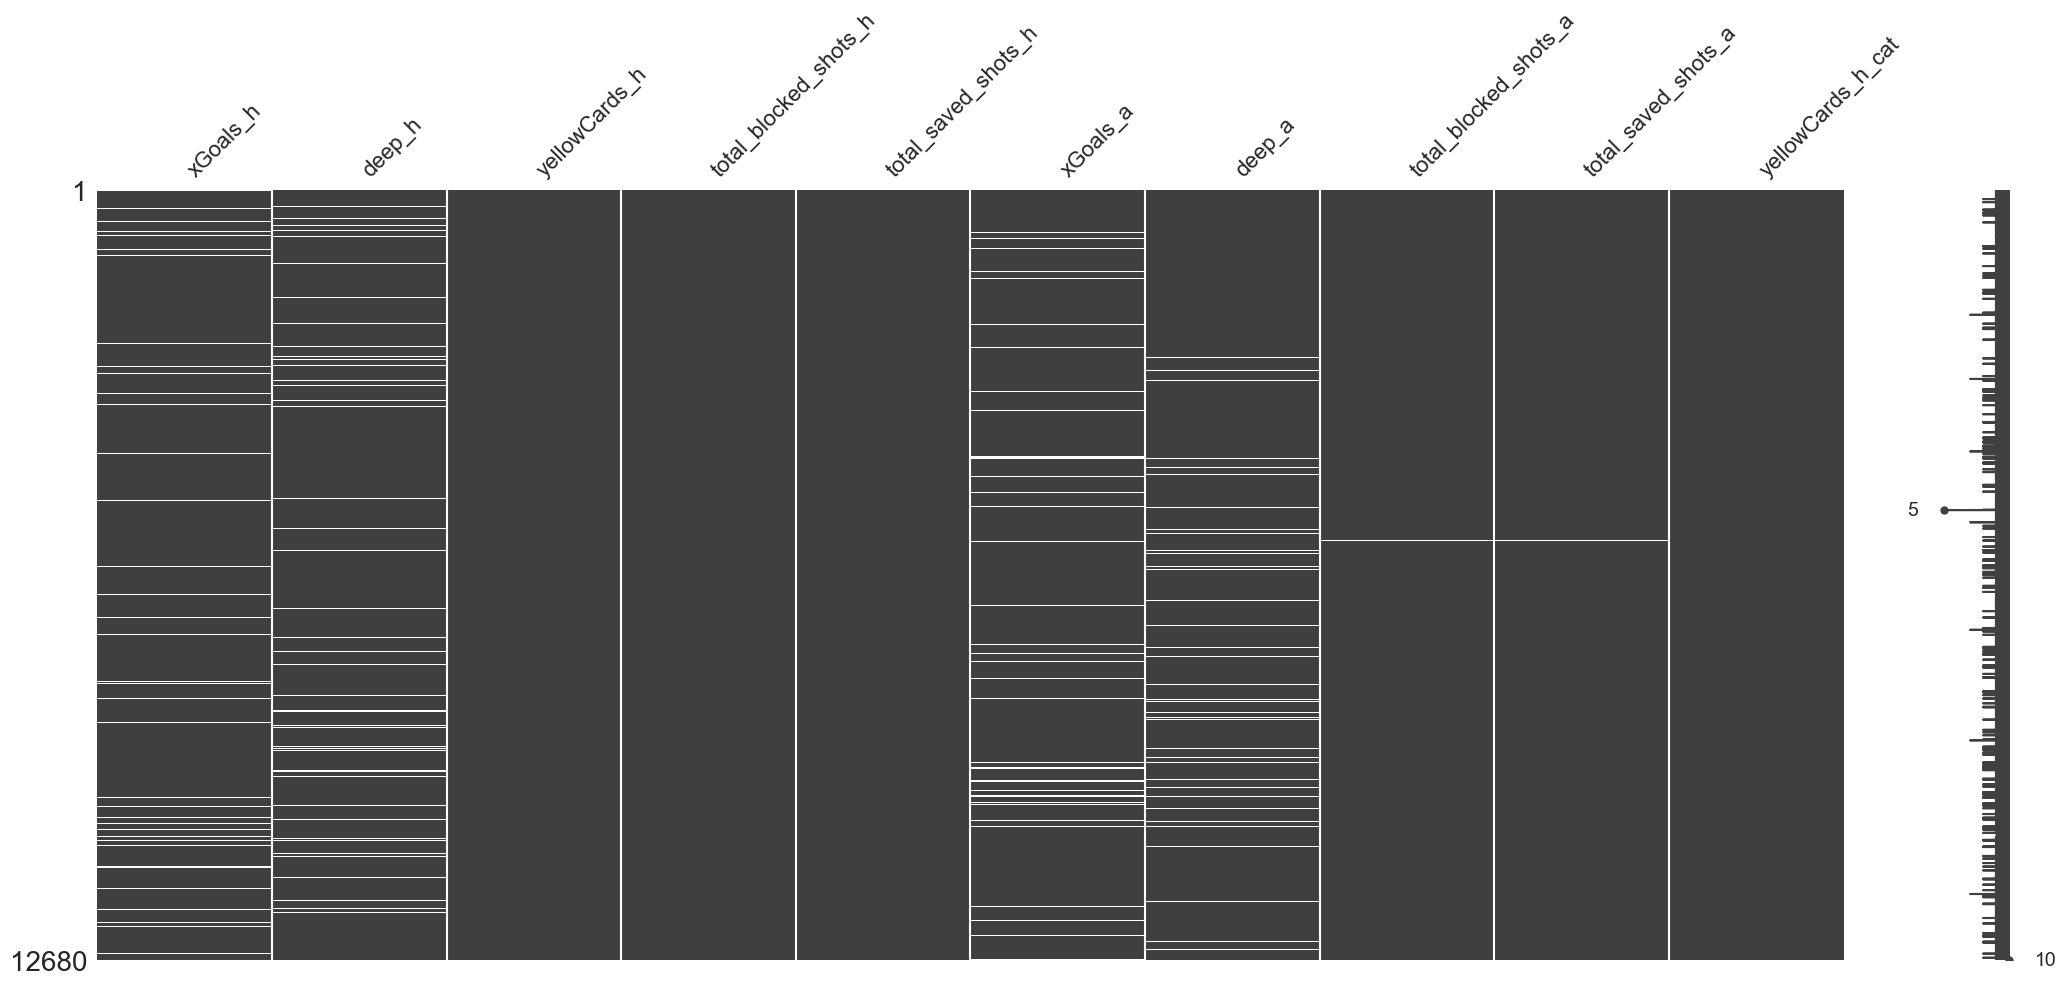

In [89]:
%pip install missingno
import missingno as msno
msno.matrix(df_nulls)
plt.show()

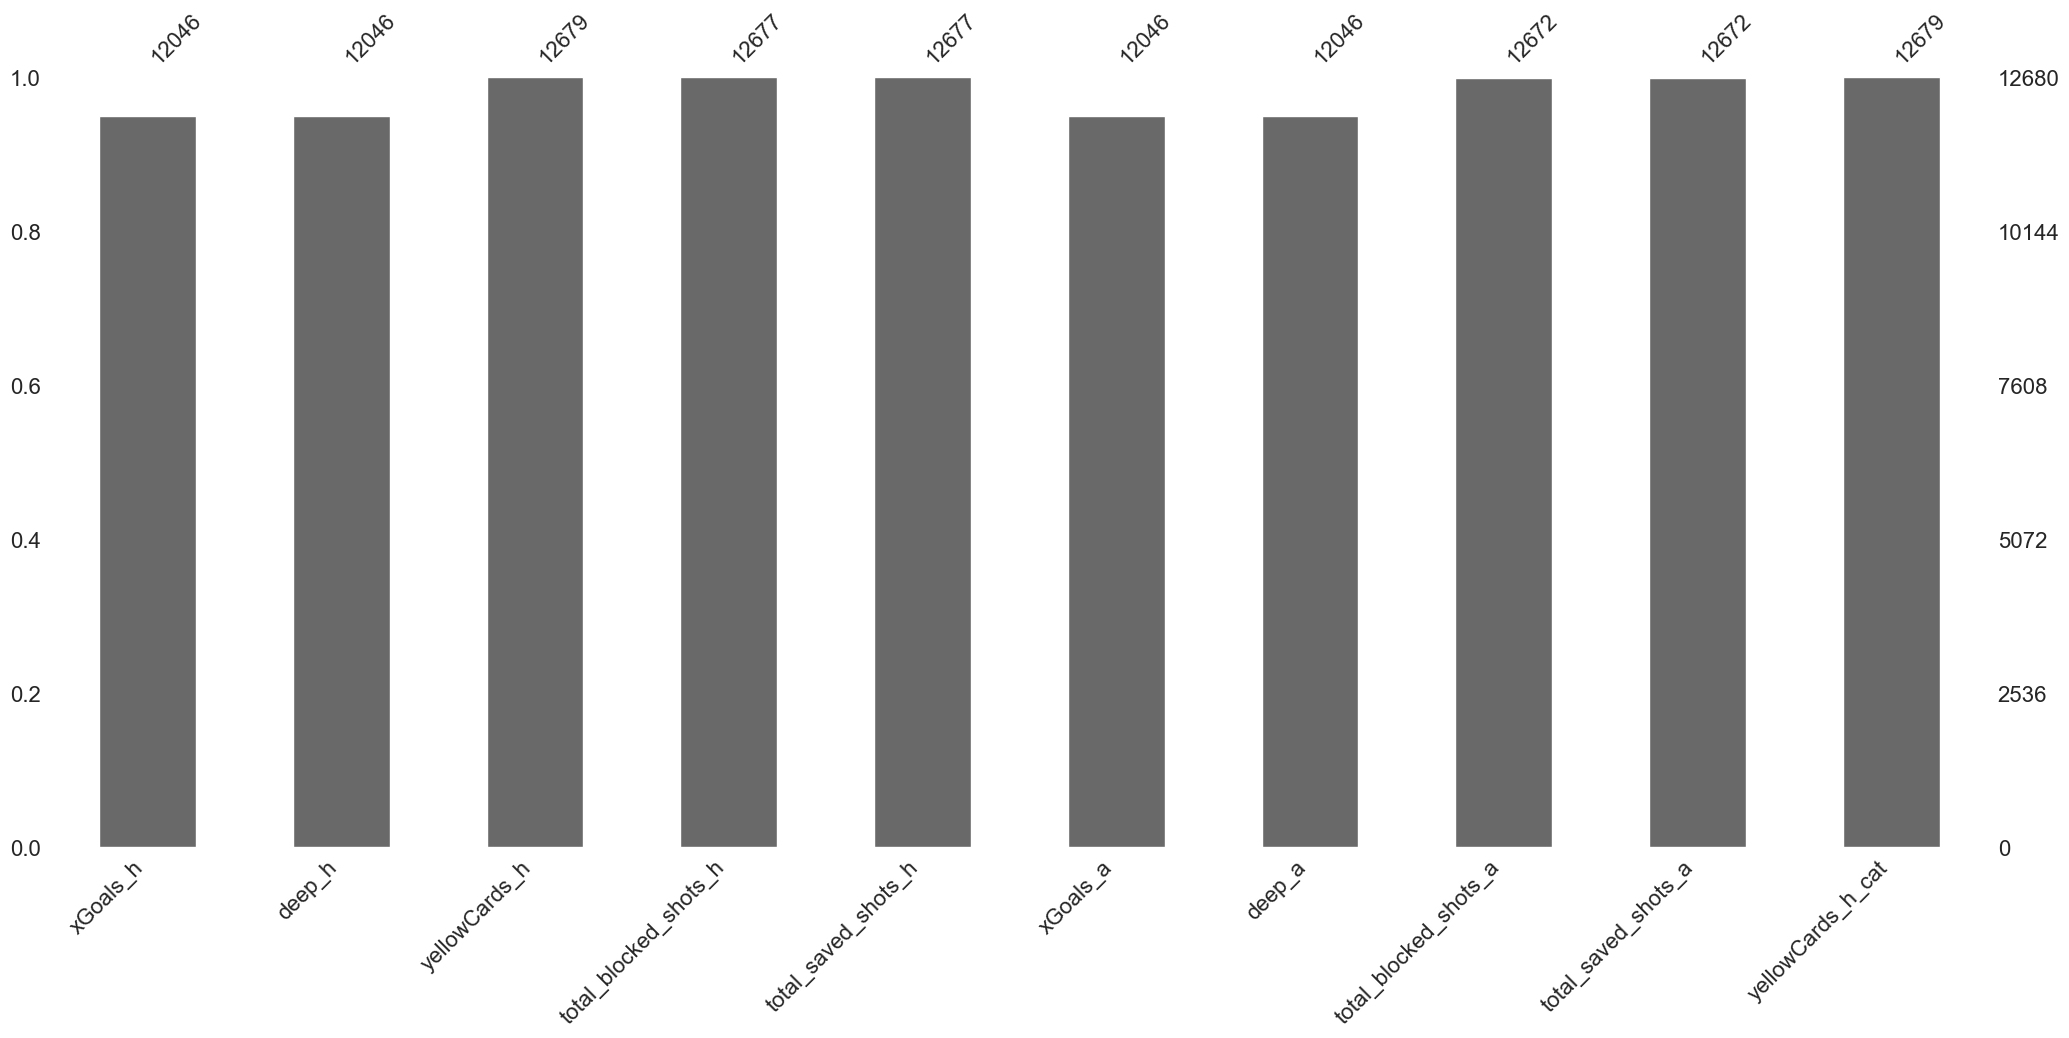

In [90]:
msno.bar(df_nulls)
plt.show()

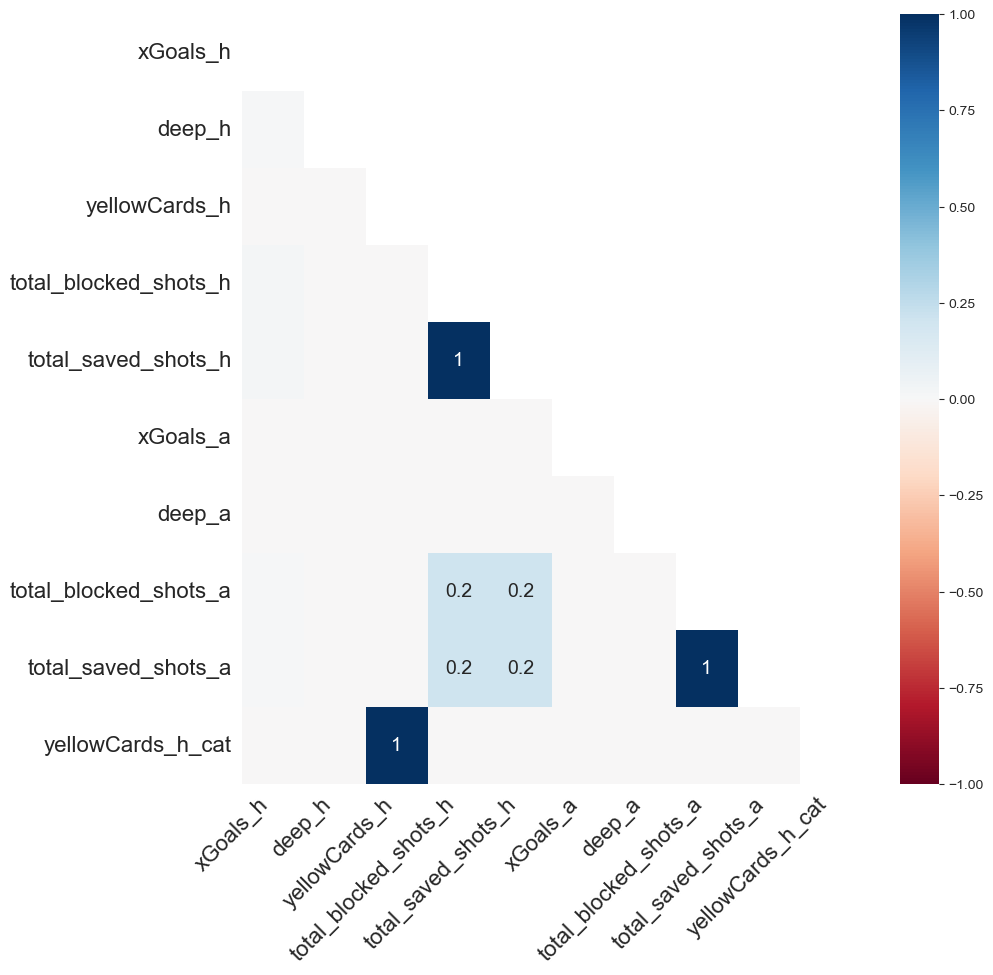

In [91]:
## missingness correlation heatmap
msno.heatmap(df_nulls,figsize=(10,10))
plt.show()

#### Dataframe containing missing value counts and their frequency:

In [92]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

Missing Values  % of Total Values
xGoals_h                          634                5.0
deep_h                            634                5.0
xGoals_a                          634                5.0
deep_a                            634                5.0
total_blocked_shots_a               8                0.1
total_saved_shots_a                 8                0.1
total_blocked_shots_h               3                0.0
total_saved_shots_h                 3                0.0
yellowCards_h                       1                0.0
yellowCards_h_cat                   1                0.0

In [93]:
mis_val_table_ren_columns.sum()

Missing Values       2560.0
% of Total Values      20.2
dtype: float64

##### Creating a dataframe with missing values as 1 and existing values as 0:

In [94]:
df_missing_data = manipulated_data.isin([np.nan]) 
df_missing_data = df_missing_data.astype('int')
df_missing_data

gameID  leagueID  season  date  homeTeamID  awayTeamID  homeGoals  \
0           0         0       0     0           0           0          0   
1           0         0       0     0           0           0          0   
2           0         0       0     0           0           0          0   
3           0         0       0     0           0           0          0   
4           0         0       0     0           0           0          0   
...       ...       ...     ...   ...         ...         ...        ...   
12675       0         0       0     0           0           0          0   
12676       0         0       0     0           0           0          0   
12677       0         0       0     0           0           0          0   
12678       0         0       0     0           0           0          0   
12679       0         0       0     0           0           0          0   

       awayGoals  homeGoalsHalfTime  awayGoalsHalfTime  xGoals_h  shots_h  \
0              0                  0                  0         0        0   
1              0                  0                  0         0        0   
2              0                  0                  0         0        0   
3              0                  0                  0         0        0   
4              0                  0                  0         0        0   
...          ...                ...                ...       ...      ...   
12675          0                  0                  0         0        0   
12676          0                  0                  0         0        0   
12677          0                  0                  0         0        0   
12678          0                  0                  0         0        0   
12679          0                  0                  0         0        0   

       shotsOnTarget_h  deep_h  ppda_h  fouls_h  corners_h  yellowCards_h  \
0                    0       0       0        0          0              0   
1                    0       0       0        0          0              0   
2                    0       0       0        0          0              0   
3                    0       0       0        0          0              0   
4                    0       1       0        0          0              0   
...                ...     ...     ...      ...        ...            ...   
12675                0       0       0        0          0              0   
12676                0       0       0        0          0              0   
12677                0       0       0        0          0              0   
12678                0       1       0        0          0              0   
12679                0       0       0        0          0              0   

       redCards_h  teamgoals_h  ownGoals_h  total_assists_h  total_xAssists_h  \
0               0            0           0                0                 0   
1               0            0           0                0                 0   
2               0            0           0                0                 0   
3               0            0           0                0                 0   
4               0            0           0                0                 0   
...           ...          ...         ...              ...               ...   
12675           0            0           0                0                 0   
12676           0            0           0                0                 0   
12677           0            0           0                0                 0   
12678           0            0           0                0                 0   
12679           0            0           0                0                 0   

       total_key_passes_h  total_xGoalsChain_h  total_xGoalsBuildup_h  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0      

#####Creating df including numeric features of the later data - manipulated_data

##### Difference in the distribution of a variable when another variable is with or without MV:

In [95]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12680 entries, 0 to 12679
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   xGoals_h               12046 non-null  float64
 1   deep_h                 12046 non-null  float64
 2   yellowCards_h          12679 non-null  float64
 3   total_blocked_shots_h  12677 non-null  float64
 4   total_saved_shots_h    12677 non-null  float64
 5   xGoals_a               12046 non-null  float64
 6   deep_a                 12046 non-null  float64
 7   total_blocked_shots_a  12672 non-null  float64
 8   total_saved_shots_a    12672 non-null  float64
 9   yellowCards_h_cat      12679 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [96]:
df_num = pd.Index(df_num.tolist() + ['result']).unique()

##### Exploring data the segnificunce of distribution change:

In [97]:
#le = preprocessing.LabelEncoder()
MV_df_final = pd.DataFrame(columns= ['Var', 'MV_pct', 'distribution_changed'])
#df[m] = le.fit_transform(df[m].astype(str))
m=df[df_num].copy()
#m = manipulated_data._get_numeric_data().columns.dropna().unique()
np.seterr(divide='ignore', invalid='ignore')
for i in m: 
    # and i in mis_val_table_ren_columns.index.tolist():
    # column with NULLS
        null = m[i]
    # column without NULLS
        non = m[i].loc[df_missing_data[i]==0]
    # target value with NULLS
        result_null = m['result']
    # target value without NULLS
        result_non = result_null.loc[df_missing_data[i]==0]
        mv = df_missing_data[i].sum()
    # perform Kolmogorov-Smirnov test
        pval = ks_2samp(null, non)[1]
        dis_change = np.where(pval<0.5,'+','-')
        MV_df_final = pd.concat([MV_df_final, pd.DataFrame([{
            'Var': i,
            'MV_pct': mv,
            'distribution_changed': dis_change
        }])], ignore_index=True)
MV_df_final

Var MV_pct distribution_changed
0               awayGoals      0                    -
1         awayGoalsHT_cat      0                    -
2       awayGoalsHalfTime      0                    -
3           awayGoals_cat      0                    -
4               corners_a      0                    -
5               corners_h      0                    -
6                  deep_a    634                    -
7                  deep_h    634                    -
8                 fouls_a      0                    -
9                 fouls_h      0                    -
10               game_day      0                    -
11             game_month      0                    -
12              game_year      0                    -
13              homeGoals      0                    -
14        homeGoalsHT_cat      0                    -
15      homeGoalsHalfTime      0                    -
16          homeGoals_cat      0                    -
17               leagueID      0                    -
18             ownGoals_a      0                    -
19         ownGoals_a_cat      0                    -
20             ownGoals_h      0                    -
21         ownGoals_h_cat      0                    -
22                 ppda_a      0                    -
23                 ppda_h      0                    -
24             redCards_a      0                    -
25         redCards_a_cat      0                    -
26             redCards_h      0                    -
27         redCards_h_cat      0                    -
28                 result      0                    -
29                 season      0                    -
30        shotsOnTarget_a      0                    -
31        shotsOnTarget_h      0                    -
32                shots_a      0                    -
33                shots_h      0                    -
34            teamgoals_a      0                    -
35            teamgoals_h      0                    -
36        total_assists_a      0                    -
37    total_assists_a_cat      0                    -
38        total_assists_h      0                    -
39    total_assists_h_cat      0                    -
40  total_blocked_shots_a      8                    -
41  total_blocked_shots_h      3                    -
42     total_key_passes_a      0                    -
43     total_key_passes_h      0                    -
44    total_saved_shots_a      8                    -
45    total_saved_shots_h      3                    -
46       total_xAssists_a      0                    -
47       total_xAssists_h      0                    -
48  total_xGoalsBuildup_a      0                    -
49  total_xGoalsBuildup_h      0                    -
50    total_xGoalsChain_a      0                    -
51    total_xGoalsChain_h      0                    -
52               xGoals_a    634                    -
53               xGoals_h    634                    -
54          yellowCards_a      0                    -
55      yellowCards_a_cat      0                    -
56          yellowCards_h      1                    -
57      yellowCards_h_cat      1                    -

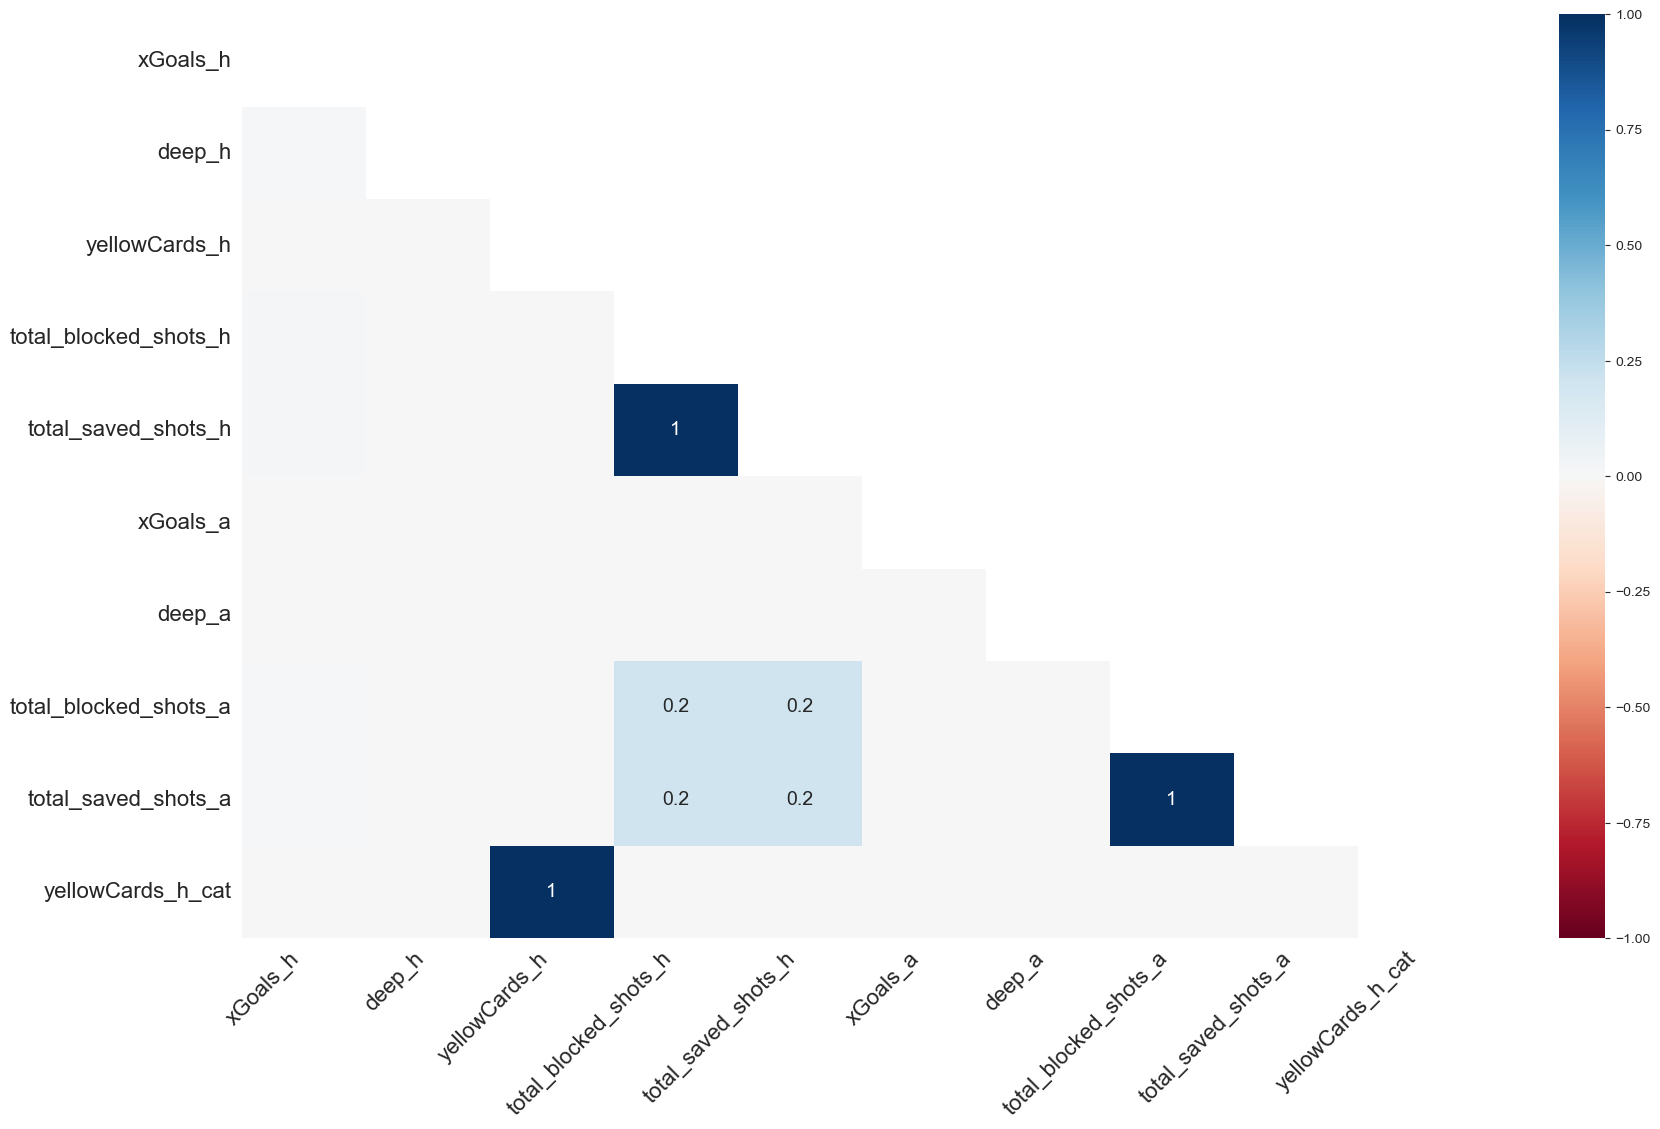

In [98]:
msno.heatmap(manipulated_data)
plt.show()

In [99]:
MV_df_final['drop']= 'Yes'
MV_df_final['MV_type']= 'MCAR/MAR'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'drop']='No'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'MV_type']='MNAR'
MV_df_final = MV_df_final[MV_df_final['MV_pct']>0].sort_values(by='MV_pct', ascending=False)
MV_df_final

Var MV_pct distribution_changed drop   MV_type
6                  deep_a    634                    -  Yes  MCAR/MAR
7                  deep_h    634                    -  Yes  MCAR/MAR
52               xGoals_a    634                    -  Yes  MCAR/MAR
53               xGoals_h    634                    -  Yes  MCAR/MAR
40  total_blocked_shots_a      8                    -  Yes  MCAR/MAR
44    total_saved_shots_a      8                    -  Yes  MCAR/MAR
41  total_blocked_shots_h      3                    -  Yes  MCAR/MAR
45    total_saved_shots_h      3                    -  Yes  MCAR/MAR
56          yellowCards_h      1                    -  Yes  MCAR/MAR
57      yellowCards_h_cat      1                    -  Yes  MCAR/MAR

### KNN

In [100]:
manipulated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameID                 12680 non-null  int64  
 1   leagueID               12680 non-null  int64  
 2   season                 12680 non-null  int64  
 3   date                   12680 non-null  object 
 4   homeTeamID             12680 non-null  int64  
 5   awayTeamID             12680 non-null  int64  
 6   homeGoals              12680 non-null  int64  
 7   awayGoals              12680 non-null  int64  
 8   homeGoalsHalfTime      12680 non-null  int64  
 9   awayGoalsHalfTime      12680 non-null  int64  
 10  xGoals_h               12046 non-null  float64
 11  shots_h                12680 non-null  int64  
 12  shotsOnTarget_h        12680 non-null  int64  
 13  deep_h                 12046 non-null  float64
 14  ppda_h                 12680 non-null  float64
 15  fouls_h

In [101]:
df_football=manipulated_data.copy()
from sklearn.impute import KNNImputer

imp_cols = df_football.select_dtypes(include = ['float64', 'int64','category']).columns
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(df_football[imp_cols]),columns = imp_cols)
df_football[imp_cols] = imputed_data
df_football.isnull().sum().sum()

0

In [102]:
df_football.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gameID                 12680 non-null  float64
 1   leagueID               12680 non-null  float64
 2   season                 12680 non-null  float64
 3   date                   12680 non-null  object 
 4   homeTeamID             12680 non-null  float64
 5   awayTeamID             12680 non-null  float64
 6   homeGoals              12680 non-null  float64
 7   awayGoals              12680 non-null  float64
 8   homeGoalsHalfTime      12680 non-null  float64
 9   awayGoalsHalfTime      12680 non-null  float64
 10  xGoals_h               12680 non-null  float64
 11  shots_h                12680 non-null  float64
 12  shotsOnTarget_h        12680 non-null  float64
 13  deep_h                 12680 non-null  float64
 14  ppda_h                 12680 non-null  float64
 15  fouls_h

In [103]:
df_football.to_csv(path_result+'/'+'after_missing_value_KNN.csv')